<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import scipy
import csv
import pandas as pd
from pprint import pprint


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

# Answer

## Links to File

In [2]:
satfile = './sat_scores.csv'
drugfile ='./drug-use-by-age.csv'

### Read File

In [3]:
with open(satfile) as csvfile:
    satreader = csv.reader(csvfile)
    
    satdata =[row for row in satreader]
    csvfile.close()

### Convert to Dictionary

In [4]:
header = satdata[0]
data = satdata[1::]
satdict = {key:value for key, value in zip(header,np.array(data).transpose())}


In [5]:
pprint (satdict)

{'Math': array(['510', '513', '515', '505', '516', '499', '499', '506', '500',
       '501', '499', '510', '499', '489', '501', '488', '474', '526',
       '499', '527', '499', '515', '510', '517', '525', '515', '542',
       '439', '539', '512', '542', '553', '542', '589', '550', '545',
       '572', '589', '580', '554', '568', '561', '577', '562', '596',
       '550', '570', '603', '582', '599', '551', '514'],
      dtype='|S3'),
 'Rate': array(['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67',
       '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52',
       '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13',
       '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6',
       '5', '5', '4', '4', '4', '45'],
      dtype='|S3'),
 'State': array(['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
       'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
       'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'M

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

# Answer

###  Dataframe with the SAT dictionary

In [6]:
satdf = pd.DataFrame(satdict)

### With the pandas .read(csv()

In [7]:
satdf2 = pd.read_csv(satfile)

#### Compare the types

In [8]:
print "Dictionary to Pandas Dframe Dtypes","\n",satdf.dtypes

print "..................................."
print "read_csv to Pandas Dframe Dtypes", "\n", satdf2.dtypes


Dictionary to Pandas Dframe Dtypes 
Math      object
Rate      object
State     object
Verbal    object
dtype: object
...................................
read_csv to Pandas Dframe Dtypes 
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [9]:
satdf2.head(10)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

In [10]:
satdf2.State.describe()

count     52
unique    52
top       SD
freq       1
Name: State, dtype: object

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

# Answer

In [11]:
satdf2.columns

Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object')

###  Write the Labels manually

In [12]:
labels = ['Type', 'Info', 'Description']
description = ['The State in the US this data was taken from','The participation rate of students', 'The Average Verbal SAT Score',' The average Math SAT Score' ]

### Fix it up into a dictionary with a dictionary comprehension and a little list comprehension
##### Just a little...

In [13]:
datadictionary = {key:{label:[value] for label, value in zip(labels,[satdf2[key].dtype, satdf2[key].describe(), description[index]] ) } for index, key in enumerate(satdf2.columns) }

#### Add the shape

In [14]:
datadictionary.update({'Shape':satdf2.shape})

In [15]:
pprint (datadictionary)

{'Math': {'Description': [' The average Math SAT Score'],
          'Info': [count     52.000000
mean     531.500000
std       36.014975
min      439.000000
25%      504.000000
50%      521.000000
75%      555.750000
max      603.000000
Name: Math, dtype: float64],
          'Type': [dtype('int64')]},
 'Rate': {'Description': ['The participation rate of students'],
          'Info': [count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64],
          'Type': [dtype('int64')]},
 'Shape': (52, 4),
 'State': {'Description': ['The State in the US this data was taken from'],
           'Info': [count     52
unique    52
top       SD
freq       1
Name: State, dtype: object],
           'Type': [dtype('O')]},
 'Verbal': {'Description': ['The Average Verbal SAT Score'],
            'Info': [count     52.000000
mean     532.019231
std       33.236225
min      482.000000
25%

In [16]:
datadictionary.keys()

['Math', 'Shape', 'State', 'Rate', 'Verbal']

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

# Answer

#### Import the necessary packages

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

###  Simple plotting for Rate, by itself
    #### Some fine tuning as we observed that the default bins are too few

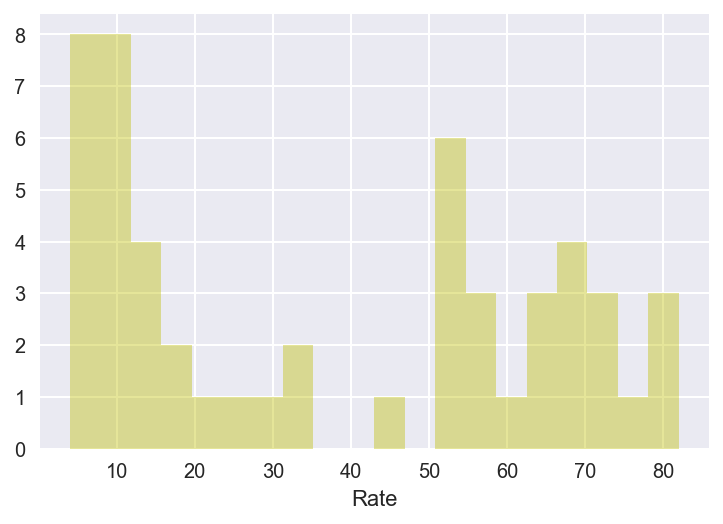

In [18]:
sns.distplot(satdf2.Rate,kde=False, bins=20, color = 'y')


## Superimpose Verbal and Math histograms
    For analysis on the differences

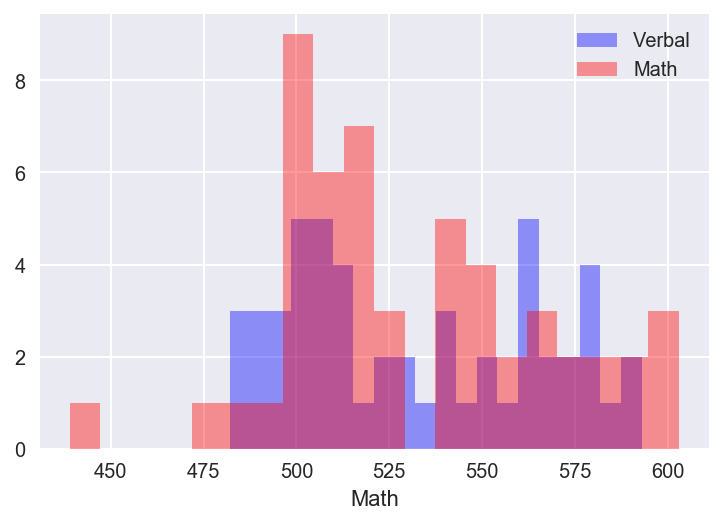

In [19]:
_ = sns.distplot(satdf2.Verbal,kde=False, bins=20, color ="b" ,label="Verbal")
_ =sns.distplot(satdf2.Math,kde=False, bins=20, color= "r", label = 'Math')
plt.legend()
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

# Answer

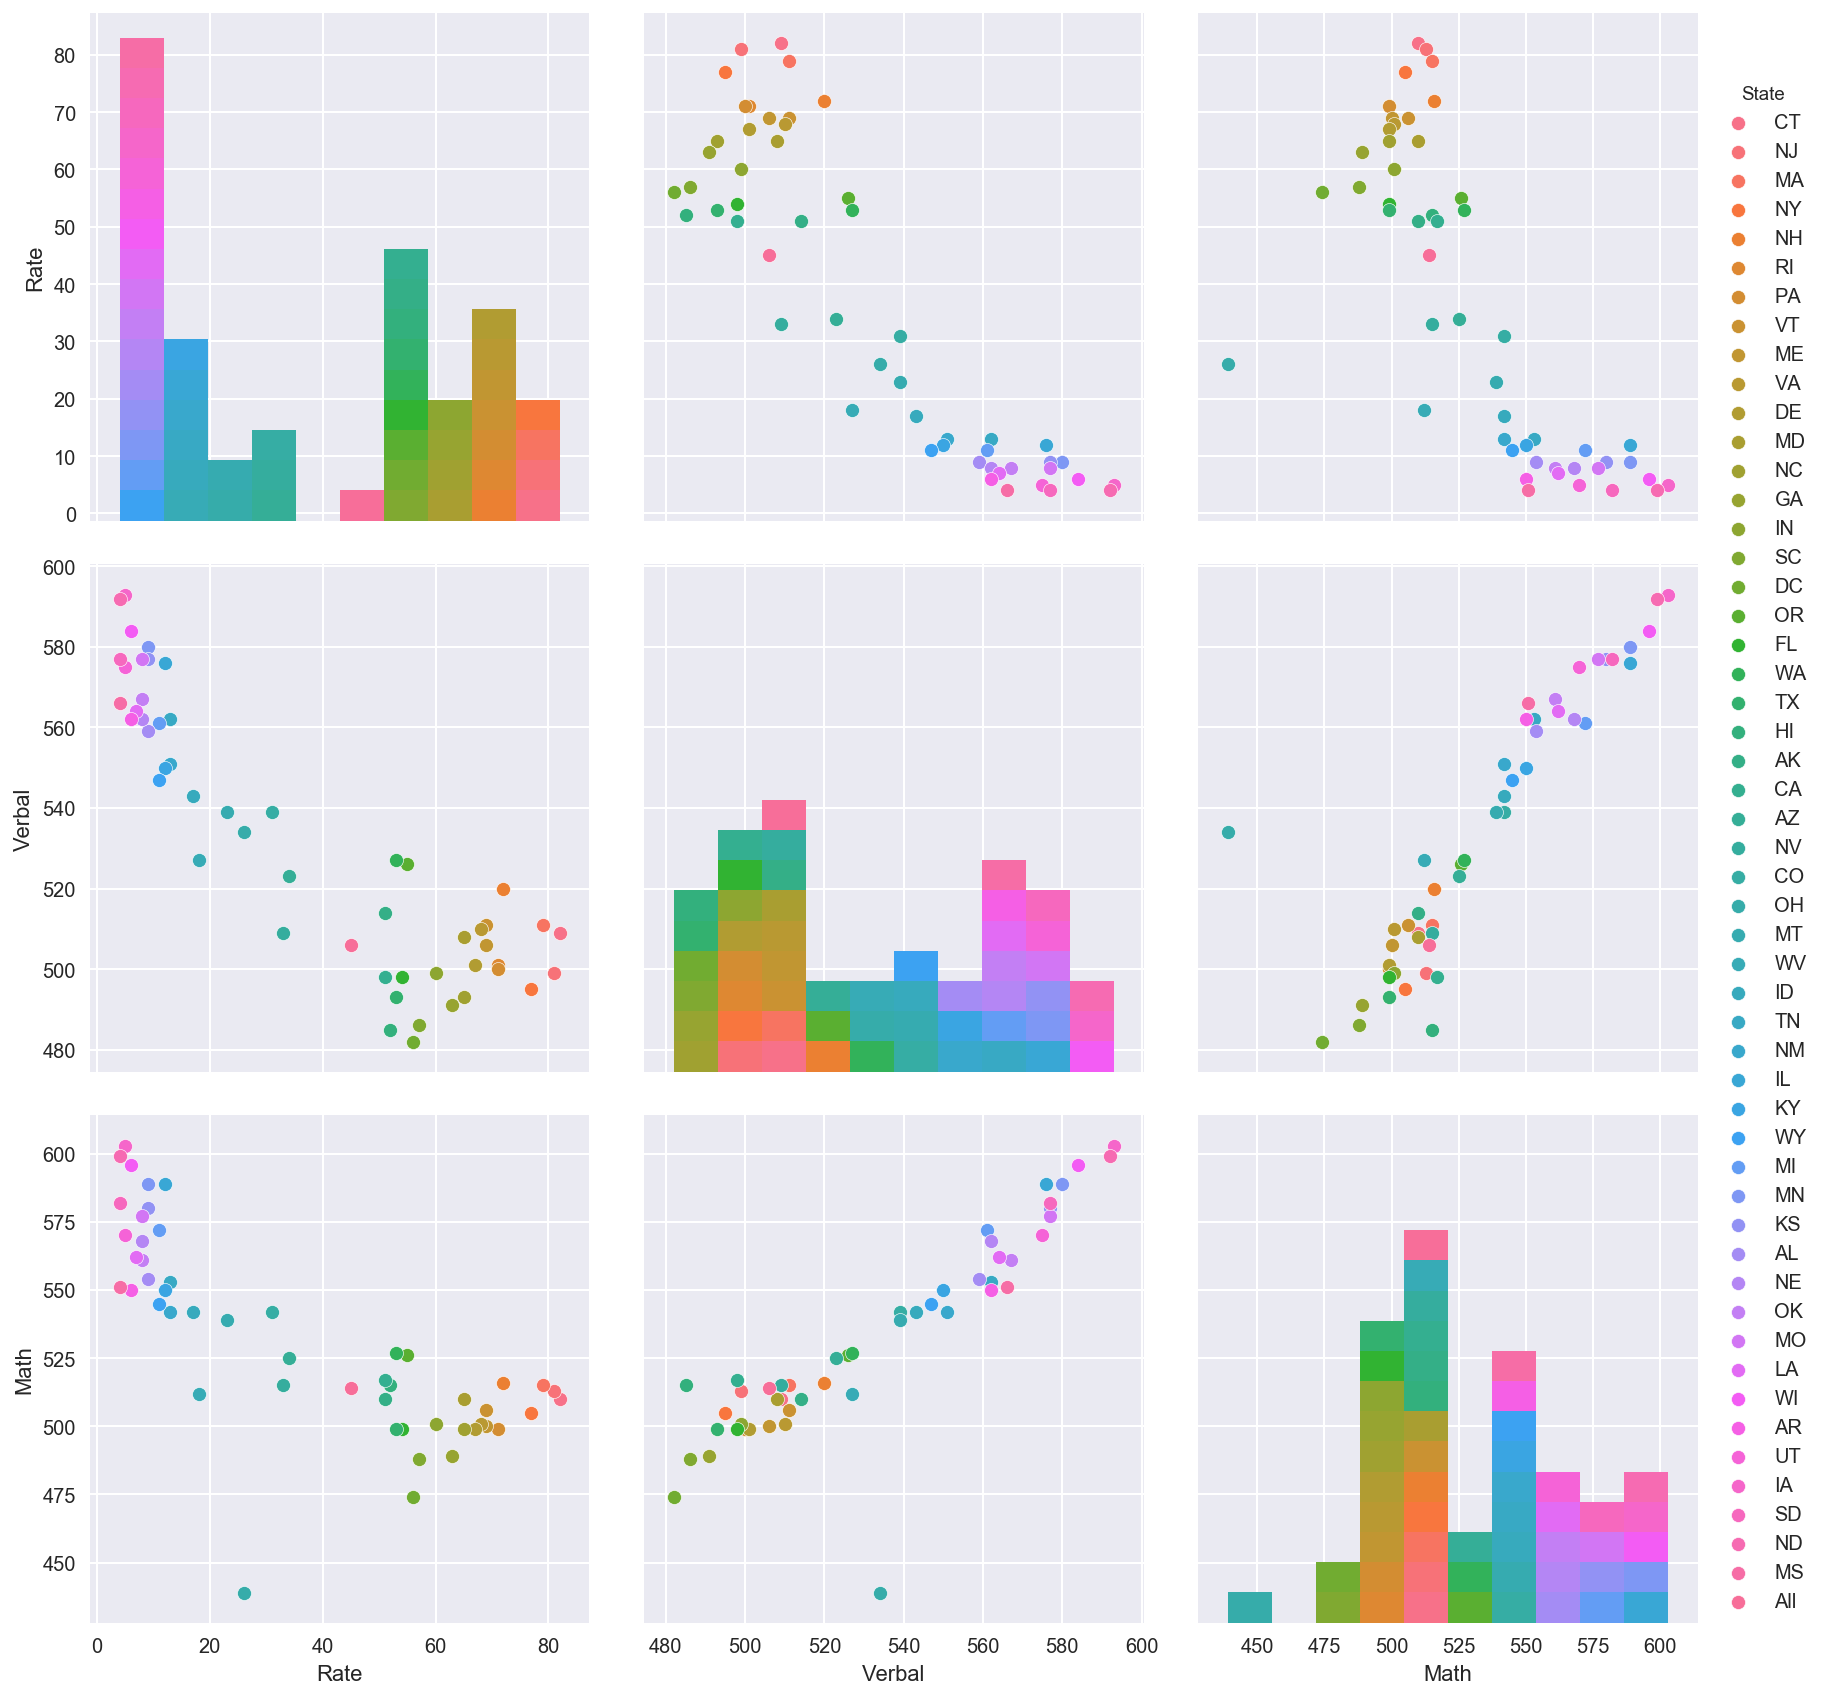

In [20]:
 sns.pairplot(satdf2, size =4, vars = ['Rate','Verbal','Math'], hue ='State' )

### Description

    Verbal and math are positively correlated.
    The "Rate" is negatively correlated to Math and verbal
    In a high rate, high math scores and high verbal scores are absent
   

### Here we see both the trend as well as the frequency shown the vertical lines

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

# Answer

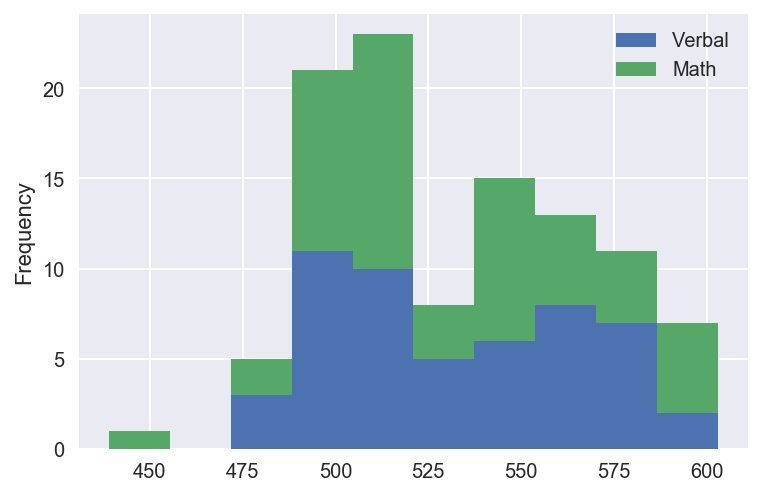

In [21]:
satdf2[['Verbal','Math']].plot.hist(stacked=True)

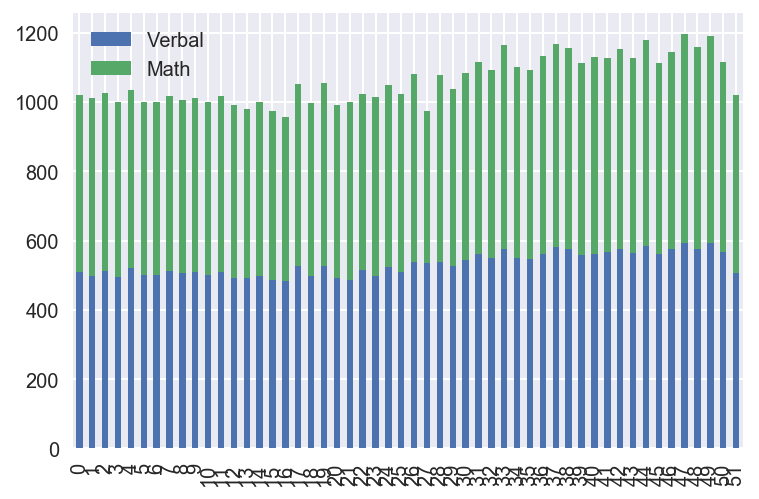

In [22]:
satdf2[['Verbal','Math']].plot.bar(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

# Answer

#### Scatterplot

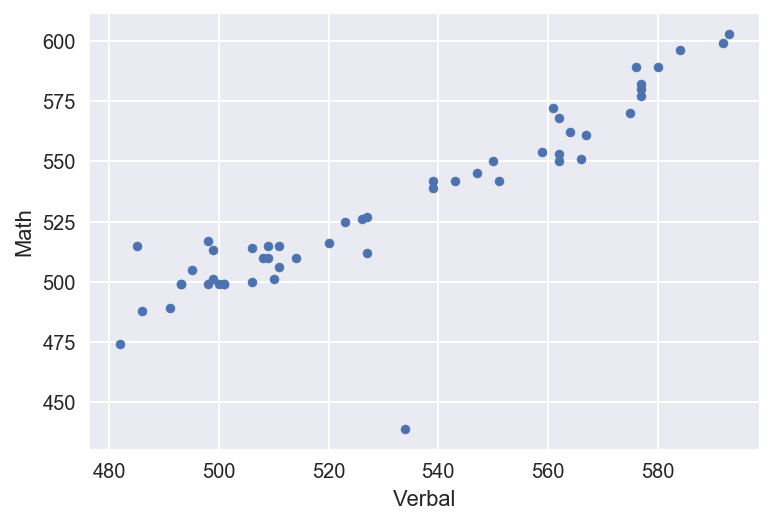

In [23]:
satdf2.plot.scatter('Verbal','Math')

#### Boxplot

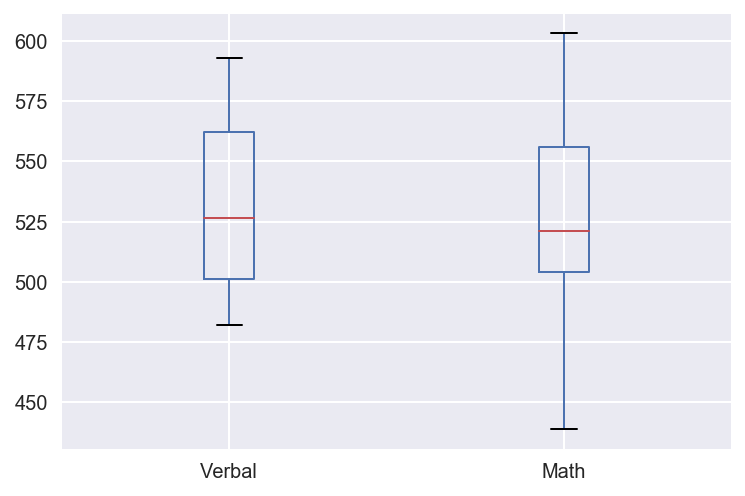

In [24]:

satdf2.boxplot(column= ['Verbal','Math'])

##### Rate is on a different scale than Math and Verbal and thus it would be irrational to plot them together

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


# Answer

### Normalize the data

In [25]:
def normalize(column):
    mean = np.mean(column)
    std = np.std(column)
    newcolumn = []
    for data in column:
        newdata = (data - mean)/std
        newcolumn.append(newdata)
    return newcolumn


In [26]:
nMath = normalize(satdf2['Math'])
nRate = normalize(satdf2['Rate'])
nVerbal = normalize(satdf2['Verbal'])

In [27]:
dfnorm = pd.DataFrame({'Math':nMath,'Rate':nRate,'Verbal':nVerbal,'State':satdf2['State']})
dfnorm.head(3)

Math      Rate State    Verbal
0 -0.602798  1.658635    CT -0.699352
1 -0.518687  1.621650    NJ -1.003164
2 -0.462613  1.547680    MA -0.638589

###  To observe the range of the Math, Rate and Verbal independently compared to the others

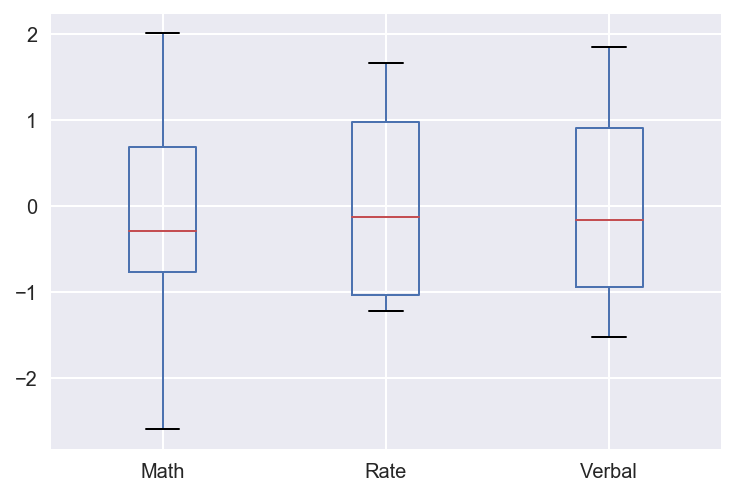

In [28]:
dfnorm.boxplot()

### Method 2

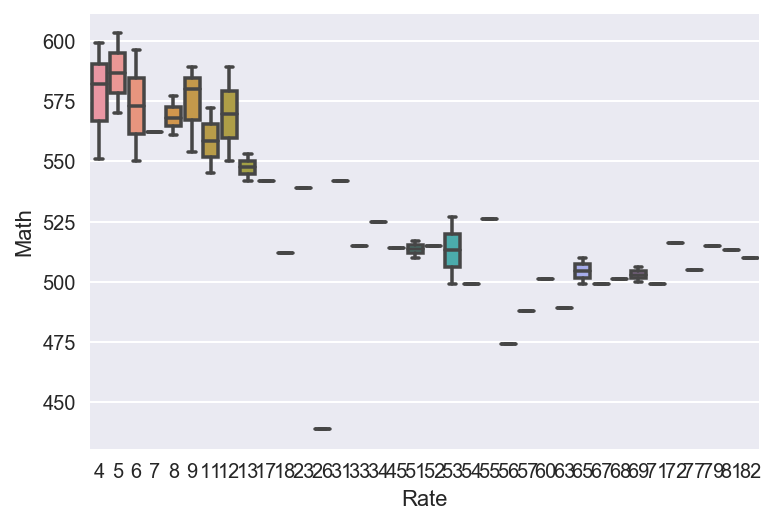

In [29]:
sns.boxplot(satdf2.Rate,satdf2.Math)

### The Above doesn't look nice, let's make rates into brackets

In [30]:
RateBracket = range(0,110,10)
satdf2['RateGrouped']=0
for number in RateBracket:
    satdf2.loc[satdf2['Rate'] >=number,'RateGrouped'] = number

### Range of SAT score against participation rates

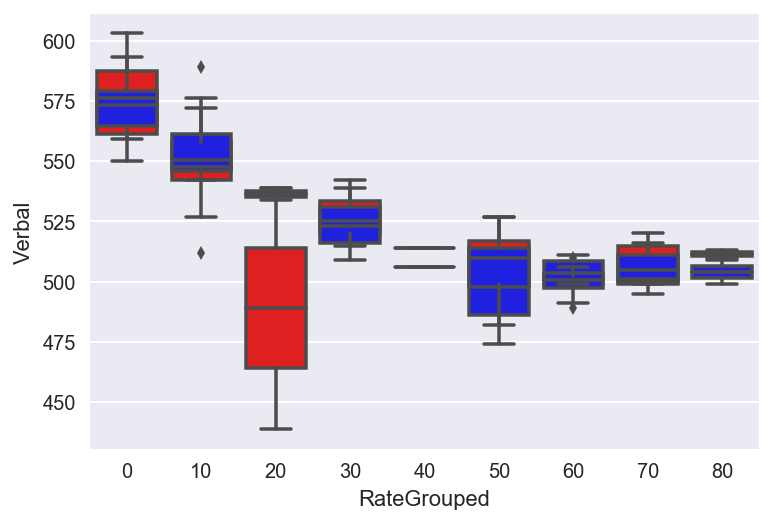

In [31]:
sns.boxplot(satdf2.RateGrouped,satdf2.Math, color='r')
sns.boxplot(satdf2.RateGrouped,satdf2.Verbal, color='b')

In [32]:
satdf2.head(5)

State  Rate  Verbal  Math  RateGrouped
0    CT    82     509   510           80
1    NJ    81     499   513           80
2    MA    79     511   515           70
3    NY    77     495   505           70
4    NH    72     520   516           70

In [33]:
satdfg = satdf2.drop('Rate',axis=1)

### Are Math and Verbal scores random?

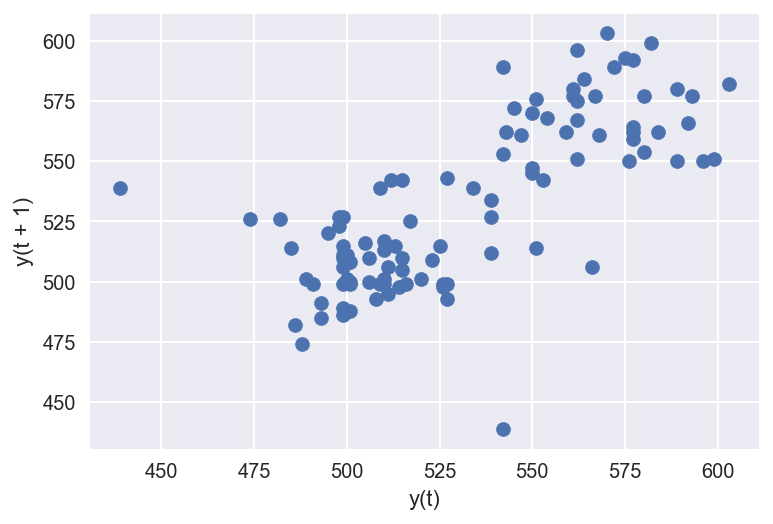

In [34]:
pd.plotting.lag_plot(satdfg.loc[:,['Math','Verbal']])

### Swarmplot distribution of Verbal and Math against Participation Rate

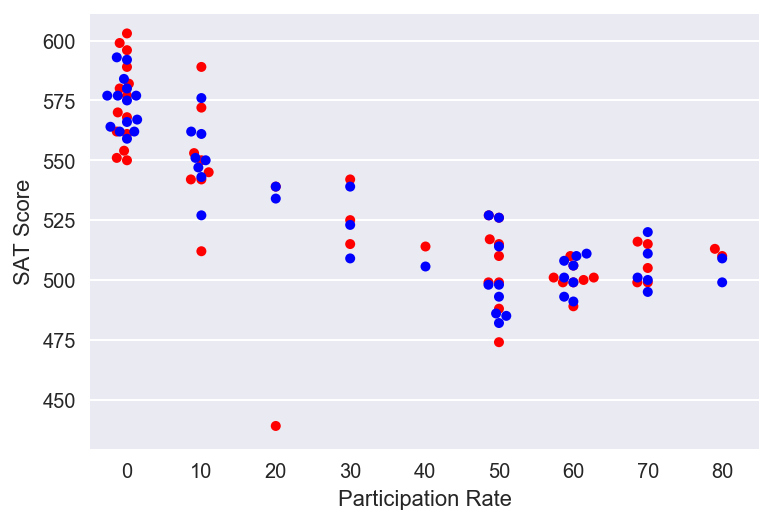

In [35]:
sns.swarmplot(satdfg['RateGrouped'],satdfg['Math'] , color='r')
sns.swarmplot(satdfg['RateGrouped'],satdfg['Verbal'], color='b' )
plt.xlabel('Participation Rate')
plt.ylabel("SAT Score")

### Create a Total SAT score, since they're related

In [36]:
satdf2['Total'] = satdf2['Math']+ satdf2['Verbal']

In [37]:
satdf2.head(2)

State  Rate  Verbal  Math  RateGrouped  Total
0    CT    82     509   510           80   1019
1    NJ    81     499   513           80   1012

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




# Answer

In [38]:
vmean = satdf2.loc [satdf2['Verbal'] > np.mean(satdf2['Verbal']), 'State']
print vmean
print vmean.count()

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
24


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

# Difference

In [39]:
vmed = satdf2.loc [satdf2['Verbal'] > np.median(satdf2['Verbal']), 'State']
print vmed
print vmed.count()

19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
26


### Higher in both median and mean

In [40]:
def AND(column1,column2):
    newcolumn = []
    for element in column1.keys():
        if element in column2.keys():
            newcolumn.append(column1[element])
    return newcolumn

In [41]:
vmean.keys()

Int64Index([26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
            44, 45, 46, 47, 48, 49, 50],
           dtype='int64')

### Same except median has 2 more

In [42]:
print AND(vmed,vmean)
print len(AND(vmed,vmean))

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
24


### Difference

In [43]:
def NOT(column1,column2):
    newcolumn = []
    for element in column1.keys():
        if element not in column2.keys():
            newcolumn.append(column1[element])
    return newcolumn

In [44]:
print NOT(vmed,vmean)

['WA', 'WV']


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

# Difference

In [45]:
satdf2['difference'] = satdf2['Verbal'] - satdf2['Math']

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

# Answer

### Low math, high verbal

In [46]:
malay = satdf2.loc[:,['State','Verbal','Math','Rate','difference']].sort_values('difference', ascending=False).head(10)
malay.reset_index(inplace=True)
malay.drop('index', axis=1, errors='ignore',  inplace = True)
malay.head(3)

State  Verbal  Math  Rate  difference
0    OH     534   439    26          95
1    MS     566   551     4          15
2    WV     527   512    18          15

### High math, low verbal

In [47]:
cina = satdf2.loc[:,['State','Verbal','Math','Rate','difference']].sort_values('difference',ascending=True).head(10)
cina.reset_index(inplace=True)
cina.drop('index', axis=1, errors='ignore',  inplace = True)
cina.head(3)

State  Verbal  Math  Rate  difference
0    HI     485   515    52         -30
1    CA     498   517    51         -19
2    NJ     499   513    81         -14

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


# Answer

In [48]:
cina.corr()

Verbal      Math      Rate  difference
Verbal      1.000000  0.990605 -0.919146    0.502806
Math        0.990605  1.000000 -0.936380    0.379873
Rate       -0.919146 -0.936380  1.000000   -0.298640
difference  0.502806  0.379873 -0.298640    1.000000

### Inferences
    When math is good, verbal is good too.
    when verbal is good, math may not be just as good
    A participation rate correlates with a high mathematical score when math is better than verbal
    when math is worse than verbal, a high math may not correlate with a high participation rate

In [49]:
malay.corr()

Verbal      Math      Rate  difference
Verbal      1.000000  0.739411 -0.890756    0.002363
Math        0.739411  1.000000 -0.602454   -0.671505
Rate       -0.890756 -0.602454  1.000000   -0.085551
difference  0.002363 -0.671505 -0.085551    1.000000

In [50]:
satdf2.corr()

Rate    Verbal      Math  RateGrouped     Total  difference
Rate         1.000000 -0.886432 -0.773746     0.995178 -0.849327   -0.101412
Verbal      -0.886432  1.000000  0.899871    -0.889333  0.972544    0.052600
Math        -0.773746  0.899871  1.000000    -0.768777  0.976666   -0.388219
RateGrouped  0.995178 -0.889333 -0.768777     1.000000 -0.848104   -0.118919
Total       -0.849327  0.972544  0.976666    -0.848104  1.000000   -0.181241
difference  -0.101412  0.052600 -0.388219    -0.118919 -0.181241    1.000000

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [51]:
satdf2.describe()

Rate      Verbal        Math  RateGrouped        Total  difference
count  52.000000   52.000000   52.000000    52.000000    52.000000   52.000000
mean   37.153846  532.019231  531.500000    32.500000  1063.519231    0.519231
std    27.301788   33.236225   36.014975    27.856425    67.498291   15.729939
min     4.000000  482.000000  439.000000     0.000000   956.000000  -30.000000
25%     9.000000  501.000000  504.000000     0.000000  1004.500000   -6.000000
50%    33.500000  526.500000  521.000000    30.000000  1043.500000    0.000000
75%    63.500000  562.000000  555.750000    60.000000  1119.250000    4.250000
max    82.000000  593.000000  603.000000    80.000000  1196.000000   95.000000

1. count = how many data points we have for that column
2. mean = the average of that column
3. std = the standard deviation, or the "variability" of that column, higher means more sparse
4. min = the minimum vaue within that column
5. percentile --> What percent of the population has at least this value
6. 25%, the 25th percentile. 25% of the values in the column has at at least this value. Same for 50, 75.
7. max = the highest value in the column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

# Answer

In [52]:
SAT_Covariance = satdf2.cov()
SAT_Covariance

Rate       Verbal         Math  RateGrouped        Total  \
Rate          745.387632  -804.355958  -760.803922   756.862745 -1565.159879   
Verbal       -804.355958  1104.646682  1077.147059  -823.382353  2181.793741   
Math         -760.803922  1077.147059  1297.078431  -771.274510  2374.225490   
RateGrouped   756.862745  -823.382353  -771.274510   775.980392 -1594.656863   
Total       -1565.159879  2181.793741  2374.225490 -1594.656863  4556.019231   
difference    -43.552036    27.499623  -219.931373   -52.107843  -192.431750   

             difference  
Rate         -43.552036  
Verbal        27.499623  
Math        -219.931373  
RateGrouped  -52.107843  
Total       -192.431750  
difference   247.430995

## 1

 covariance measures the degree to which two variables are linearly associated. how changes in one variable are associated with changes in a second variable. Correlation is the result of normalizing the covariance into a range from -1 to 1, referring to on average, per 1 unit. covariance tries to look into and measure how much variables change together whereas correlation is a linear relationship of how changes in one variable changes the other variable scaled proportionately, a corr of 1 means variable one increase from 2 to 4 would result in variable 2 increase from 16 to 32.

## 2

Convert covariance to correlation by dividing covariance by the standard deviations of the variables
or just use the formula

## 3

Correlation matrix is preferred because it is normalized between -1 to 1 and therefore makes sense regardless of the scale of the variables are as different numbers mean different things between different covariances and that might be confusing. With correlation, all variables are normed and one does not need to understand the scale of each variable to understand the value of the correlation, simply looking at the correlation number is enough for inference.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

# Answer

In [53]:
drugdf = pd.read_csv(drugfile)
drugdf.head(3)

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0               -        ...                    0.1                24.5   
1             3.0        ...                    0.1                41.0   
2               -        ...                    0.4                 4.5   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                 2.0       0.0               -           0.2   
1                 4.0       0.1             5.0           0.1   
2                12.0       0.1            24.0           0.2   

  sedative-frequency  
0               13.0  
1               19.0  
2               16.5  

[3 rows x 28 columns]

In [54]:
drugdf.shape

(17, 28)

In [55]:
print drugdf.isnull().sum().sum()
print drugdf.dtypes

0
age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object


## No null values but some values are objects when they should be floats.
    presence of -

In [56]:
import re
number = '(^[*0-9.]*)'


### Make a function to clean the columns and convert it into floats

In [57]:
def intonumeric(column,df=drugdf):
    
    nonsense = '[^0-9]'
    #This takes the maximum value if its a range
    try:
        #this finds the nonsense
        mask = df[column].apply(lambda x: bool(re.match(nonsense,x)))
         #this changes makes the nonsense into nan
        df.loc[mask,column] = np.nan
    except:
        pass
    
    
    #this changes object into numeric
    df[column]= pd.to_numeric(df[column], errors='ignore')


### list of columns to clean

In [58]:
dirty =[clean[0] for clean in drugdf.dtypes.iteritems() if clean[1] =='object']
dirty.pop(0) #cleans the age out as we will process that differently

'age'

In [59]:
dirty

['cocaine-frequency',
 'crack-frequency',
 'heroin-frequency',
 'inhalant-frequency',
 'oxycontin-frequency',
 'meth-frequency']

### Clean the columns

In [60]:
for filth in dirty:
    intonumeric(filth)
try:
    drugdf['age'] = [element[0] for element in drugdf['age'].apply(lambda x: (re.findall(number,x)) )]
    drugdf['age']= pd.to_numeric(drugdf['age'], errors='ignore')
except:
    pass

### Check it out

In [61]:
print drugdf.dtypes
drugdf.head(3)

age                          int64
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object


age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0   12  2798          3.9                3.0            1.1   
1   13  2757          8.5                6.0            3.4   
2   14  2792         18.1                5.0            8.7   

   marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                  4.0          0.1                5.0        0.0   
1                 15.0          0.1                1.0        0.0   
2                 24.0          0.1                5.5        0.0   

   crack-frequency         ...          oxycontin-use  oxycontin-frequency  \
0              NaN         ...                    0.1                 24.5   
1              3.0         ...                    0.1                 41.0   
2              NaN         ...                    0.4                  4.5   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   

   stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                  2.0       0.0             NaN           0.2   
1                  4.0       0.1             5.0           0.1   
2                 12.0       0.1            24.0           0.2   

   sedative-frequency  
0                13.0  
1                19.0  
2                16.5  

[3 rows x 28 columns]

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

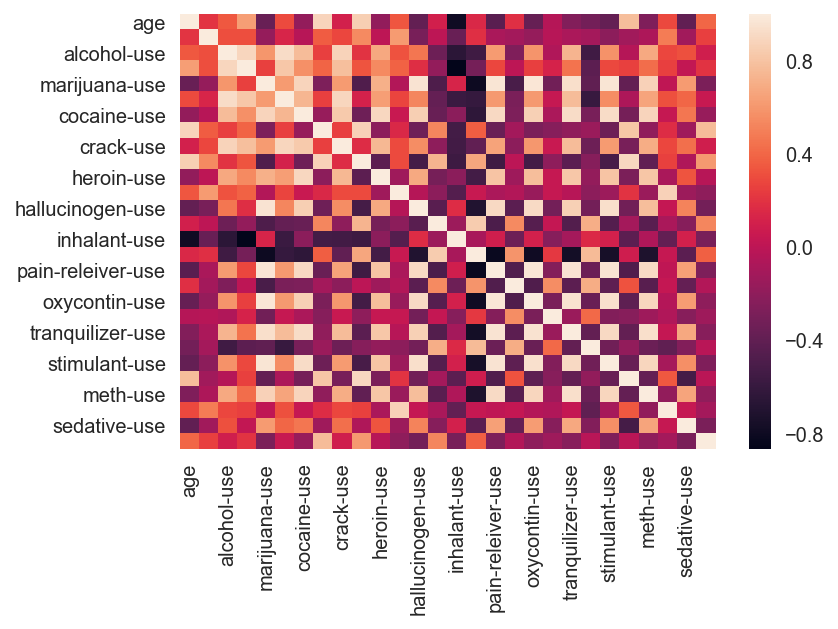

In [62]:
sns.heatmap(drugdf.corr())
plt.rcParams['figure.figsize']=(30,30)

### We observe some extreme values for inverse correlations and correlations for inhalant frequency

#### Get the list of uses and frequencies and plot the trend for these against age

In [63]:
use = [use for use in drugdf.columns[2::2] ]
frequencies = [ frequency for frequency in drugdf.columns[1::2]]
frequencies.pop(0)

'n'

### Trend of Use over age

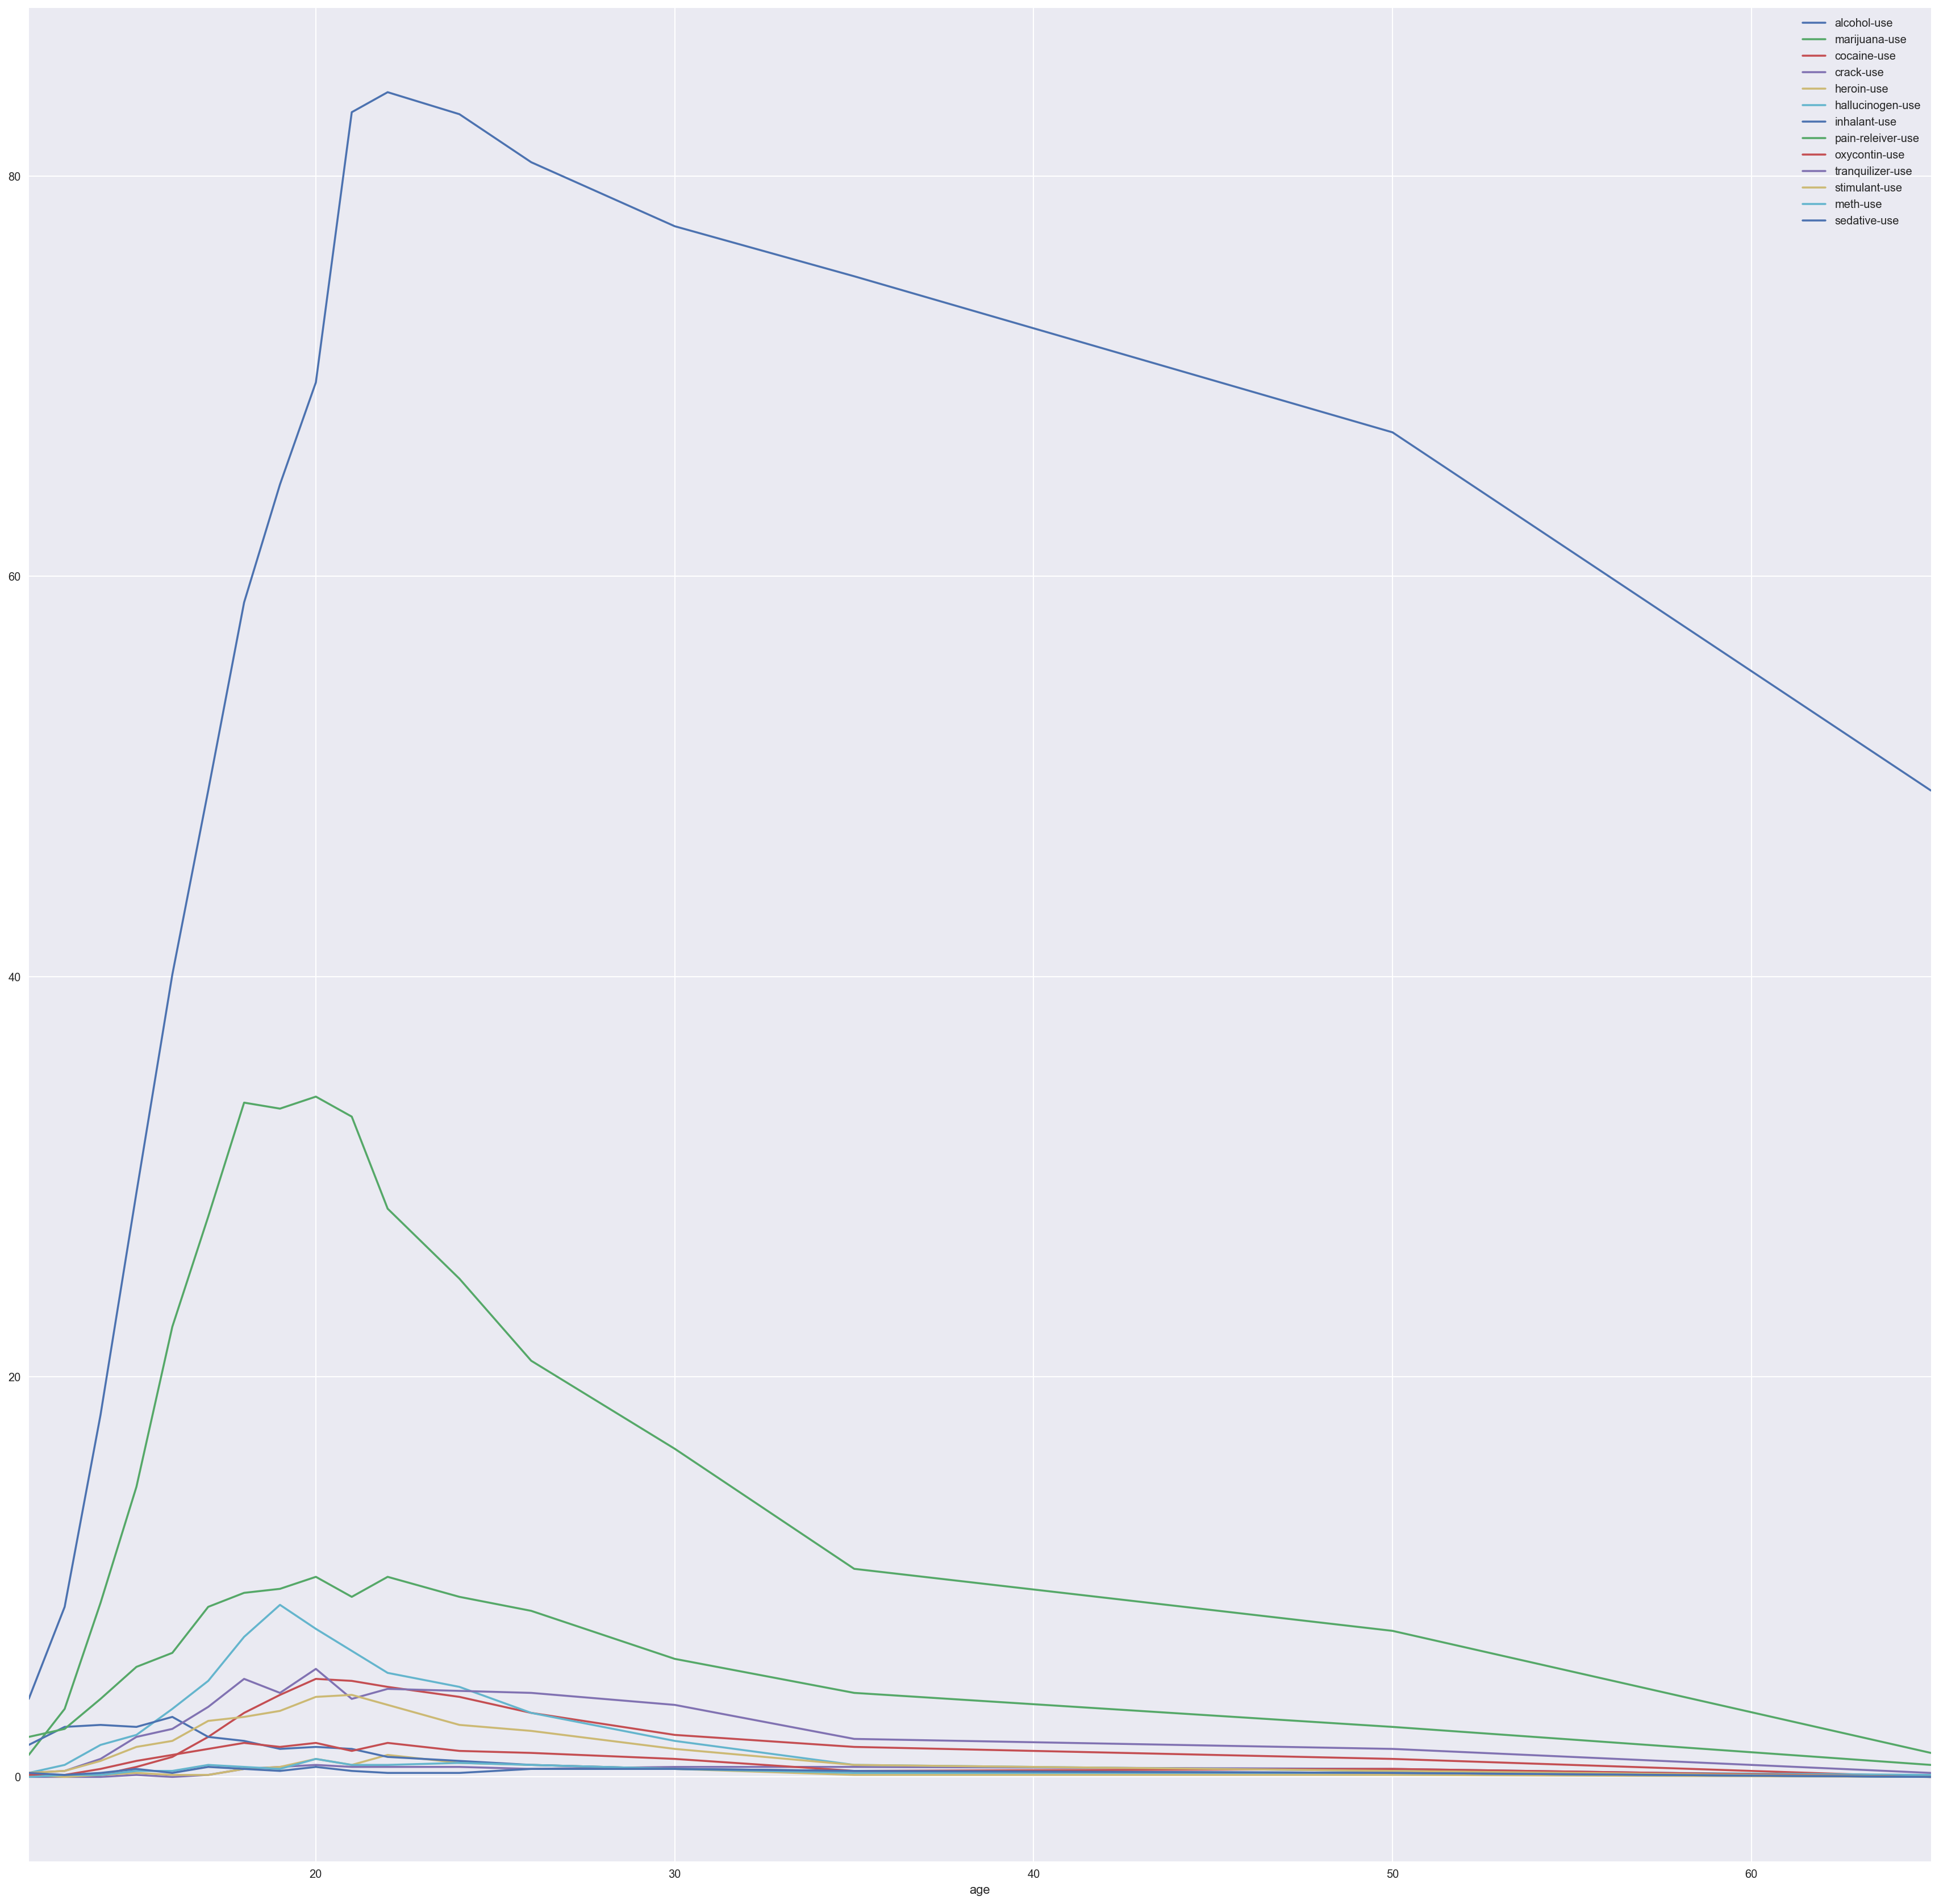

In [64]:
drugdf.plot.line(x='age',y=use)

### Remove alcohol and marijuana

In [65]:
without = use[:]
without.remove('marijuana-use')
without.remove('alcohol-use')

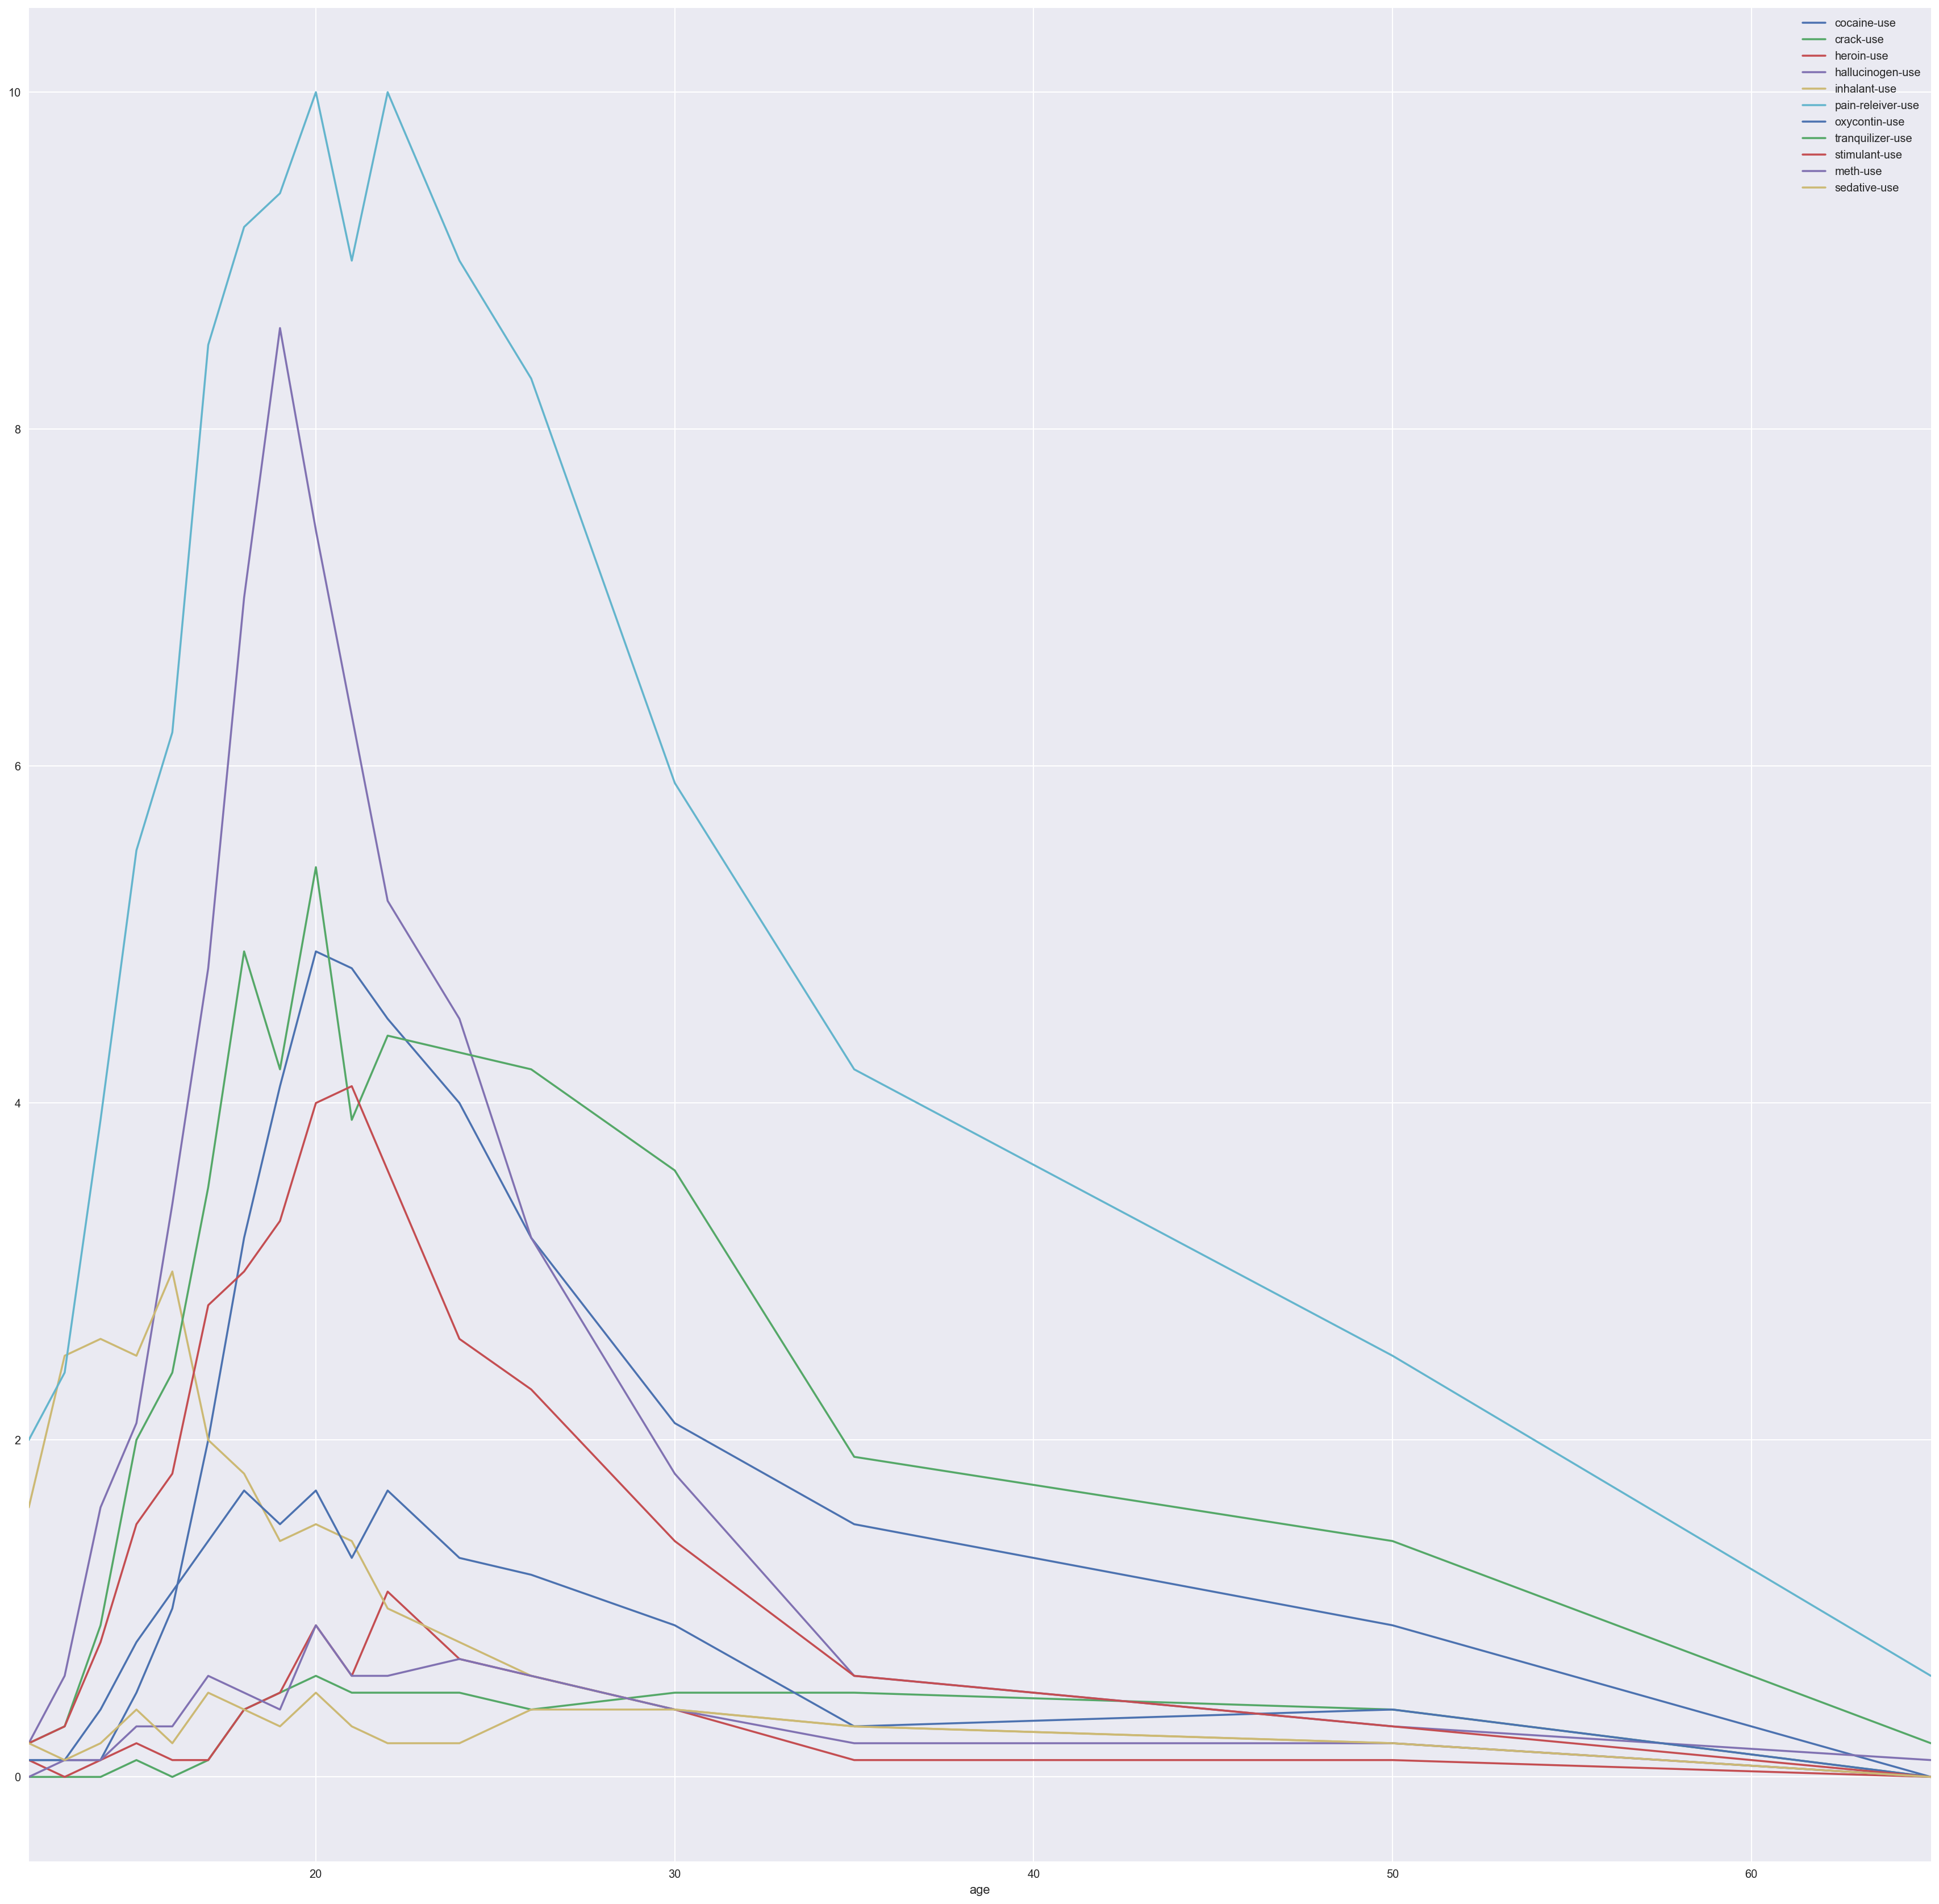

In [66]:
drugdf.plot.line(x='age',y=without)

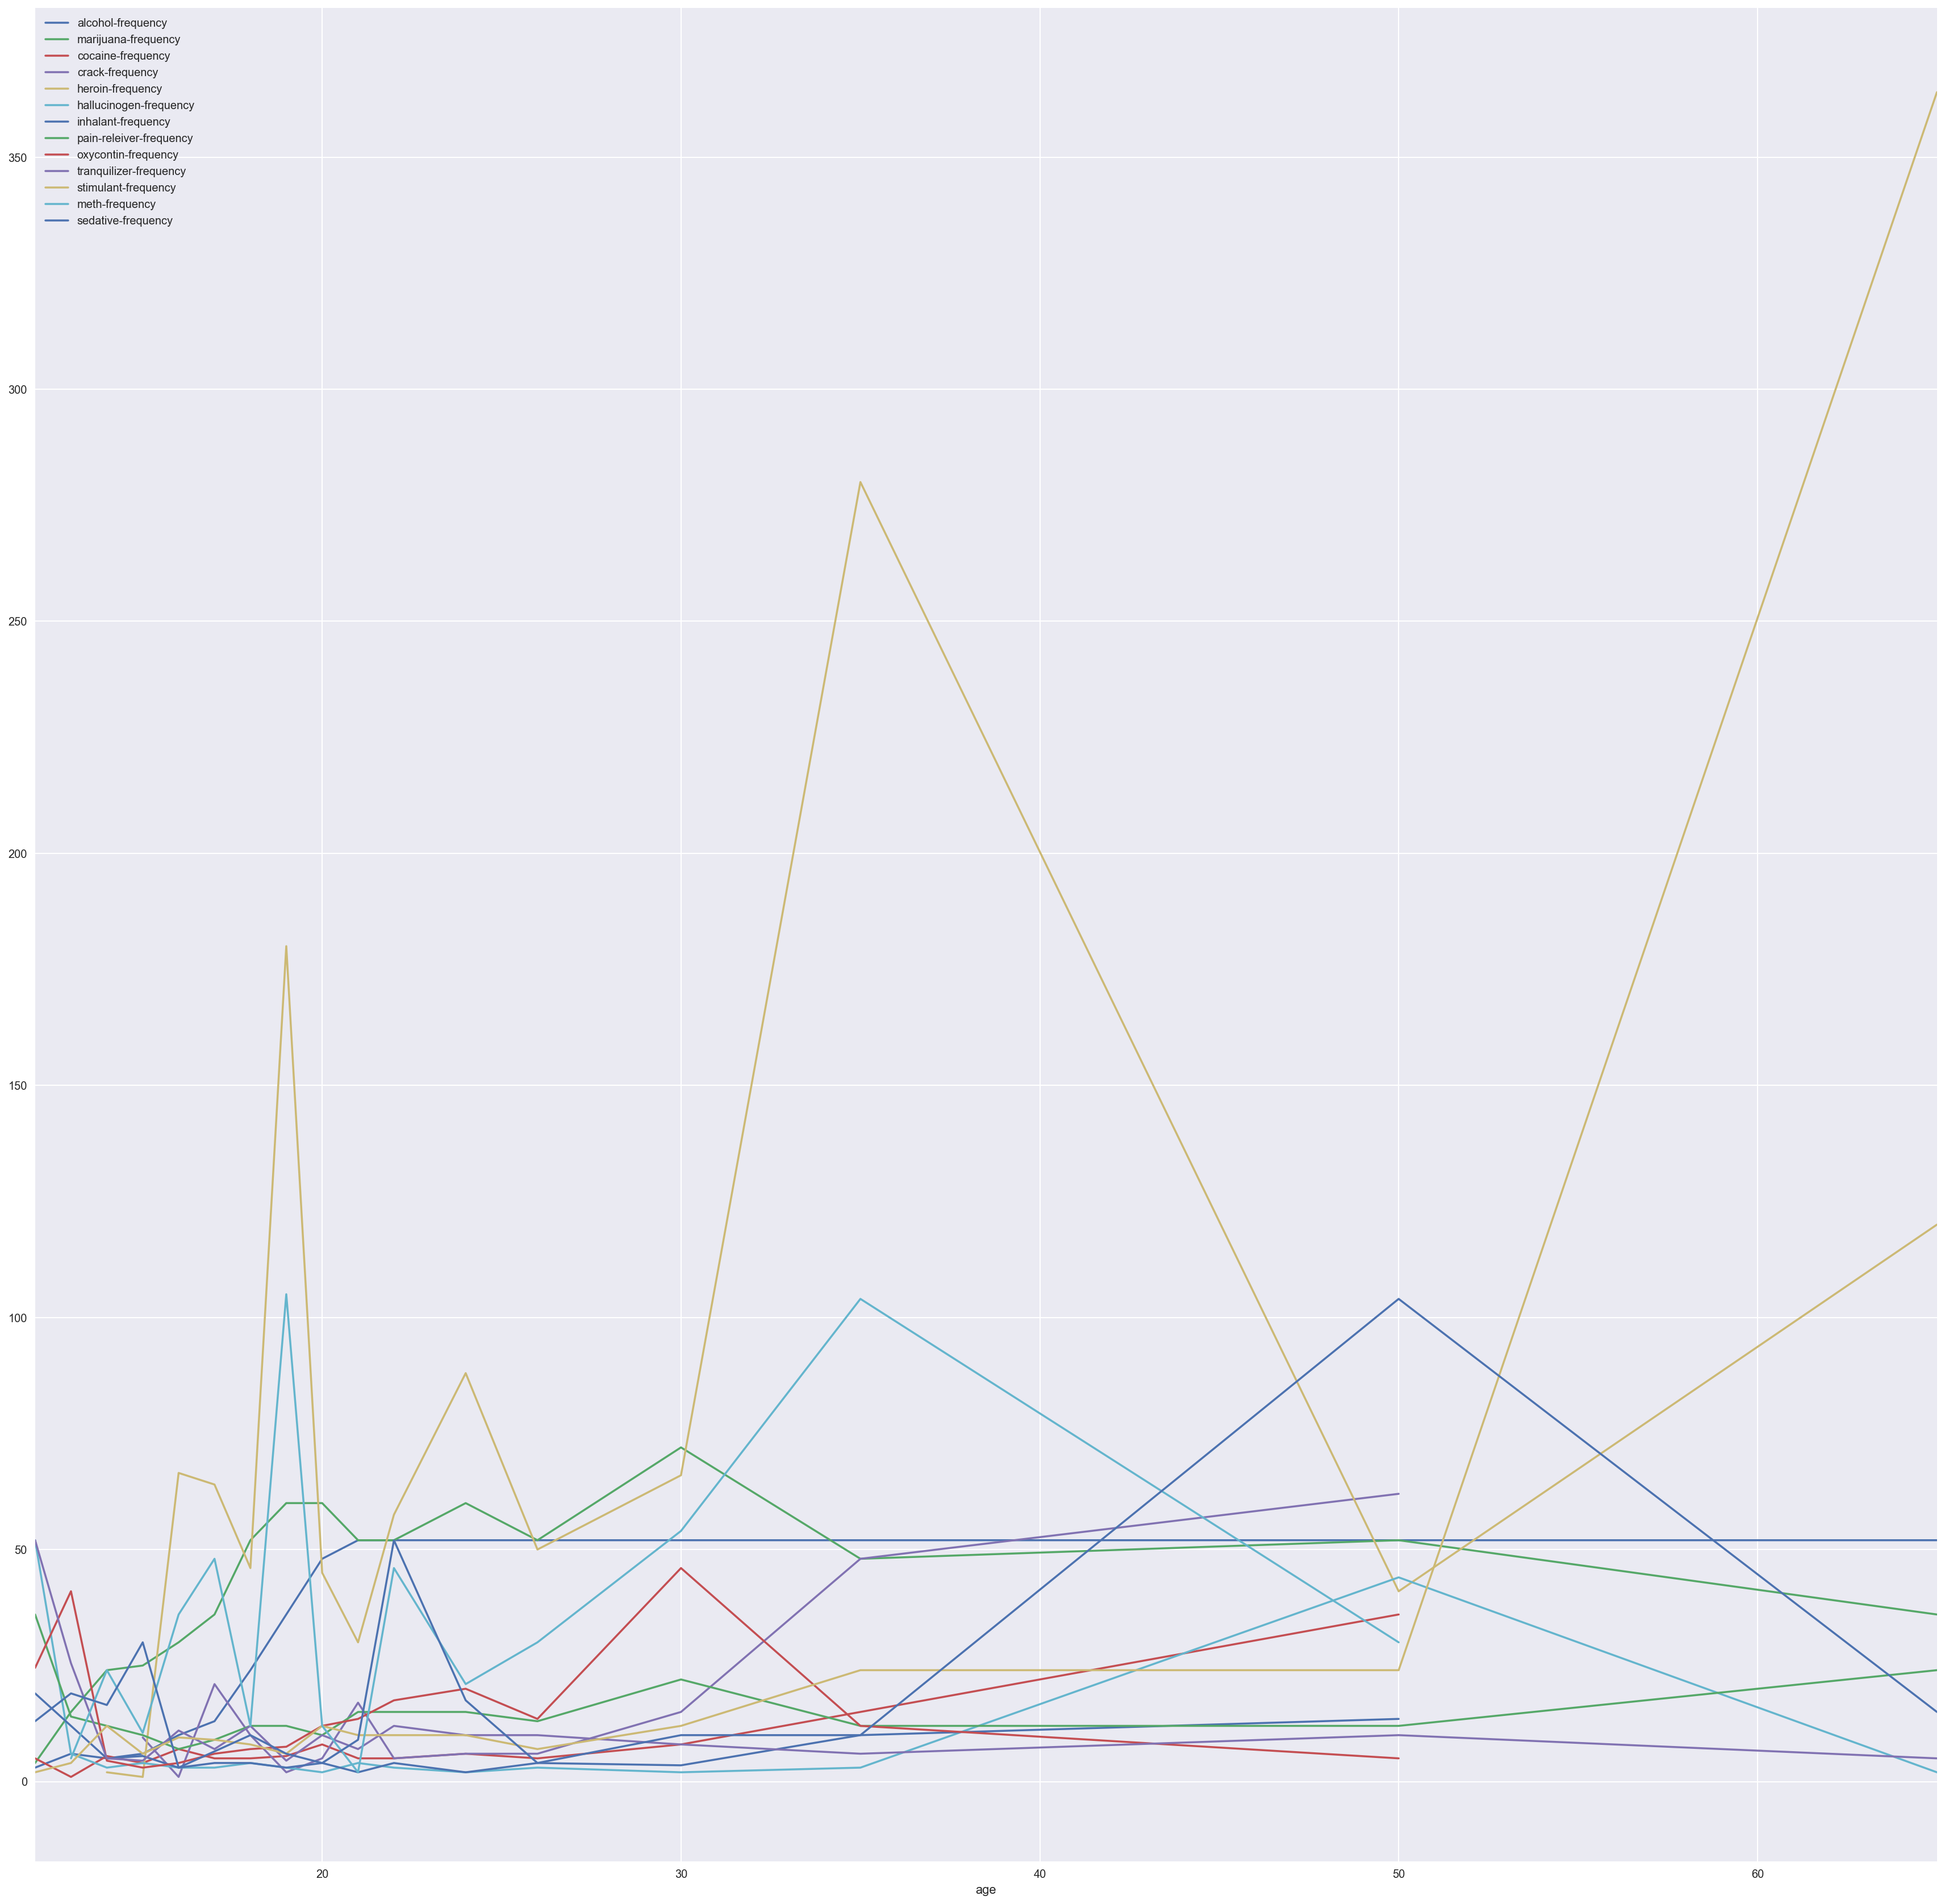

In [67]:
drugdf.plot.line(x='age',y=frequencies)

### Create new column by multiplying frequency by use

In [68]:
total =[]
for uses,frequency in zip(use,frequencies):
    word = uses.rsplit('-',1)[0] + '-total'
    total.append(word)
    drugdf[word] = drugdf[uses] * drugdf[frequency]
    

### Plot the cumulative over age

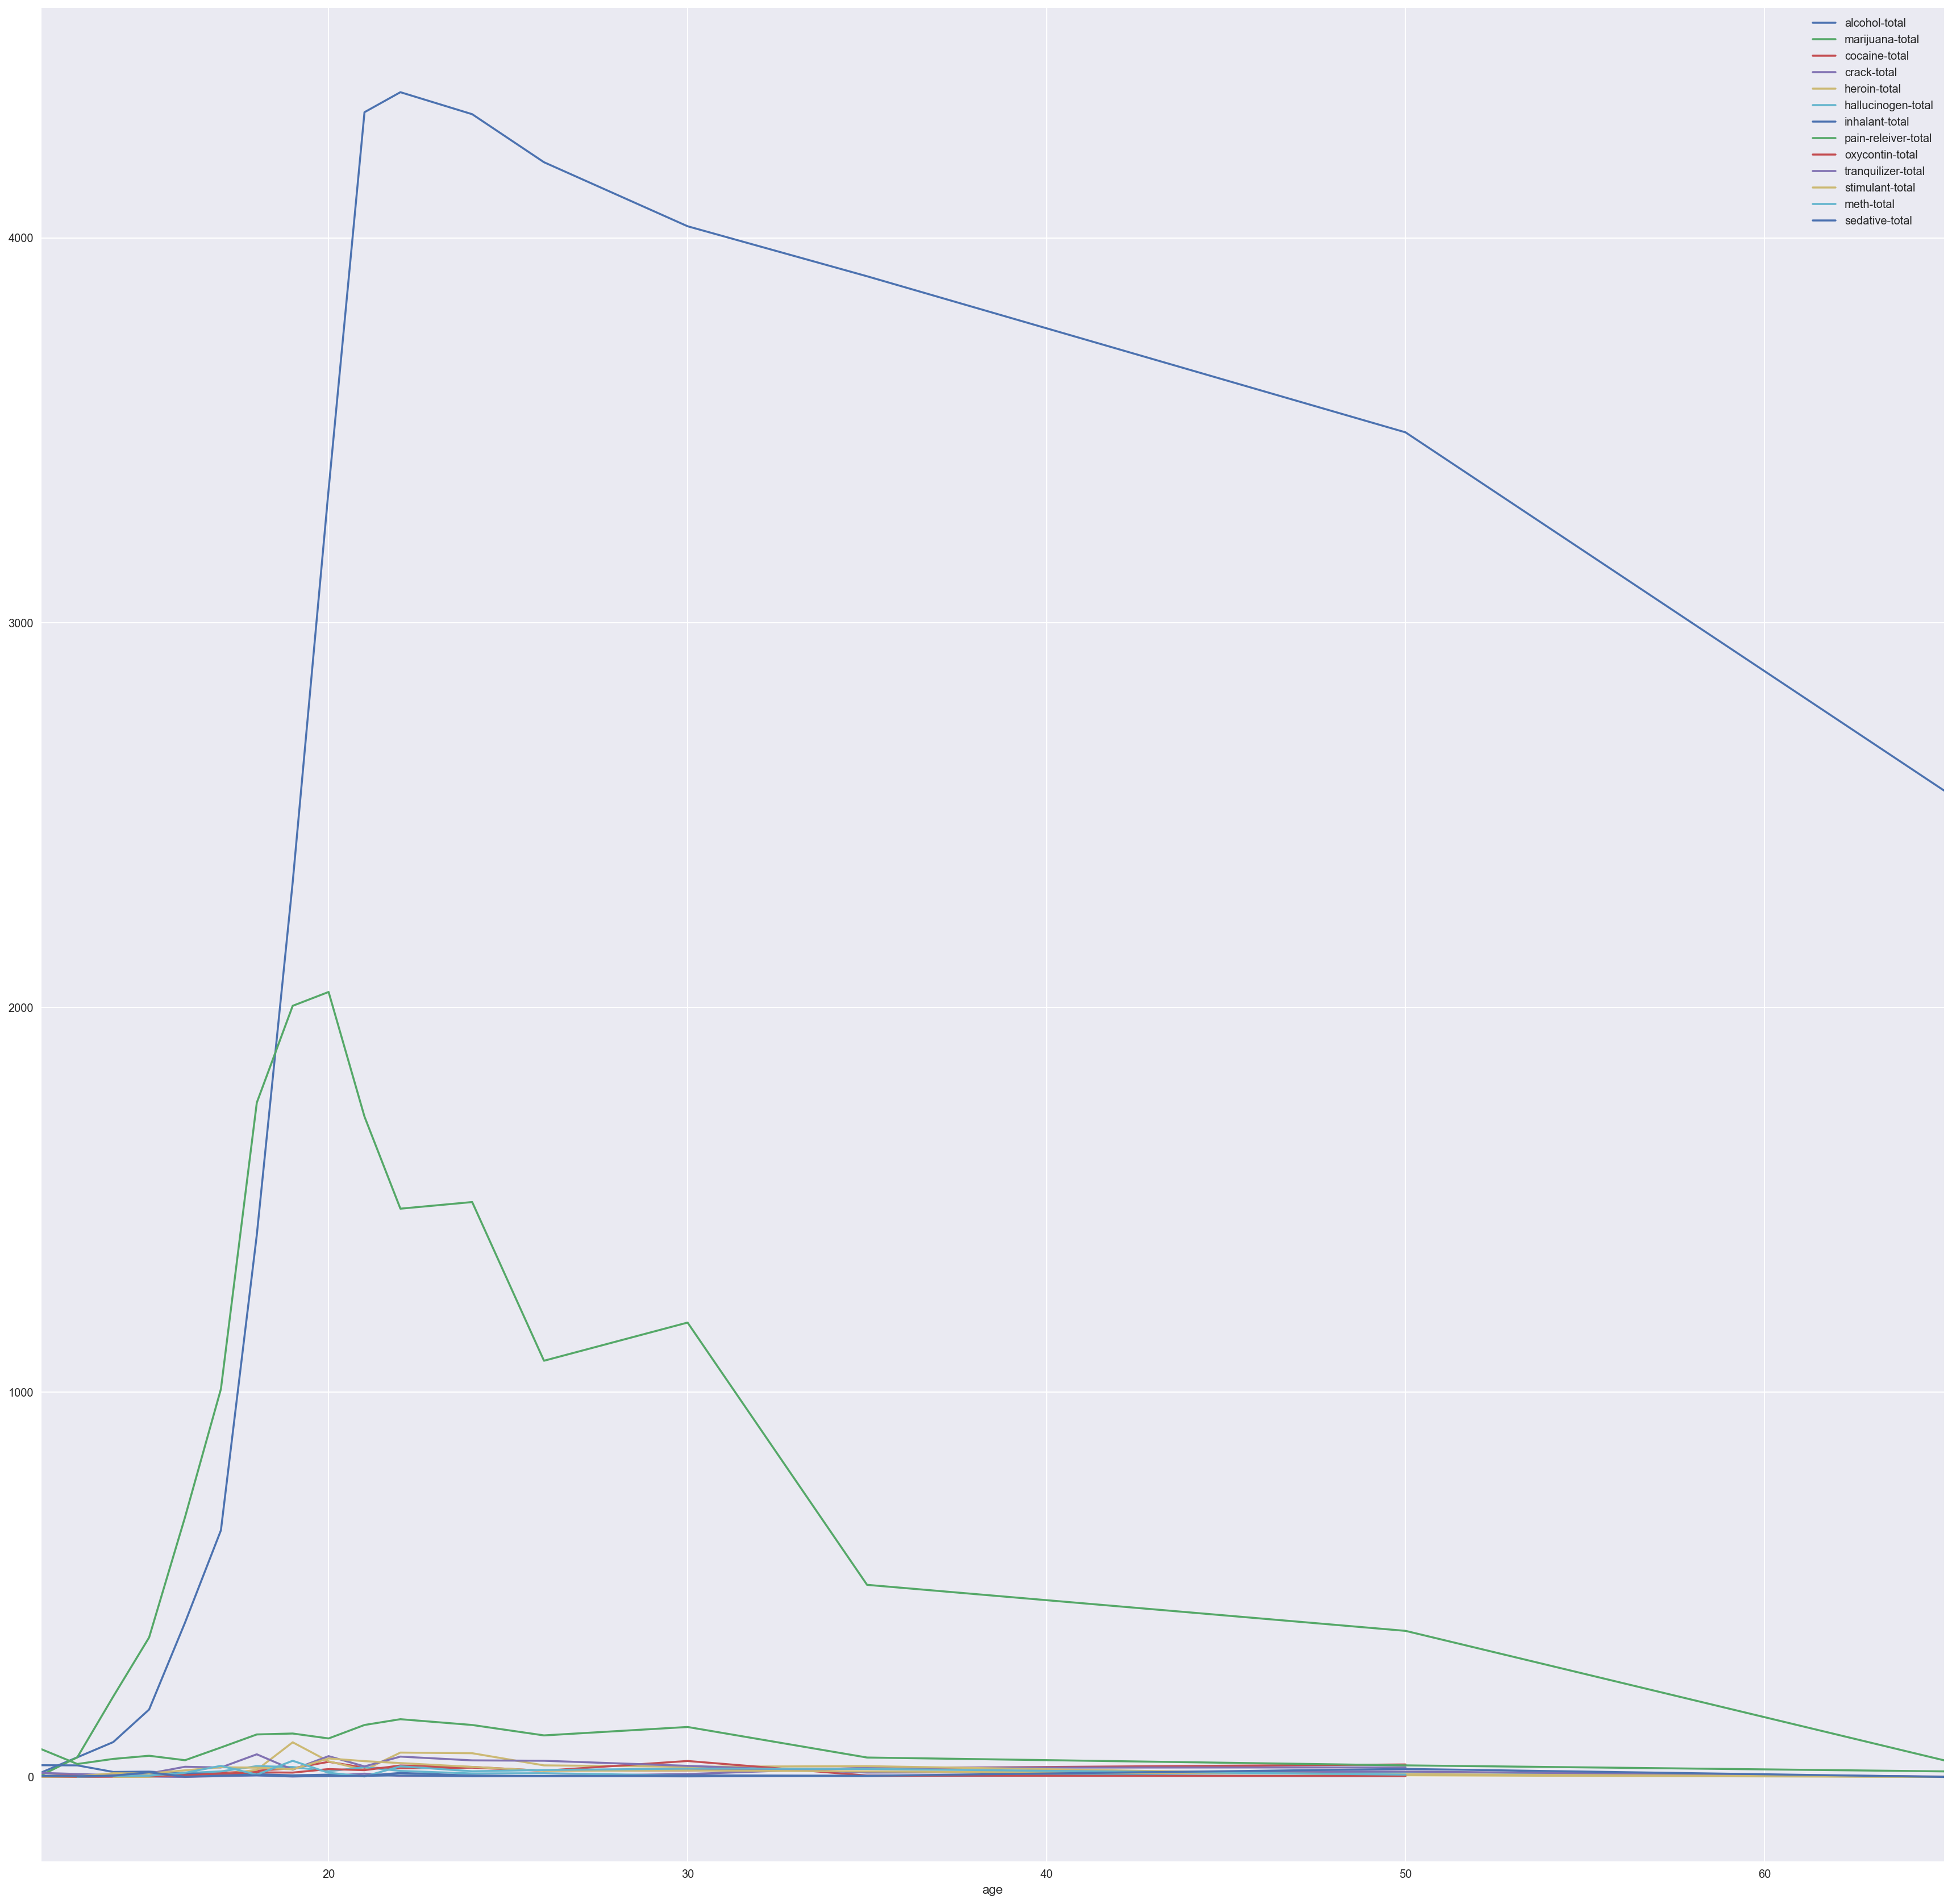

In [69]:
drugdf.plot(x='age',y=total)

## without the marijuana and alcohol

In [70]:
totalwithout =total[:]
totalwithout.remove('marijuana-total')
totalwithout.remove('alcohol-total')

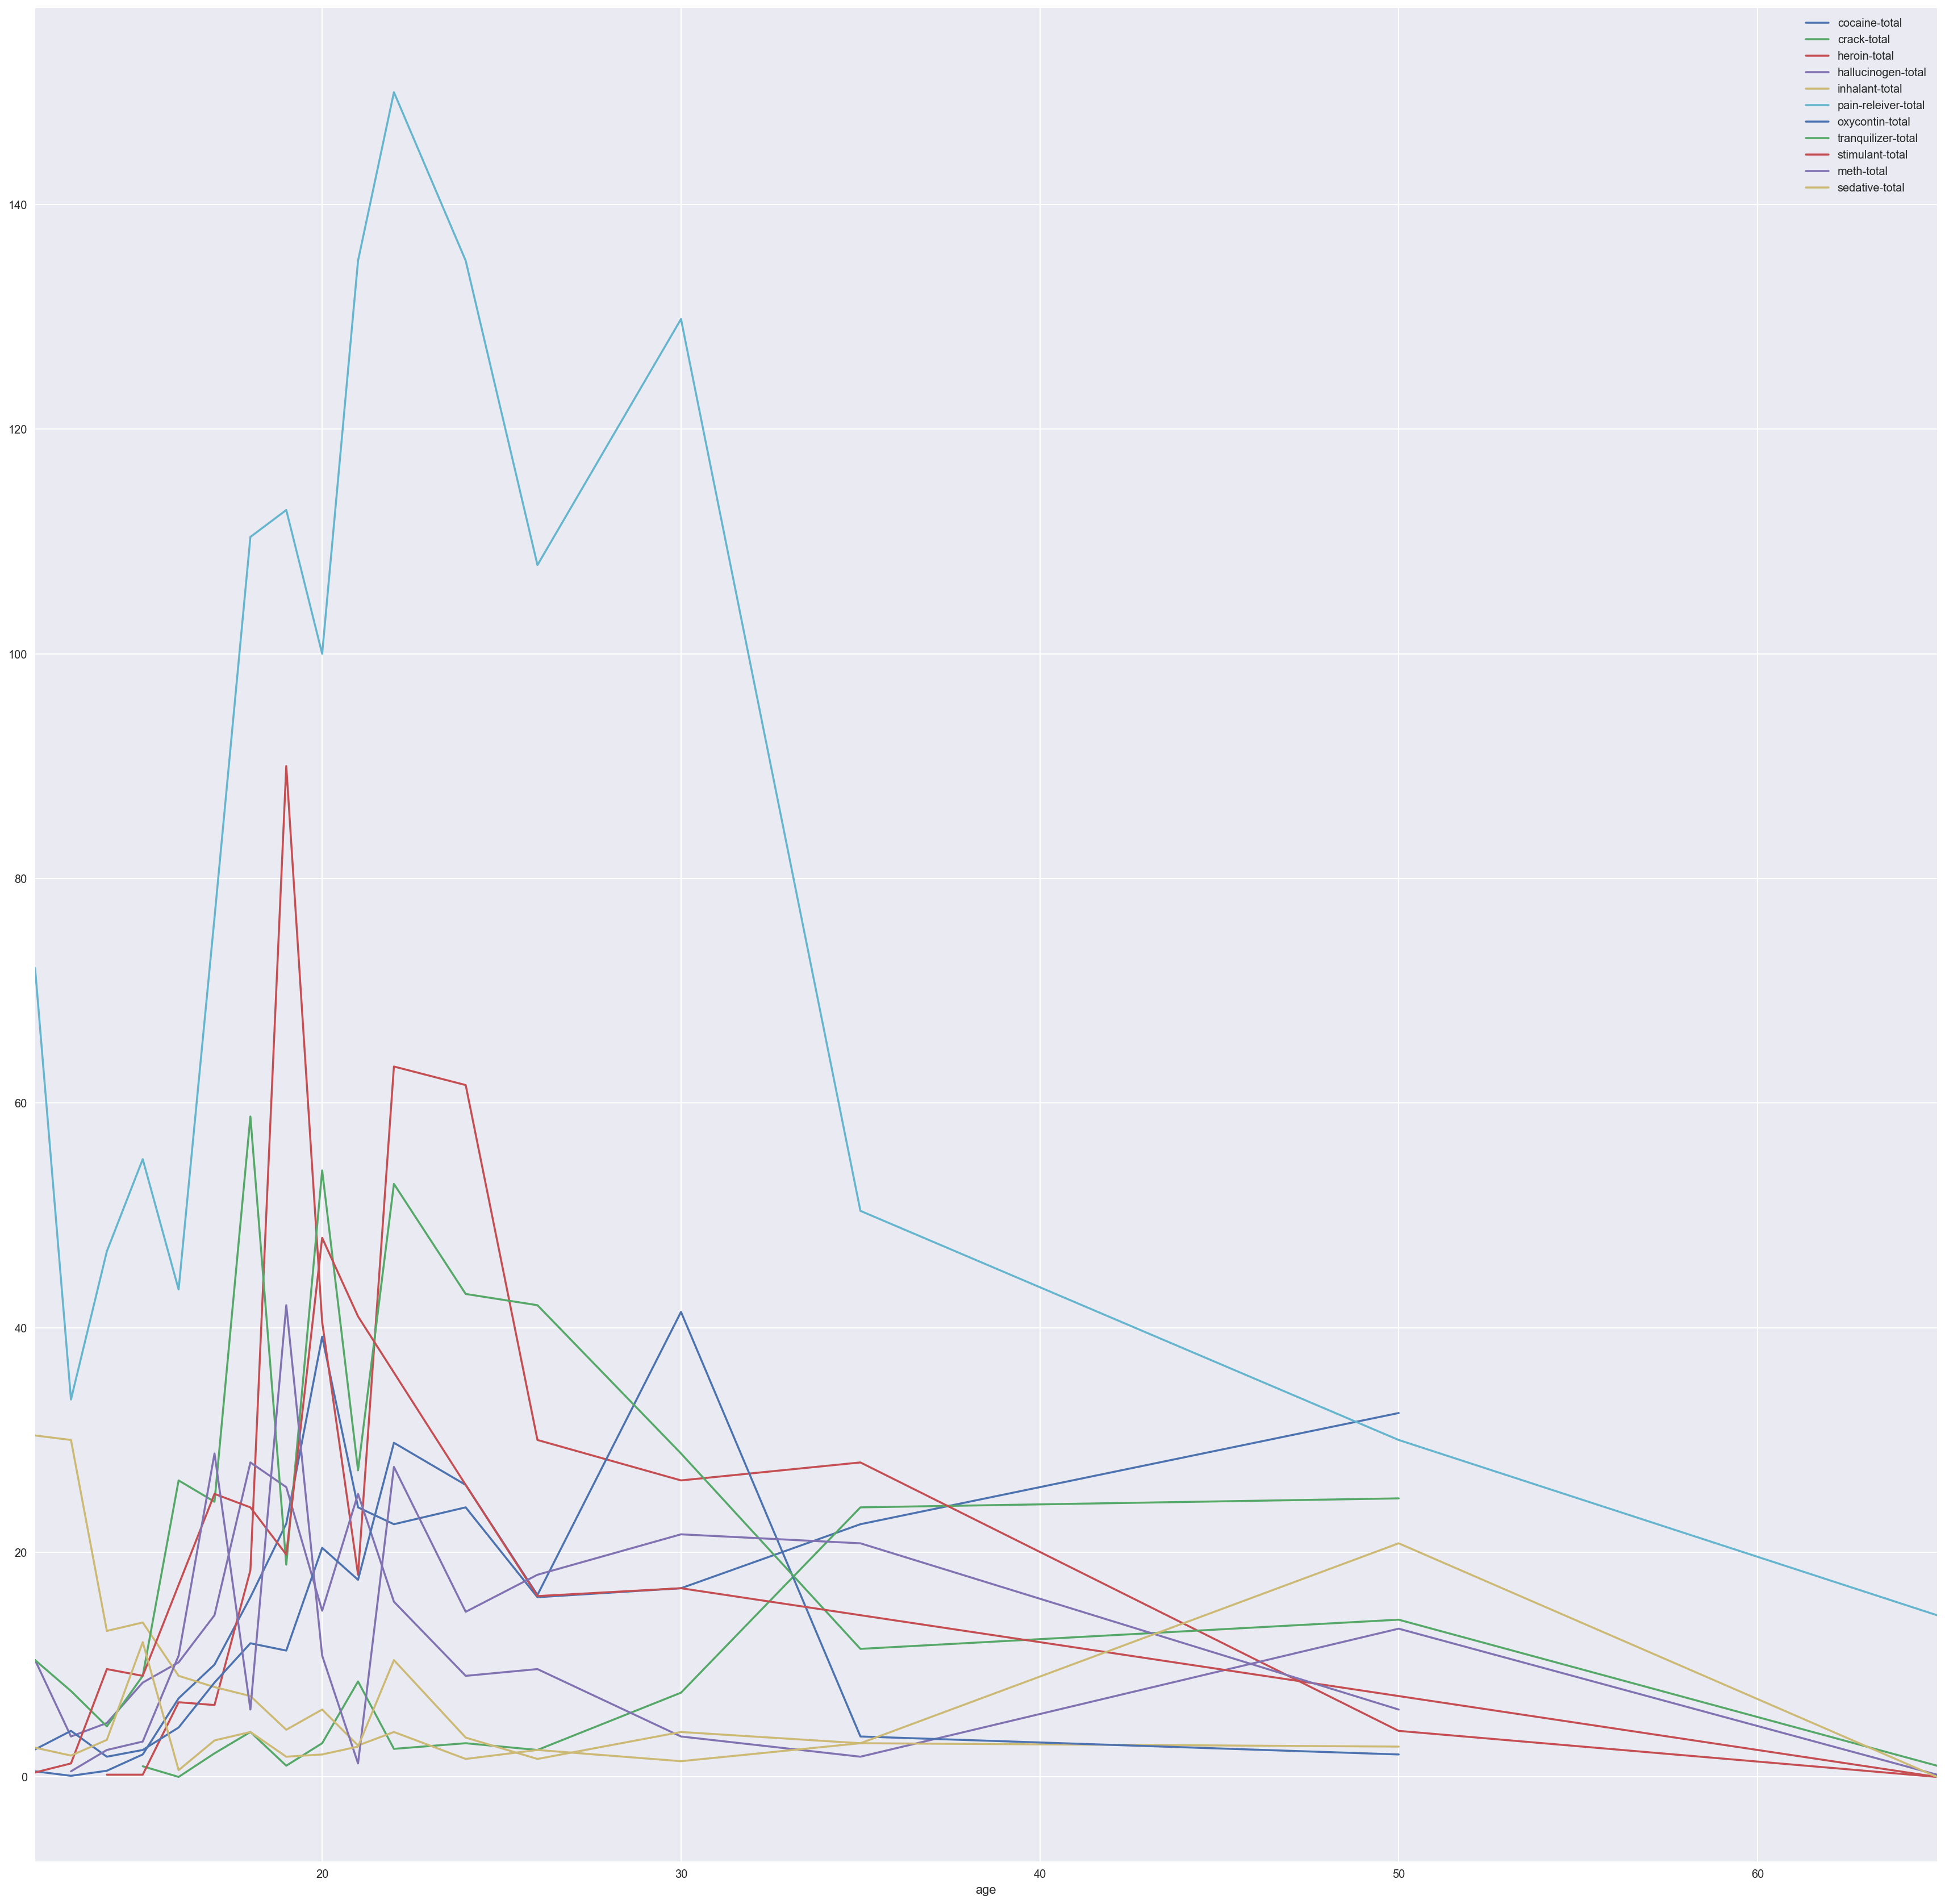

In [71]:
drugdf.plot(x='age',y=totalwithout)

###  plot a heatmap of total  correlations

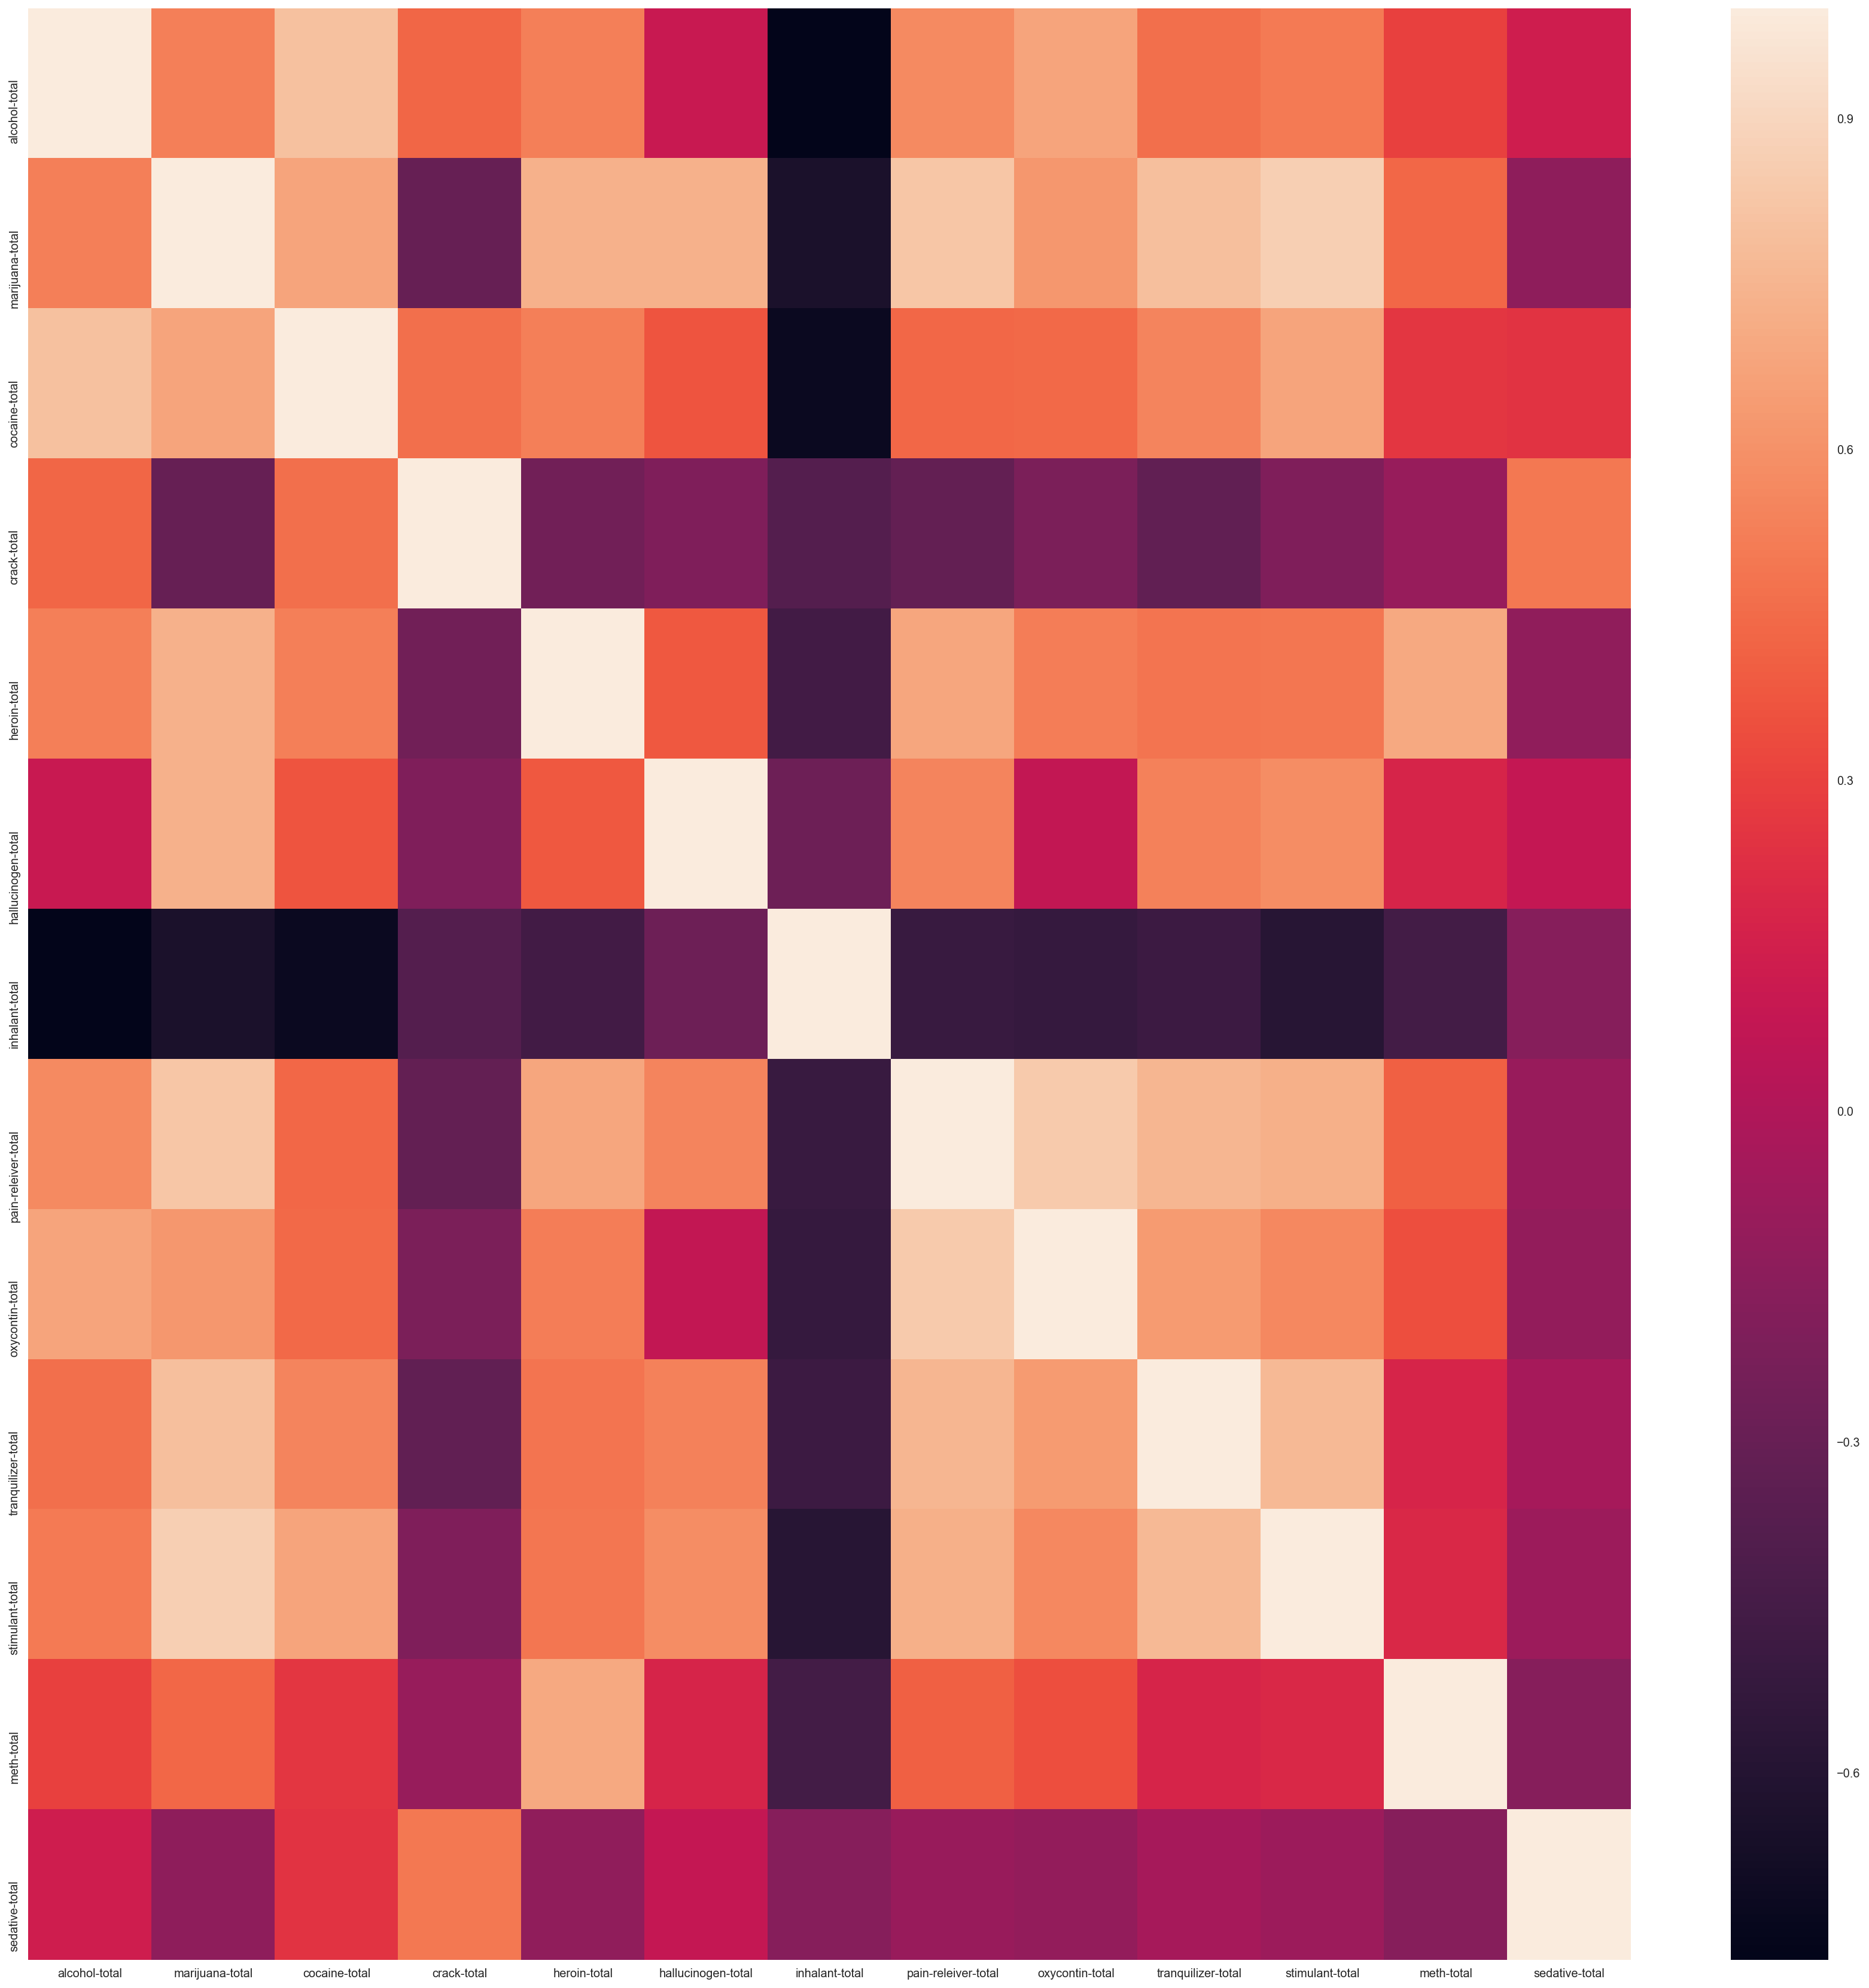

In [72]:
sns.heatmap(drugdf[total].corr())

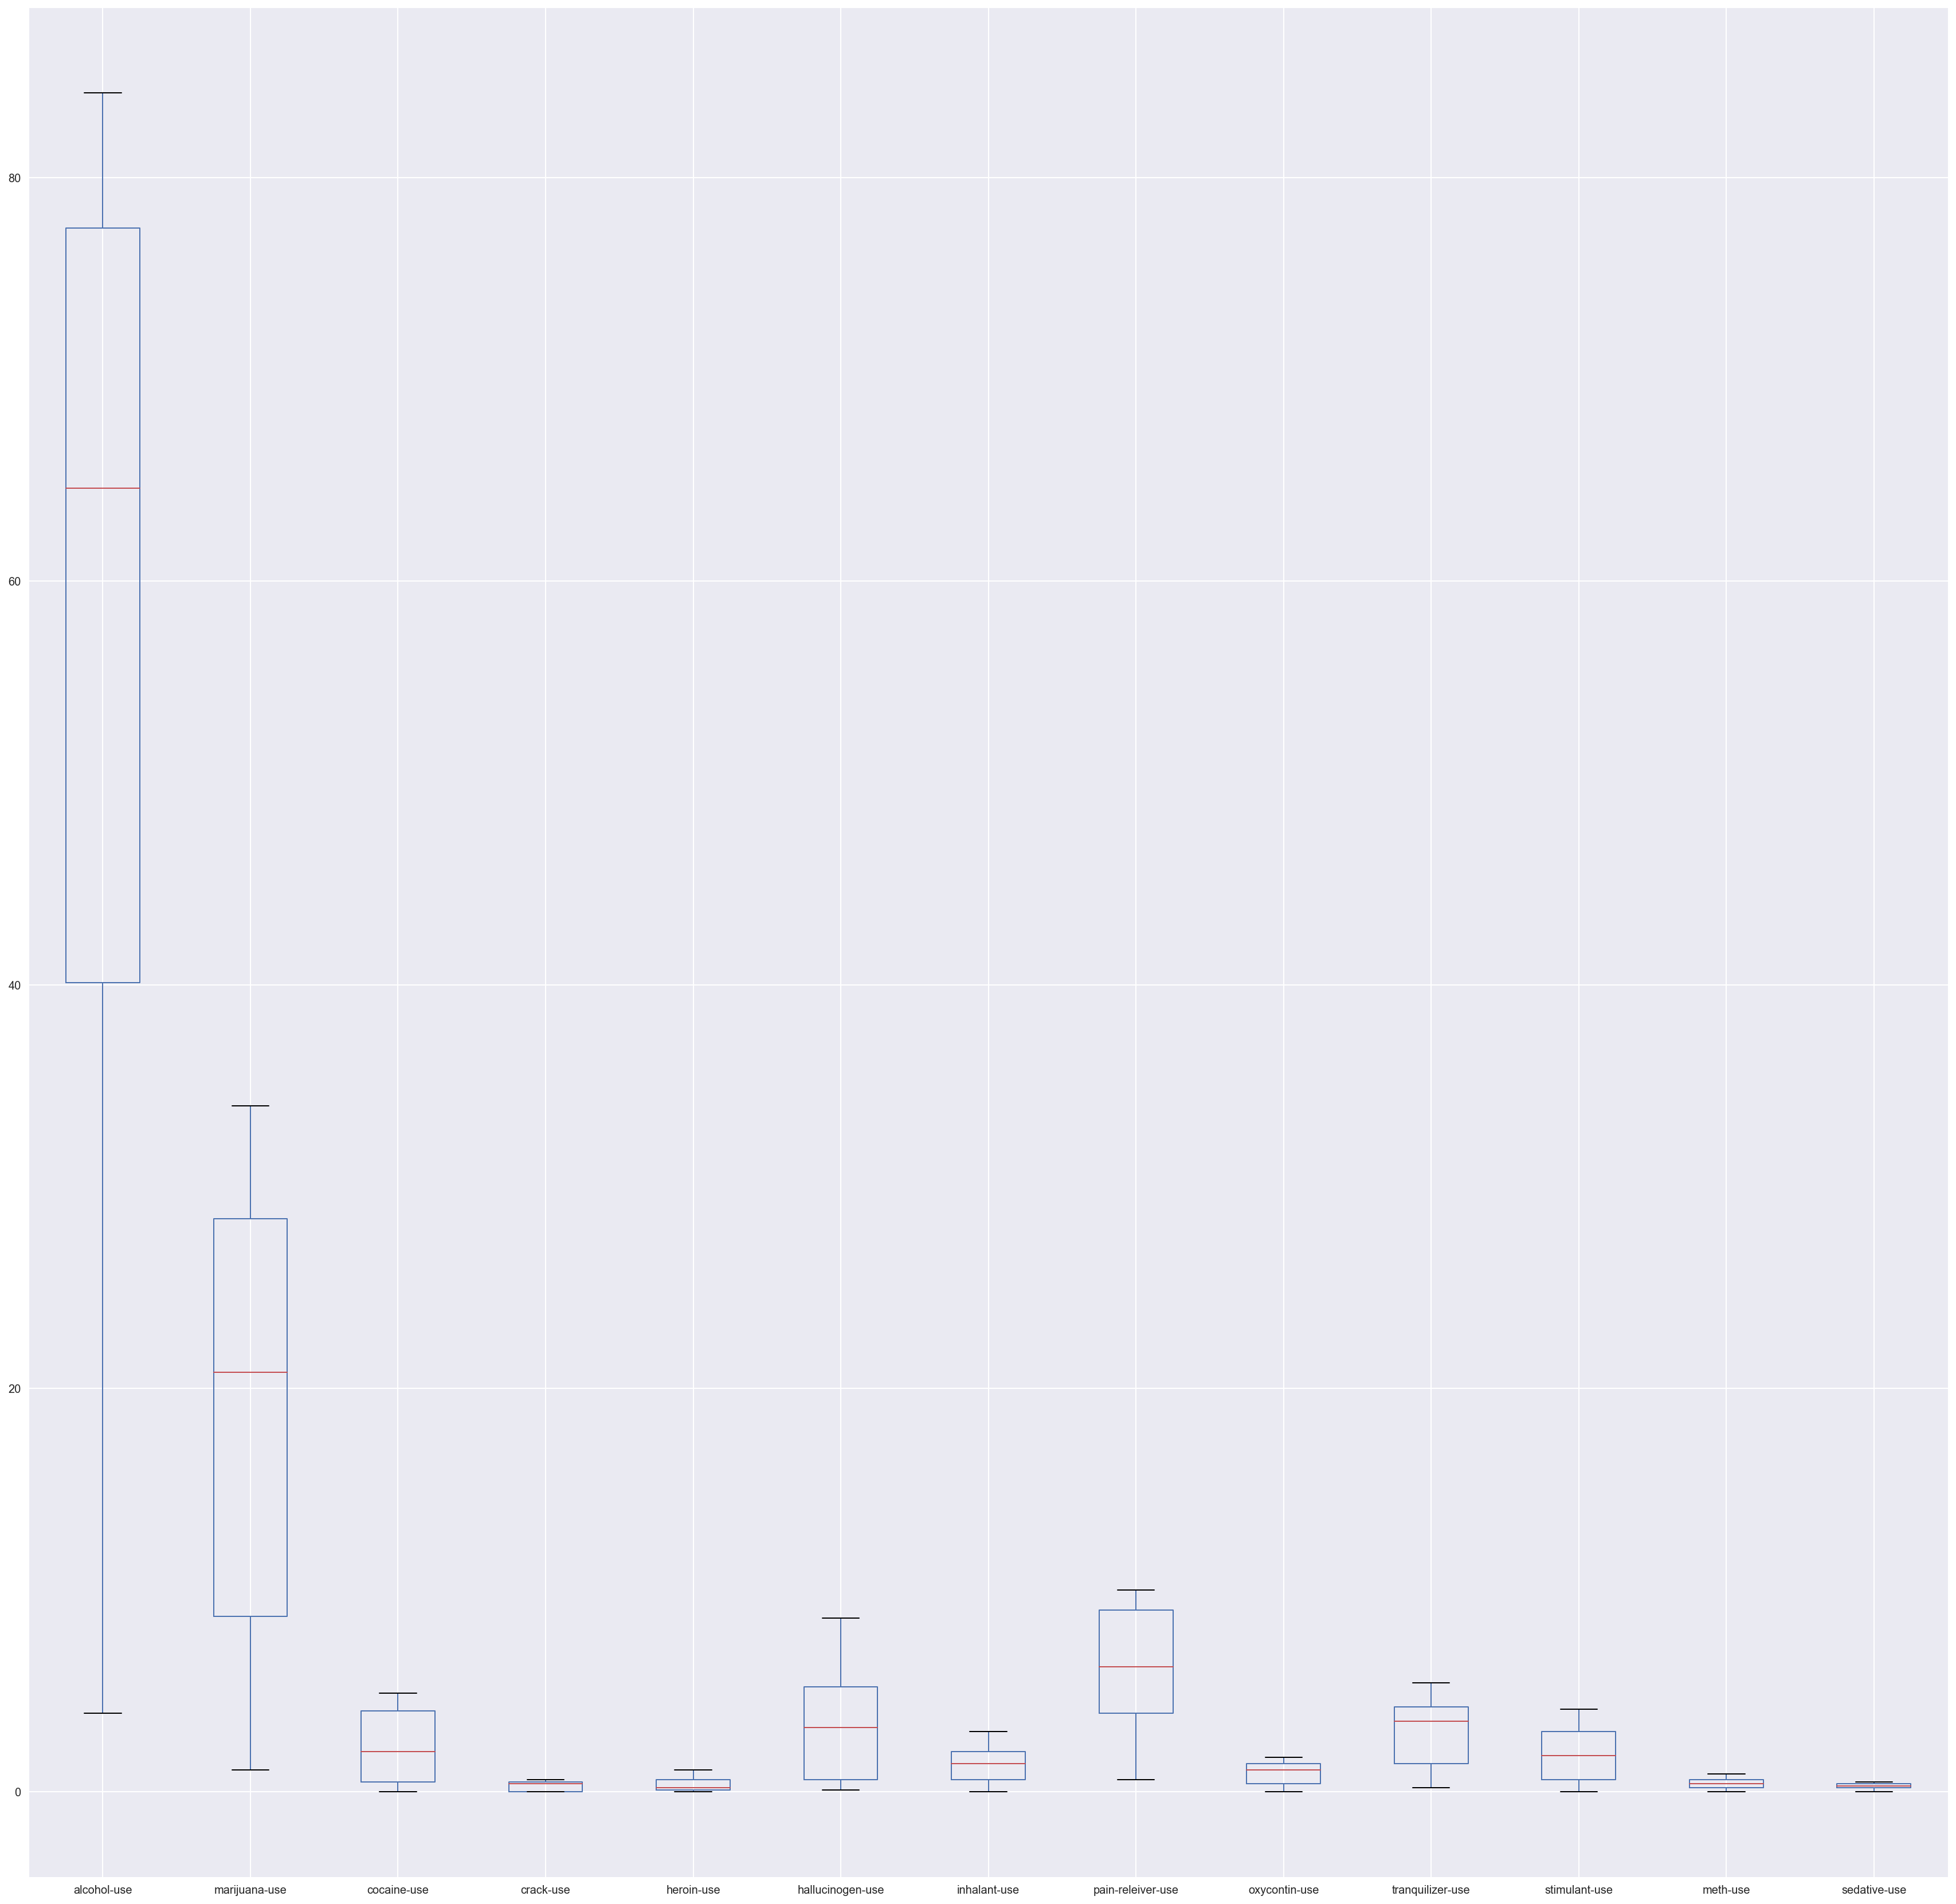

In [73]:
drugdf.boxplot(column=use)


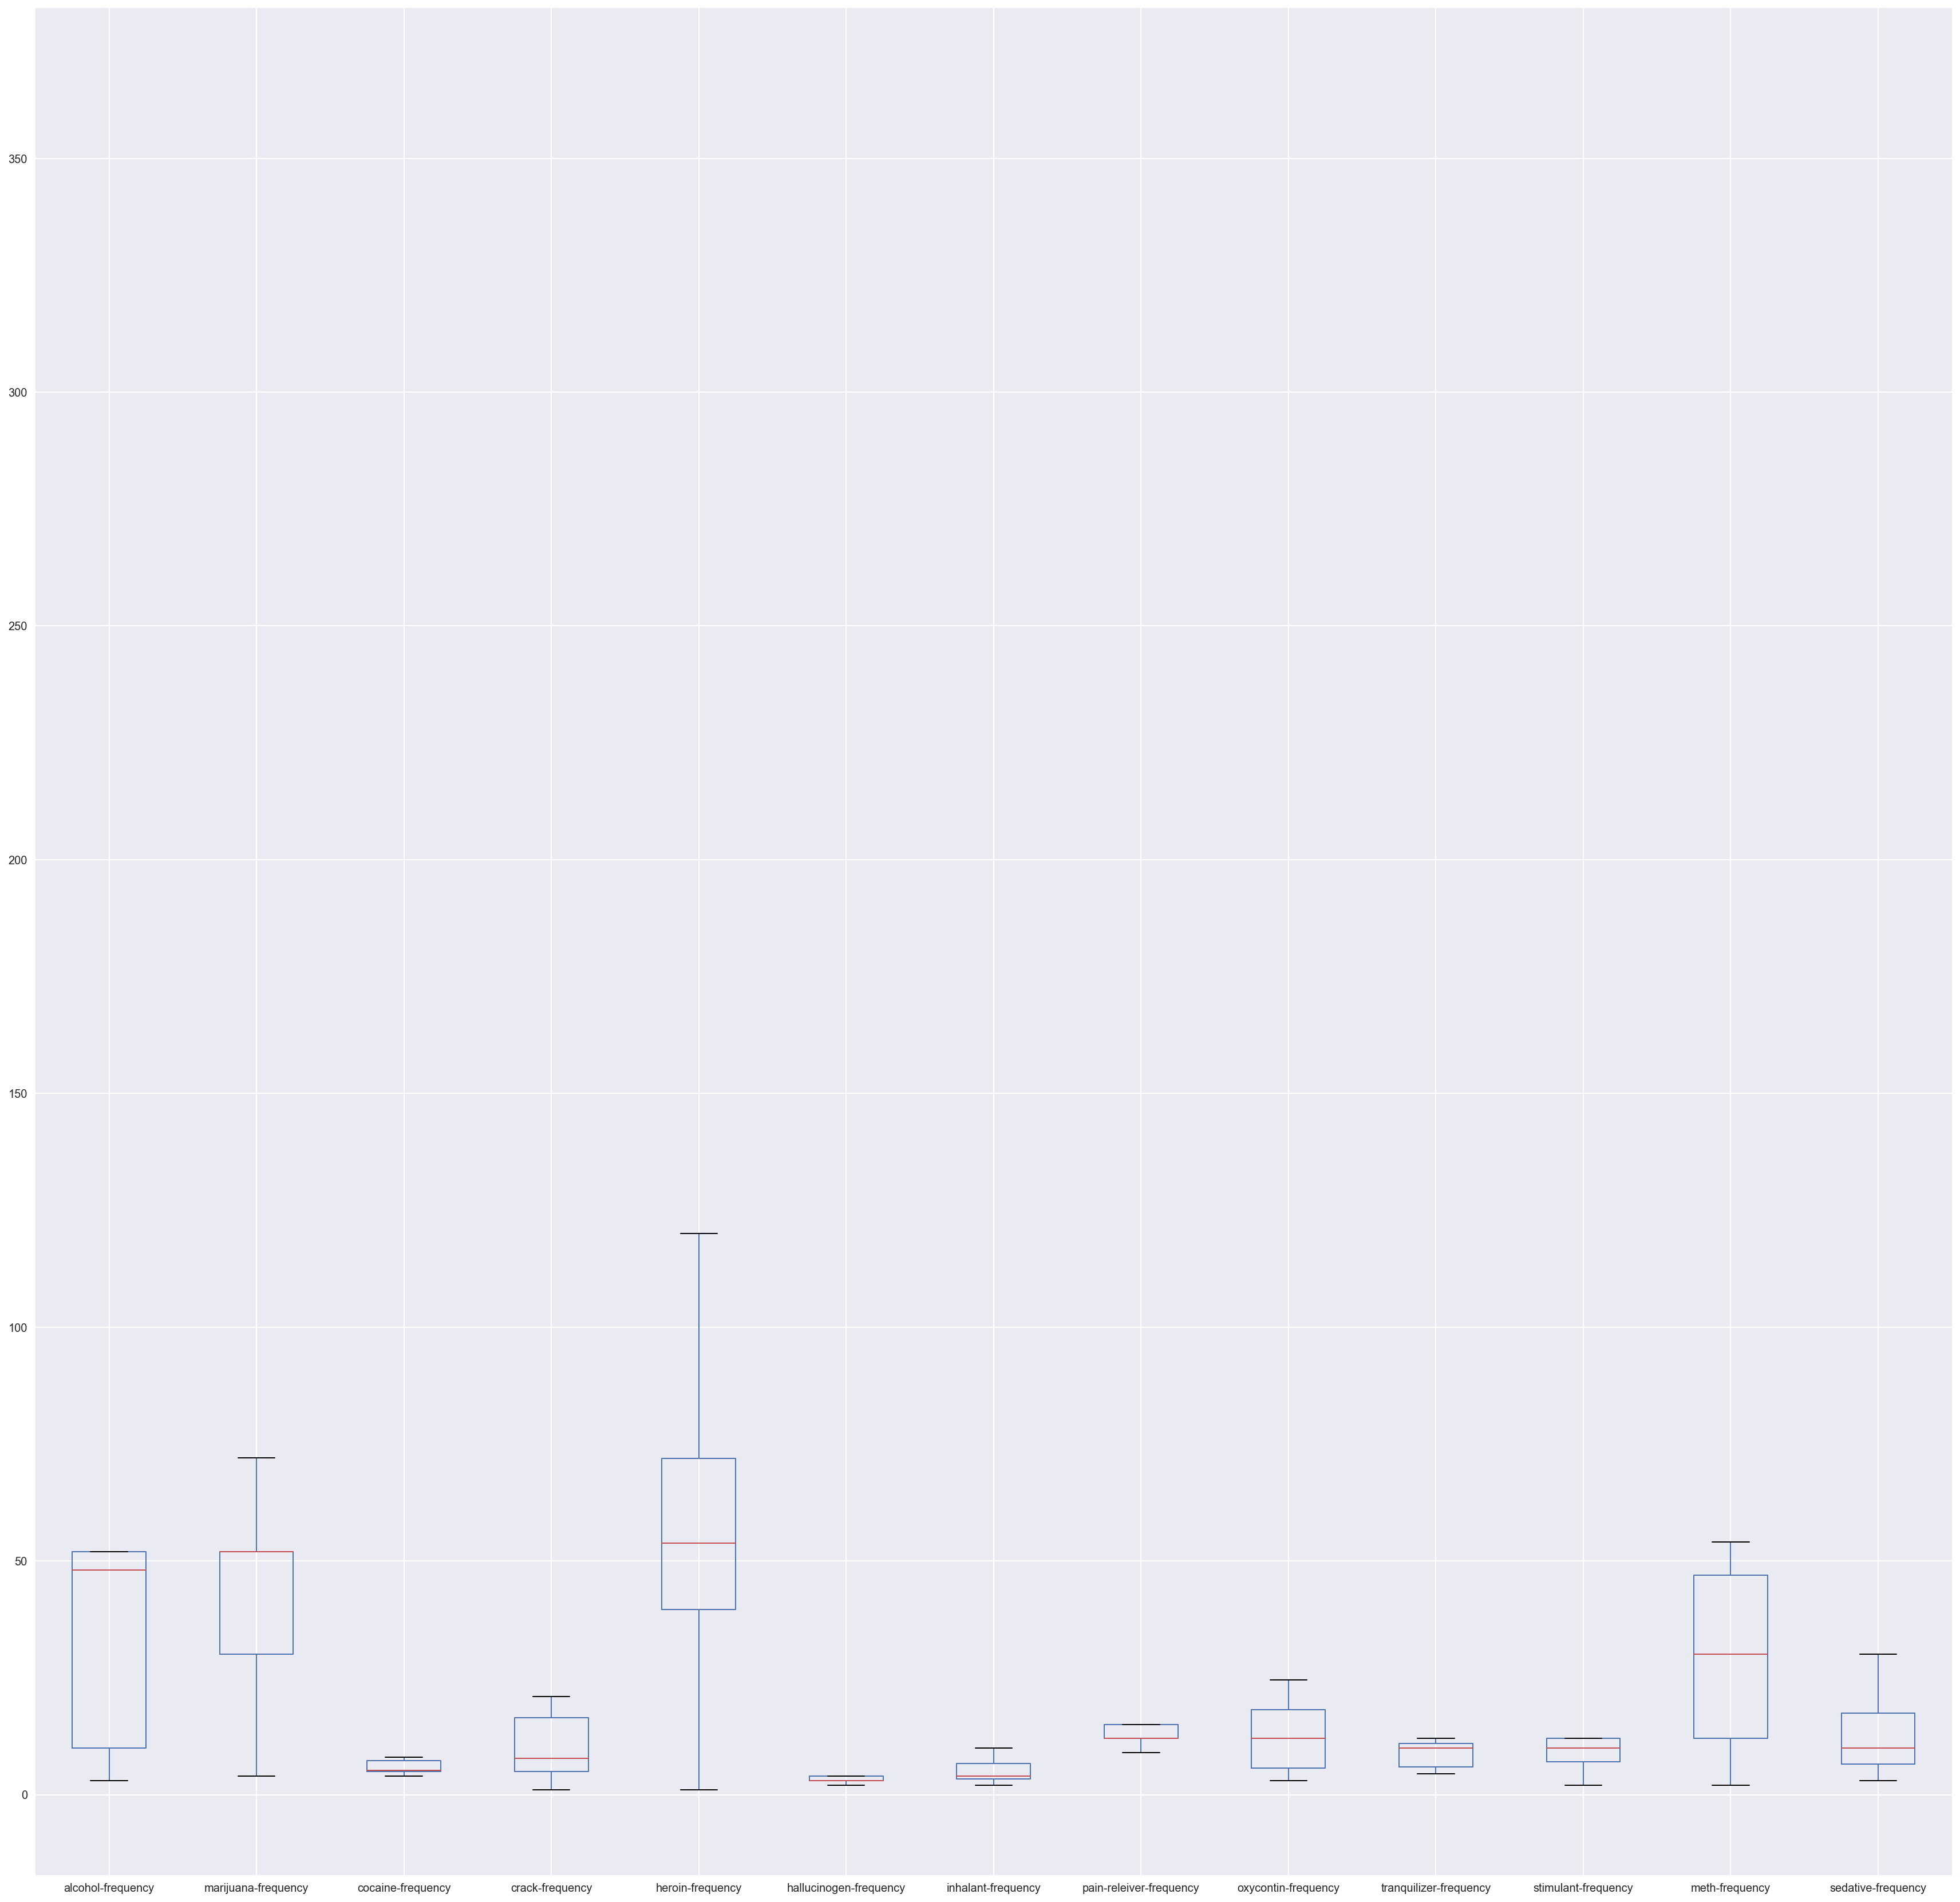

In [74]:
drugdf.boxplot(column=frequencies)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

# Answer

#### Question
1. Is marijuana a "gateway" drug linking to hard drug usage? Usage of marijuana is later followed by an increase in other hard drugs.
##### Deliverables
2. provide visualizations on increase in marijuana against increase in hard drugs.
   Provide statistical confidences and intervals

### Let's prune the dataframe 

In [75]:

marijuana = ['marijuana-use','age']
harddrugs = [ 'crack-use','cocaine-use','meth-use','heroin-use']
marijuana.extend(harddrugs)
marijuanadf = drugdf[marijuana]

In [76]:
marijuanadf.head()

marijuana-use  age  crack-use  cocaine-use  meth-use  heroin-use
0            1.1   12        0.0          0.1       0.0         0.1
1            3.4   13        0.0          0.1       0.1         0.0
2            8.7   14        0.0          0.1       0.1         0.1
3           14.5   15        0.1          0.5       0.3         0.2
4           22.5   16        0.0          1.0       0.3         0.1

### We should normalize the values before placing it on the same graph

In [77]:
def normalize(column):
    mean = np.mean(column)
    std = np.std(column)
    newcolumn = []
    for data in column:
        newdata = (data - mean)/std
        newcolumn.append(newdata)
    return newcolumn

In [78]:
marijuana.remove('age')
for drugs in marijuana:
    marijuanadf[drugs] = normalize(marijuanadf[drugs])

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


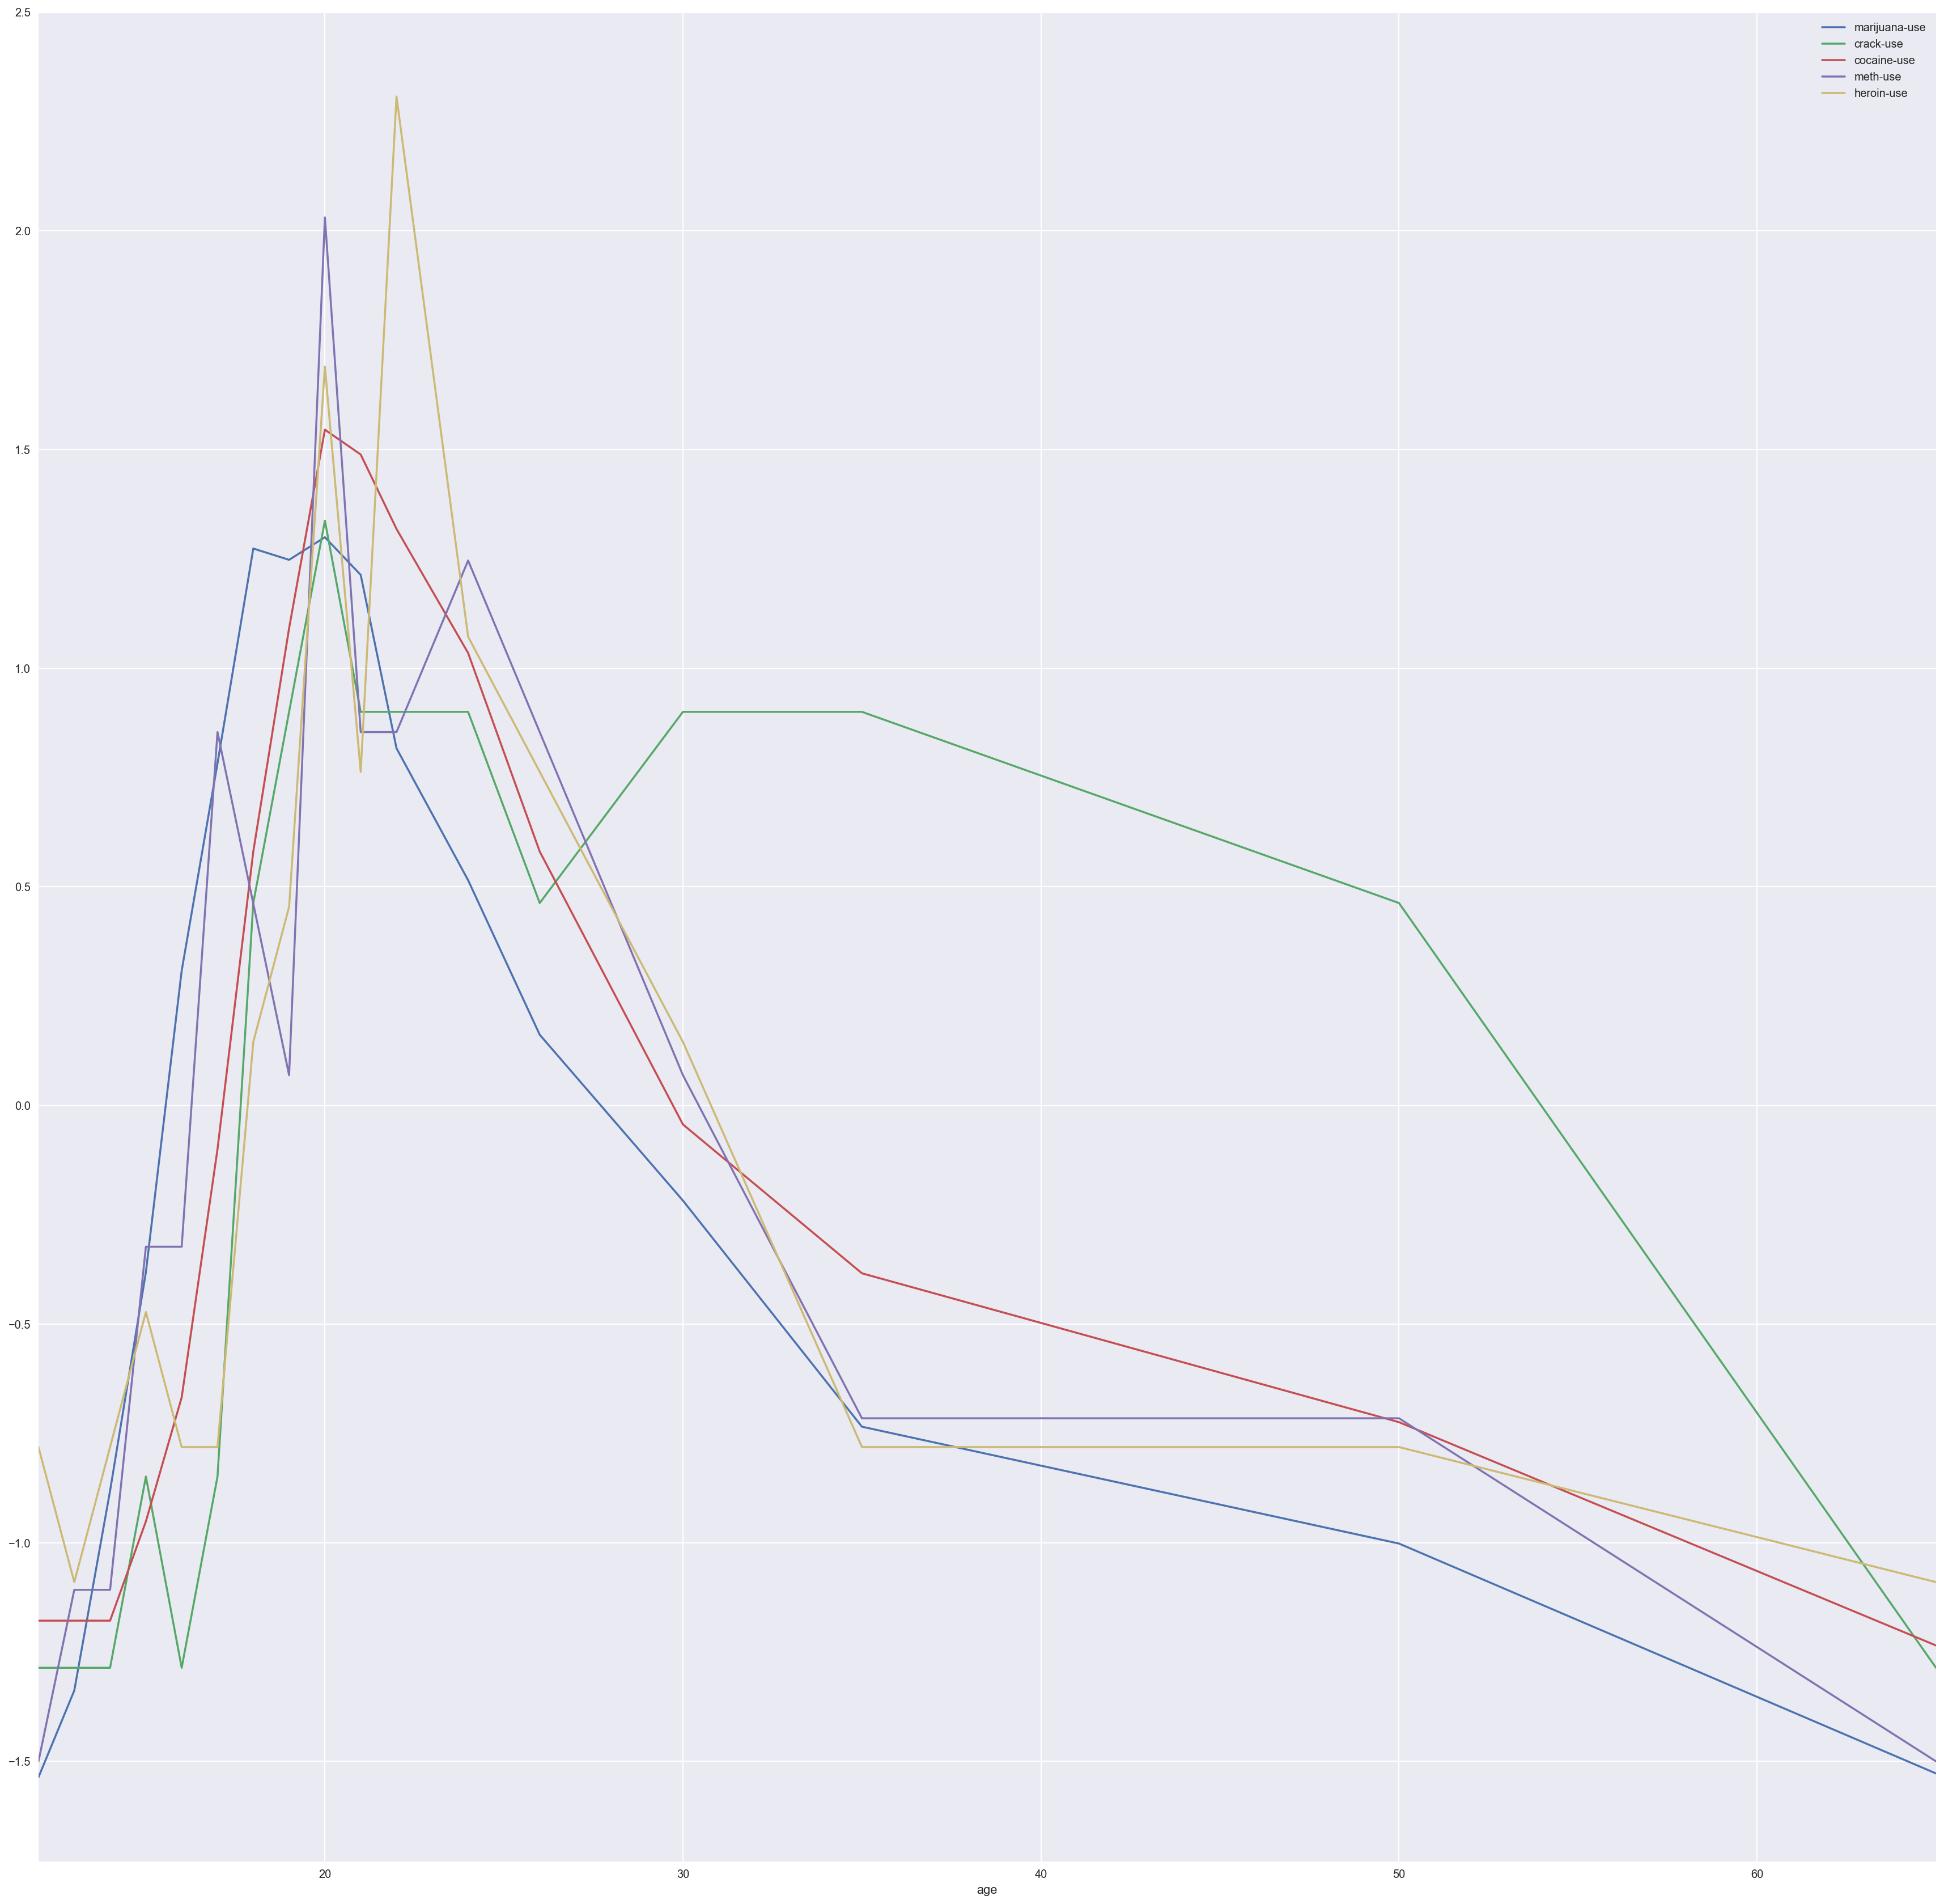

In [79]:
marijuanadf.plot.line(x='age')

### Since drug usage starts at an early age, we should study the age only till 30 years old to see how people adopt drugs as they grew up, noting whether marijuana leads in acceleration

In [80]:
marijuana.append('age')
young = marijuanadf.loc[marijuanadf['age']<=30 , marijuana]

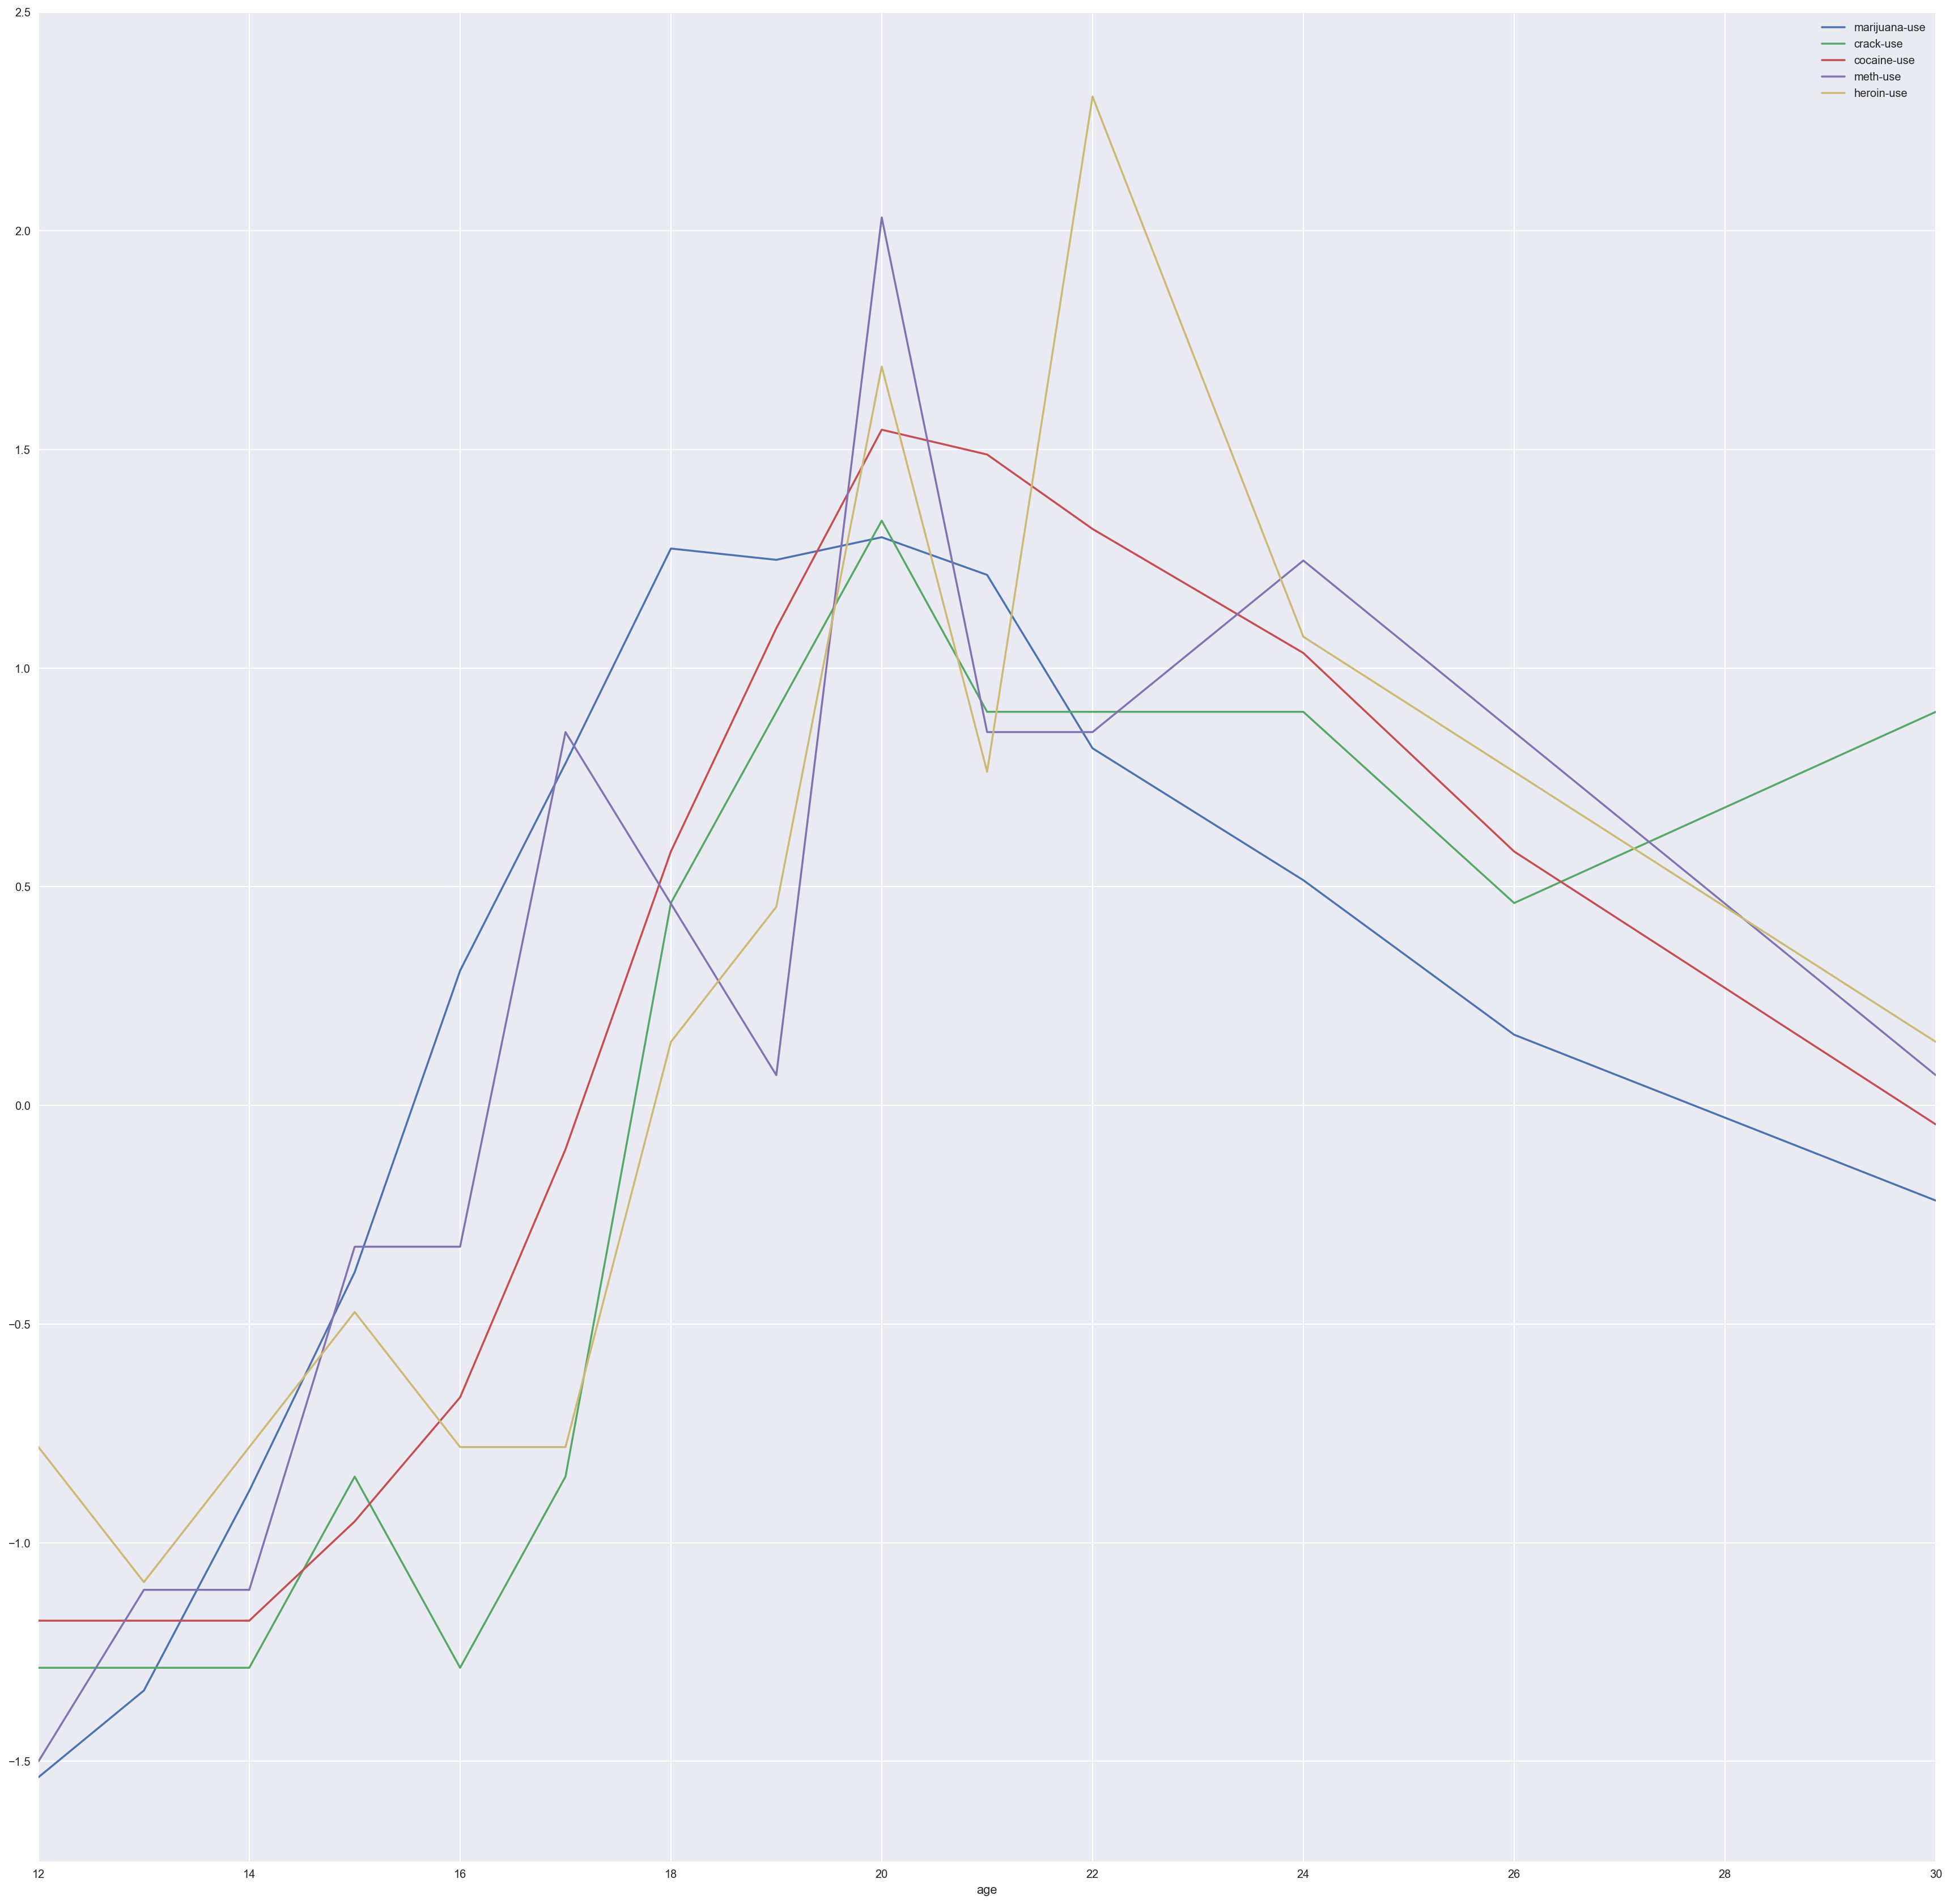

In [81]:
young.plot.line(x='age')

##### We observe that marijuana increases faster than the other drugs in the normalized graph. And when marijuana use decreases, the use of other drugs decreases after it.

### We should average total drug use ( instead of sum so that it can stay normed)

In [82]:
young['total'] = (young['crack-use']+young['cocaine-use']+young['meth-use']+young['heroin-use'])/4

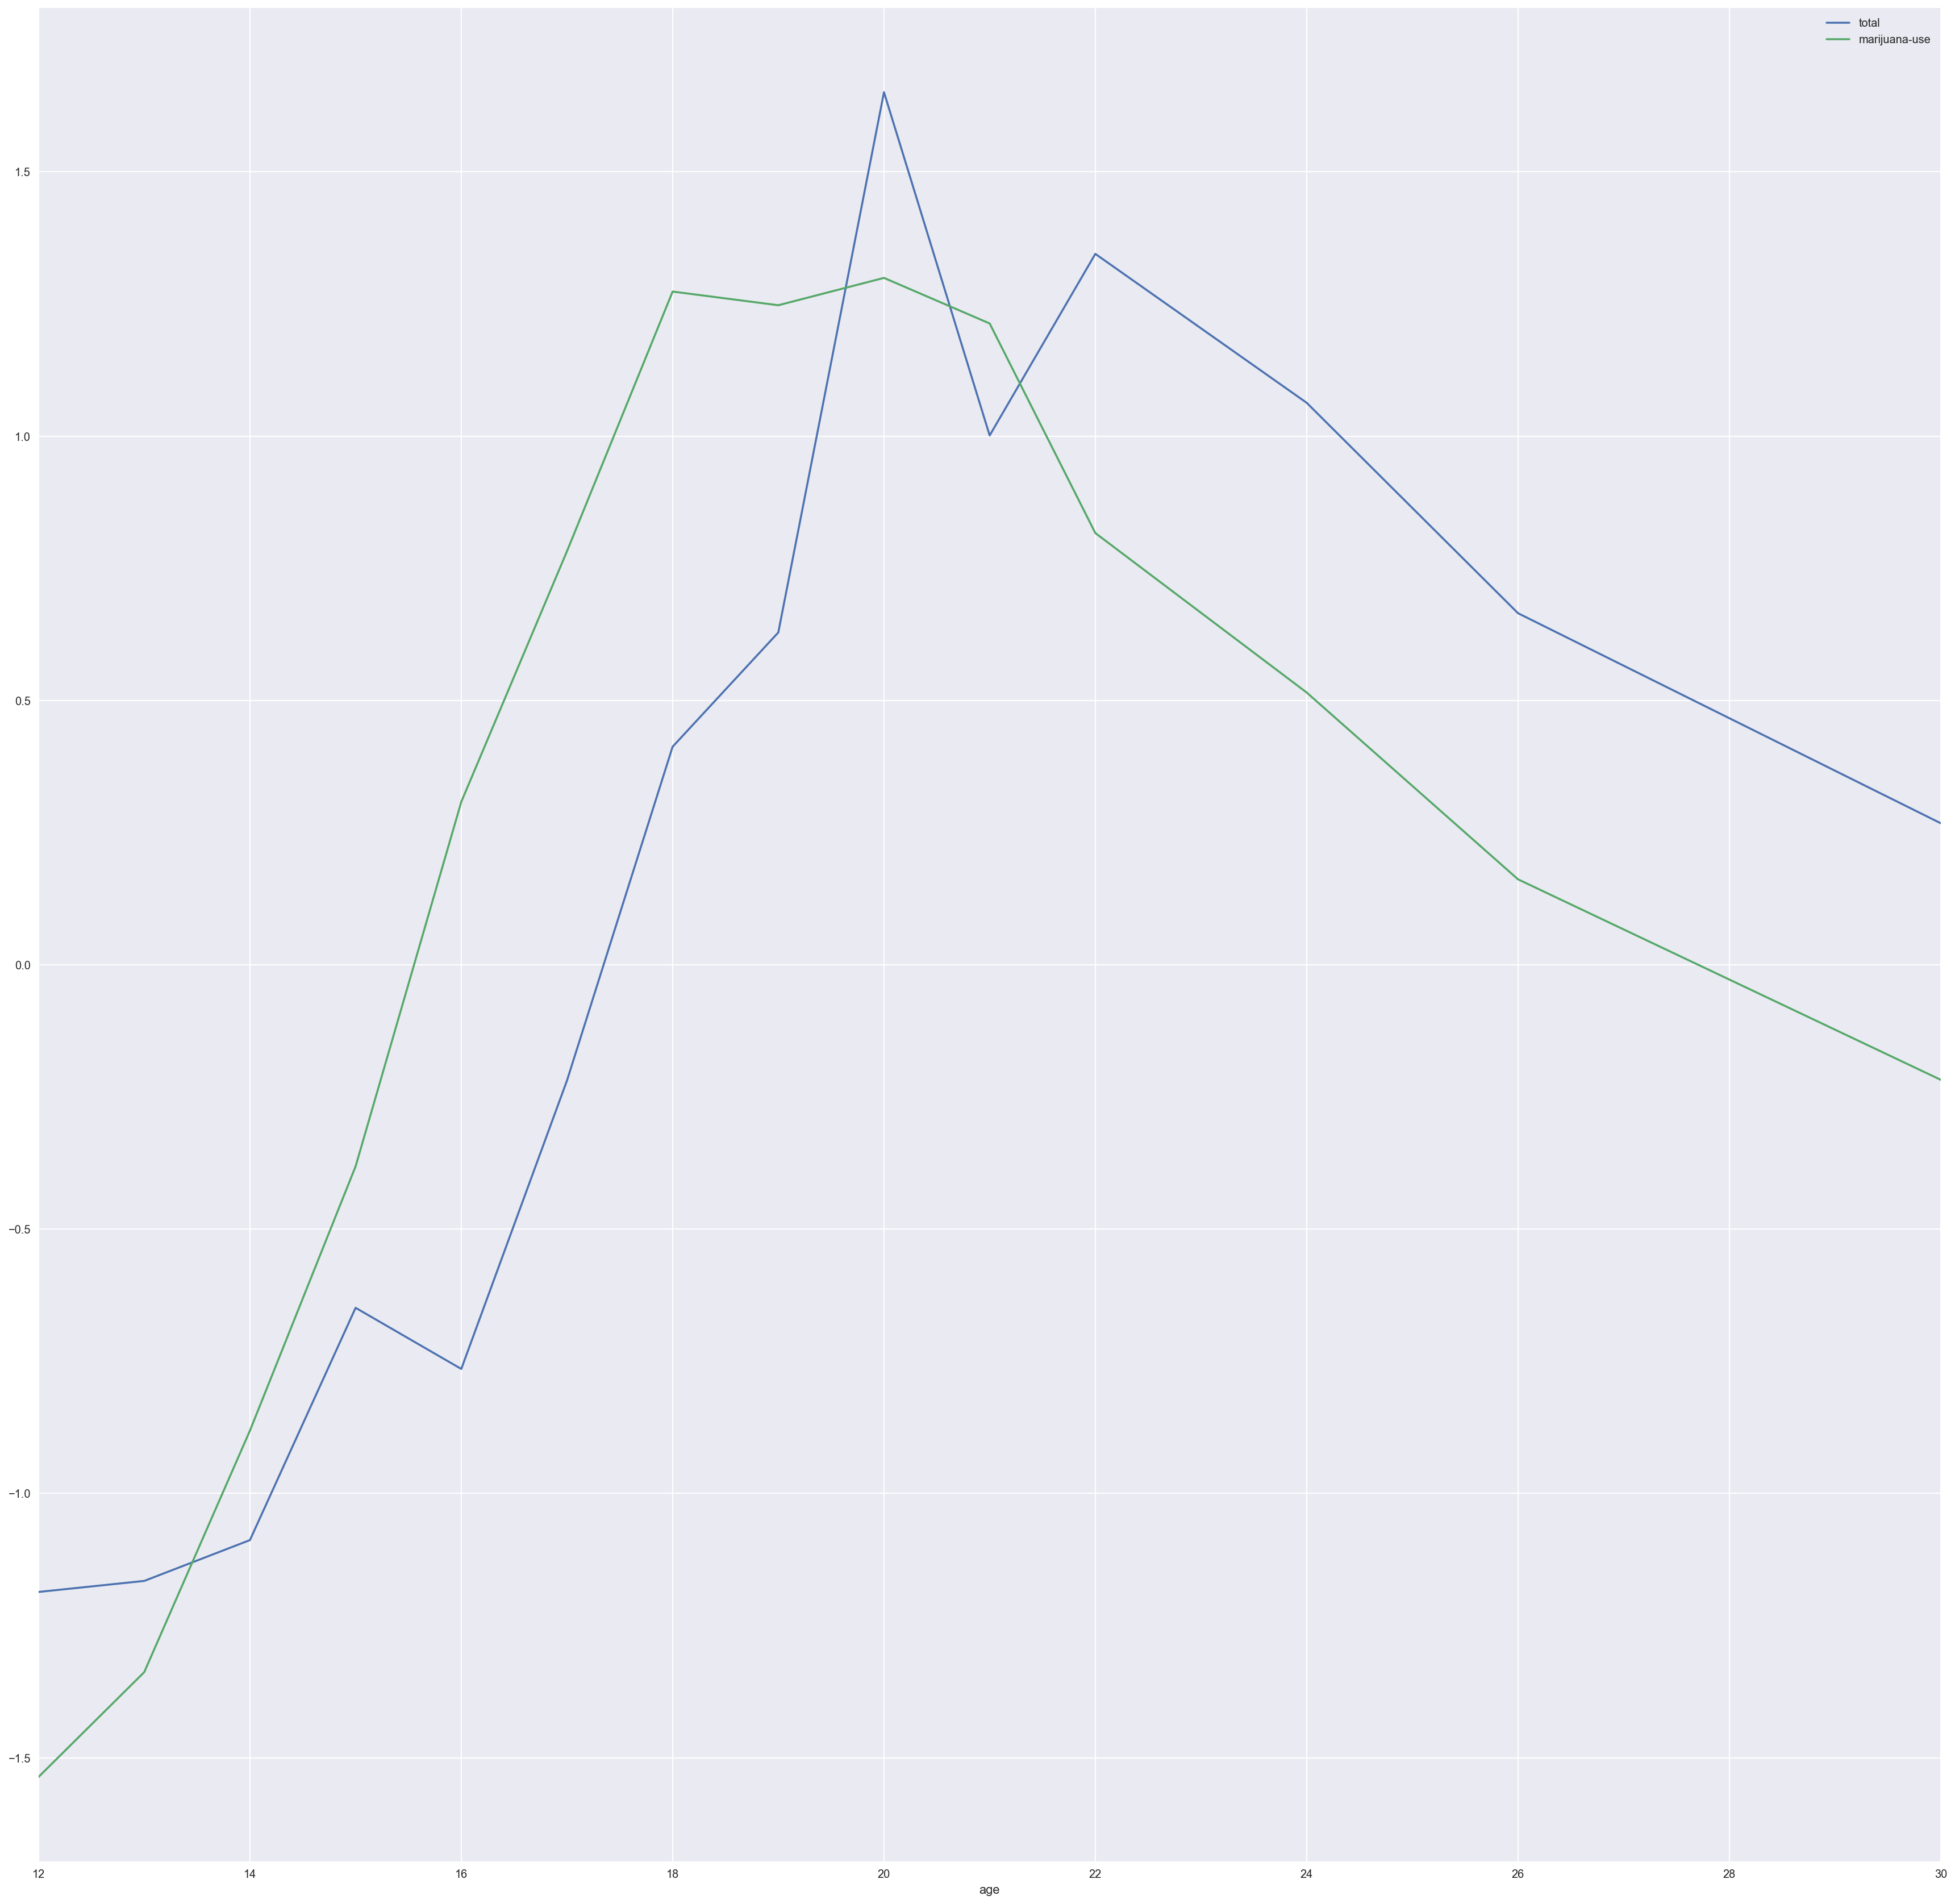

In [83]:
young.plot.line(x='age',y=['total','marijuana-use'])

### Linear Regression

('slope =', 0.80876113126674598, 'total drug use')
('intercept =', 0.11978768808576803, 'marijuana use')


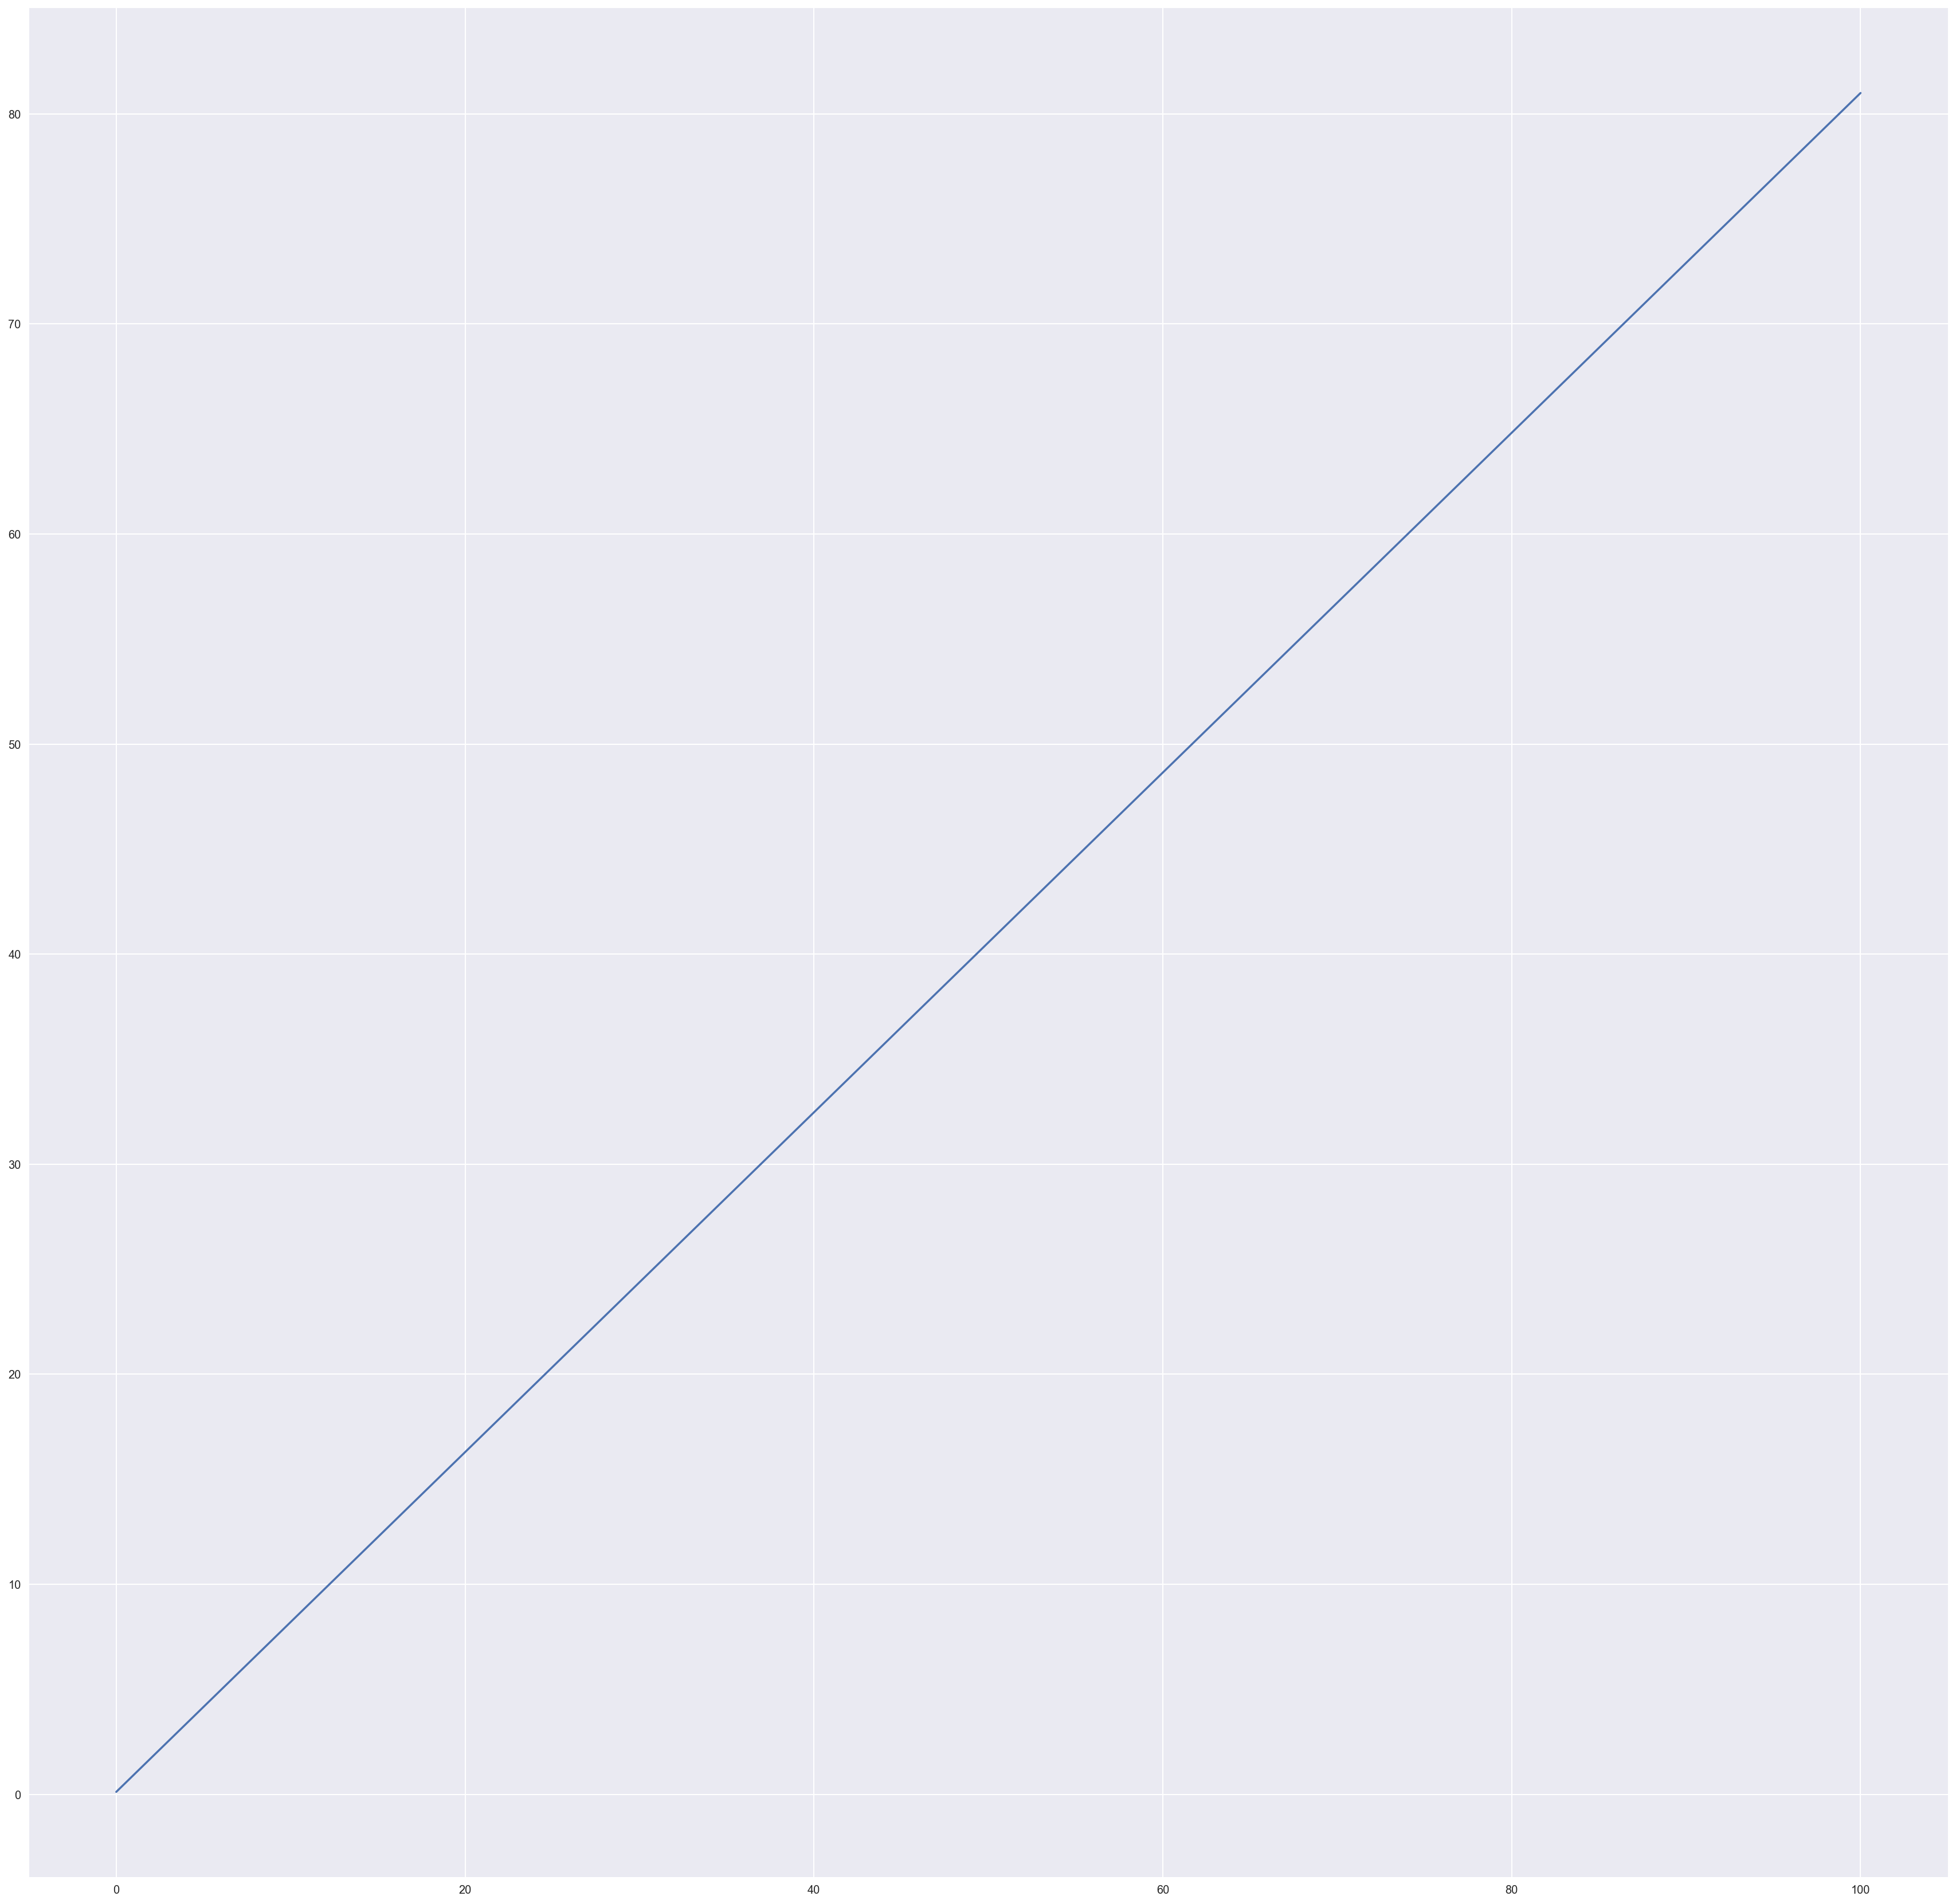

In [84]:
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(young['total'],young['marijuana-use'], deg =1 )

# Print the results to the screen
print('slope =', a, 'total drug use')
print('intercept =', b, 'marijuana use')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

### ECDF Function

In [85]:
def ecdf( data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

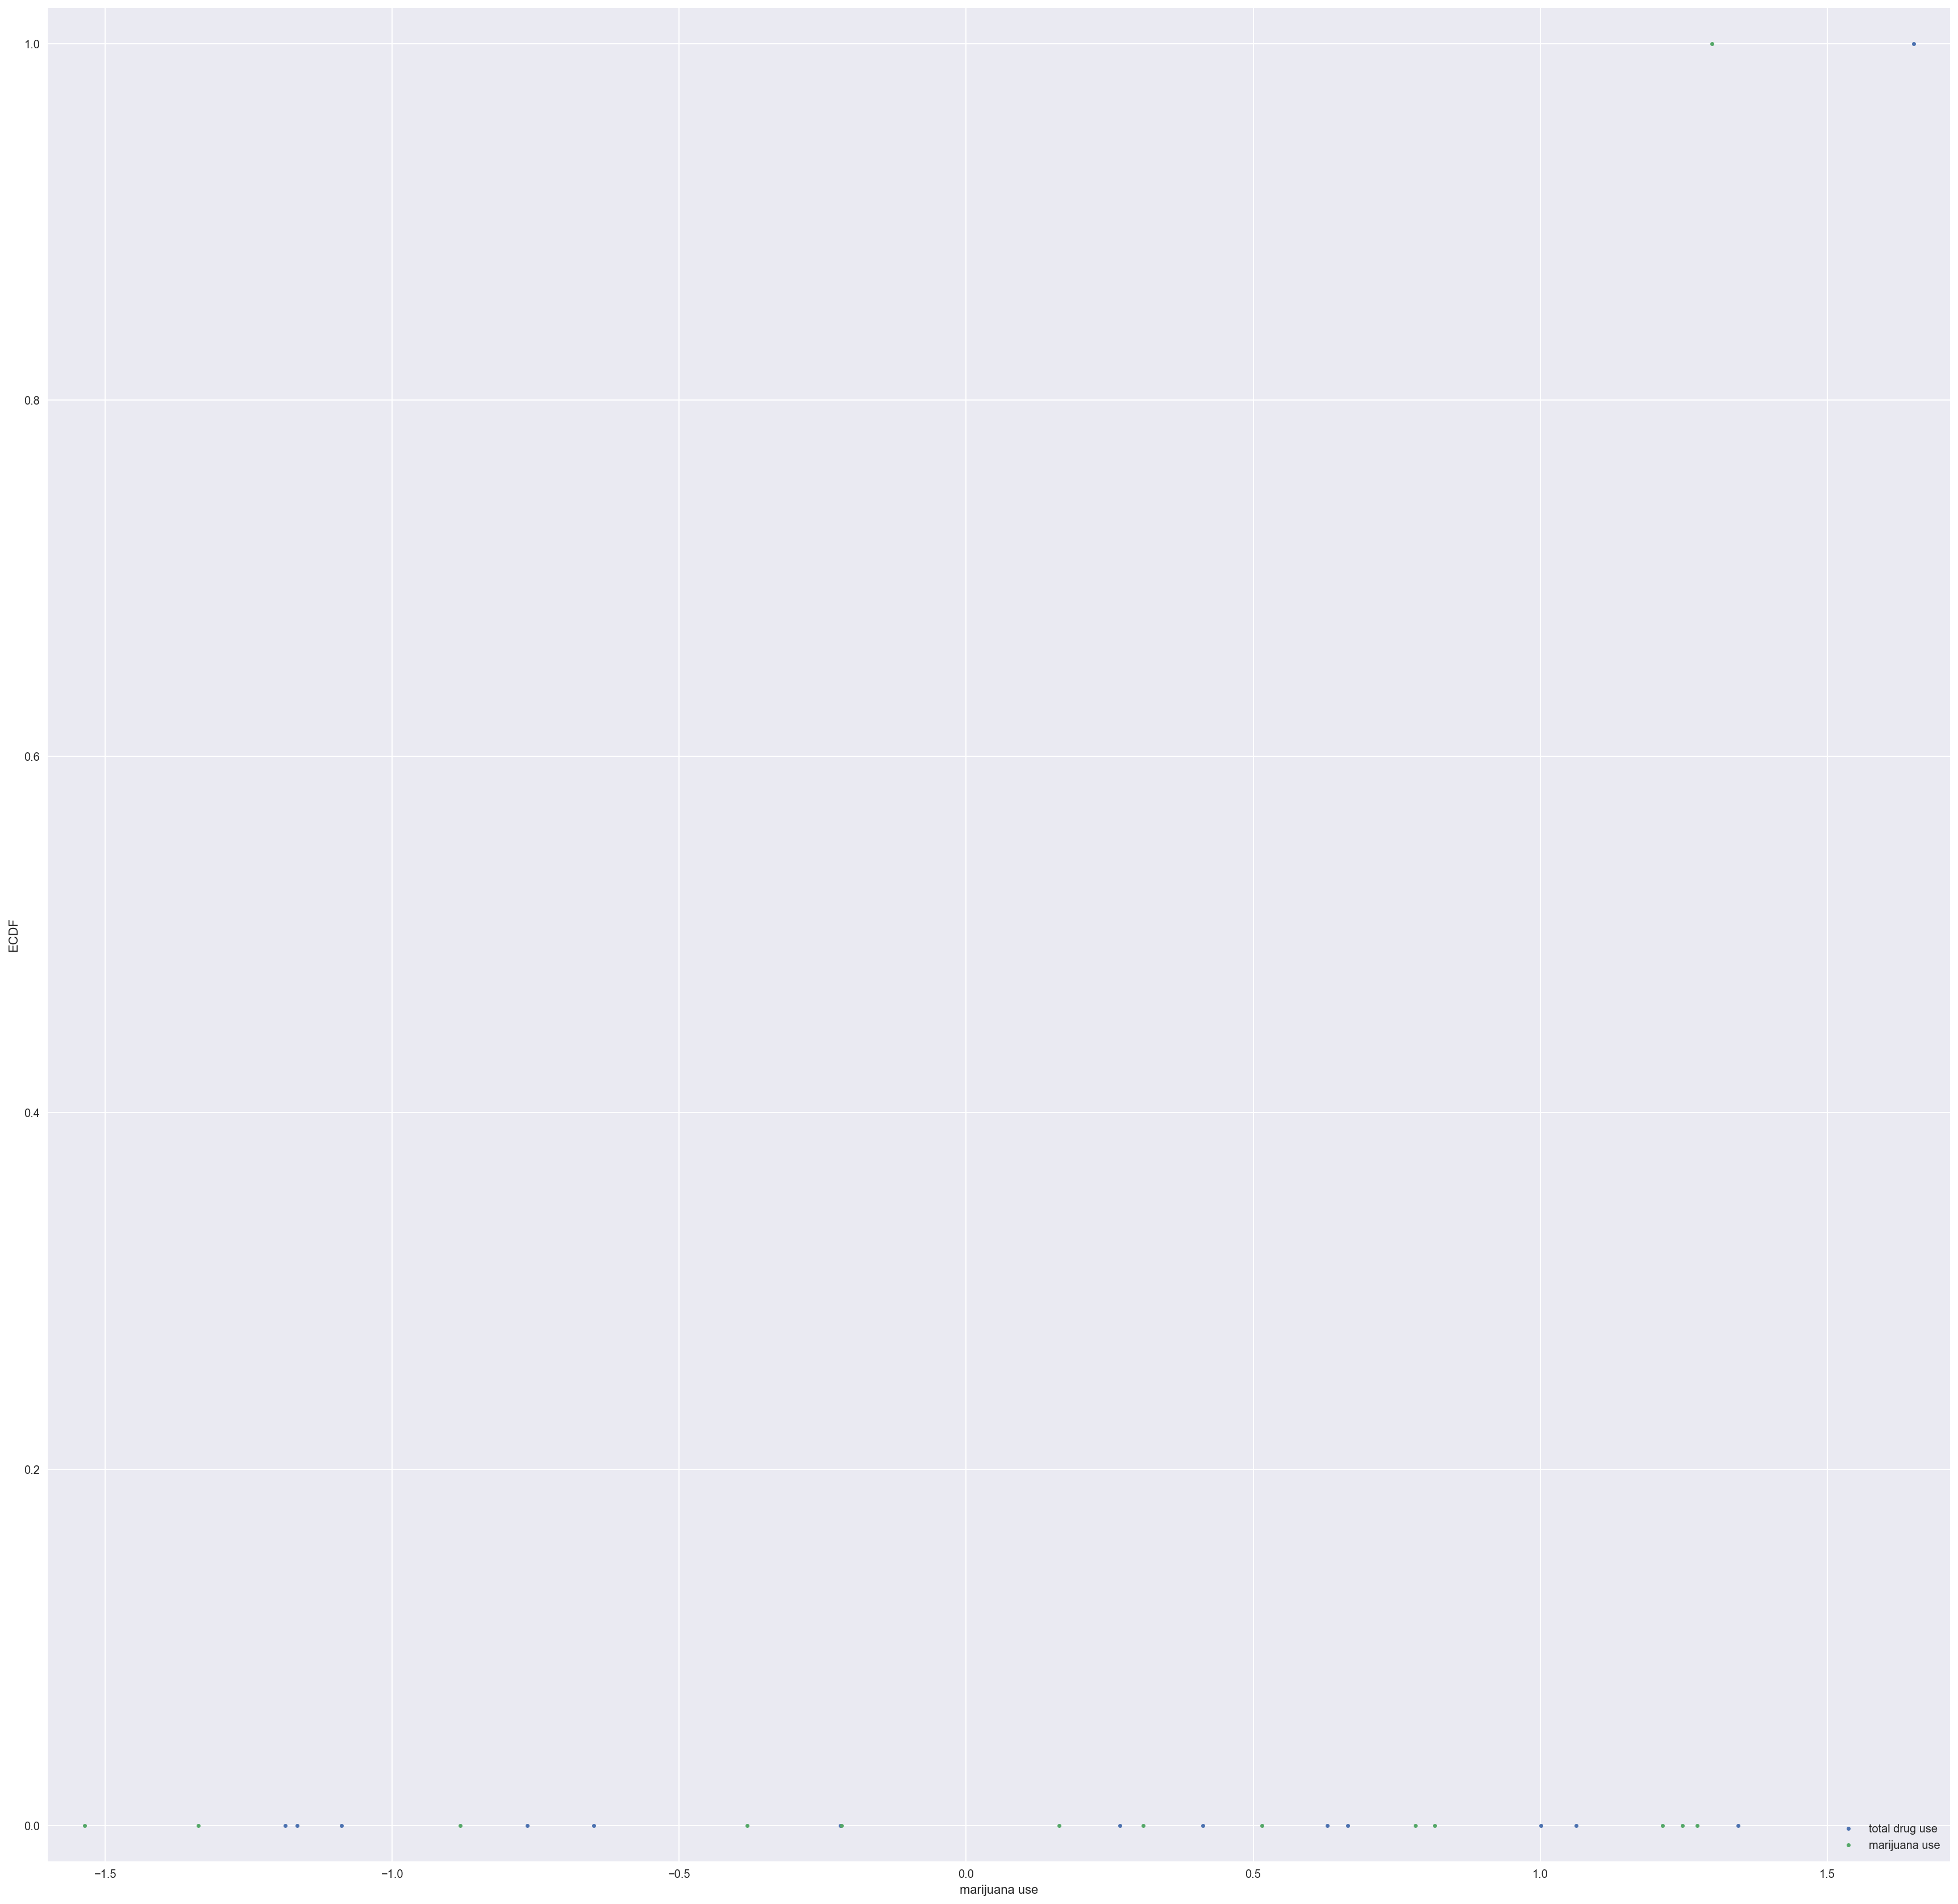

In [86]:
x_total, y_total = ecdf(young['total'])
x_marijuana, y_marijuana = ecdf(young['marijuana-use'])

# Plot the ECDFs
plt.plot(x_total, y_total, marker='.', linestyle='none')
plt.plot(x_marijuana, y_marijuana , marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('total drug use', 'marijuana use'), loc='lower right')

# Label axes and show plot
plt.xlabel('marijuana use')
plt.ylabel('ECDF')
plt.show()

### Apparently ECDF didnt work because we didn't have all the samples,
        Tried to do bootstrapping but I realized it made no logical sense because these are time-based and I only have 1 row per age

In [87]:
young.cov()

marijuana-use  crack-use  cocaine-use  meth-use  heroin-use  \
marijuana-use       0.950954   0.748473     0.891109  0.813926    0.650582   
crack-use           0.748473   1.101667     1.024087  0.835846    0.957015   
cocaine-use         0.891109   1.024087     1.108556  0.921828    0.972585   
meth-use            0.813926   0.835846     0.921828  1.008722    0.813446   
heroin-use          0.650582   0.957015     0.972585  0.813446    1.083763   
age                 2.169737   4.239810     3.361804  3.218026    3.370043   
total               0.776023   0.979654     1.006764  0.894960    0.956702   

                     age     total  
marijuana-use   2.169737  0.776023  
crack-use       4.239810  0.979654  
cocaine-use     3.361804  1.006764  
meth-use        3.218026  0.894960  
heroin-use      3.370043  0.956702  
age            26.840659  3.547421  
total           3.547421  0.959520

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

# Answer

# Rate

In [88]:
satdf['Rate']
satdf['Rate'] = pd.to_numeric(satdf['Rate'])

### Outliers are values which deviate too far away from the others unproportionately by a certain specified deviation, numericaly this would be about 1.5 standard deviations away from the mean.

### We print a swarmplot so that we can see individual values depicted as 1 point each

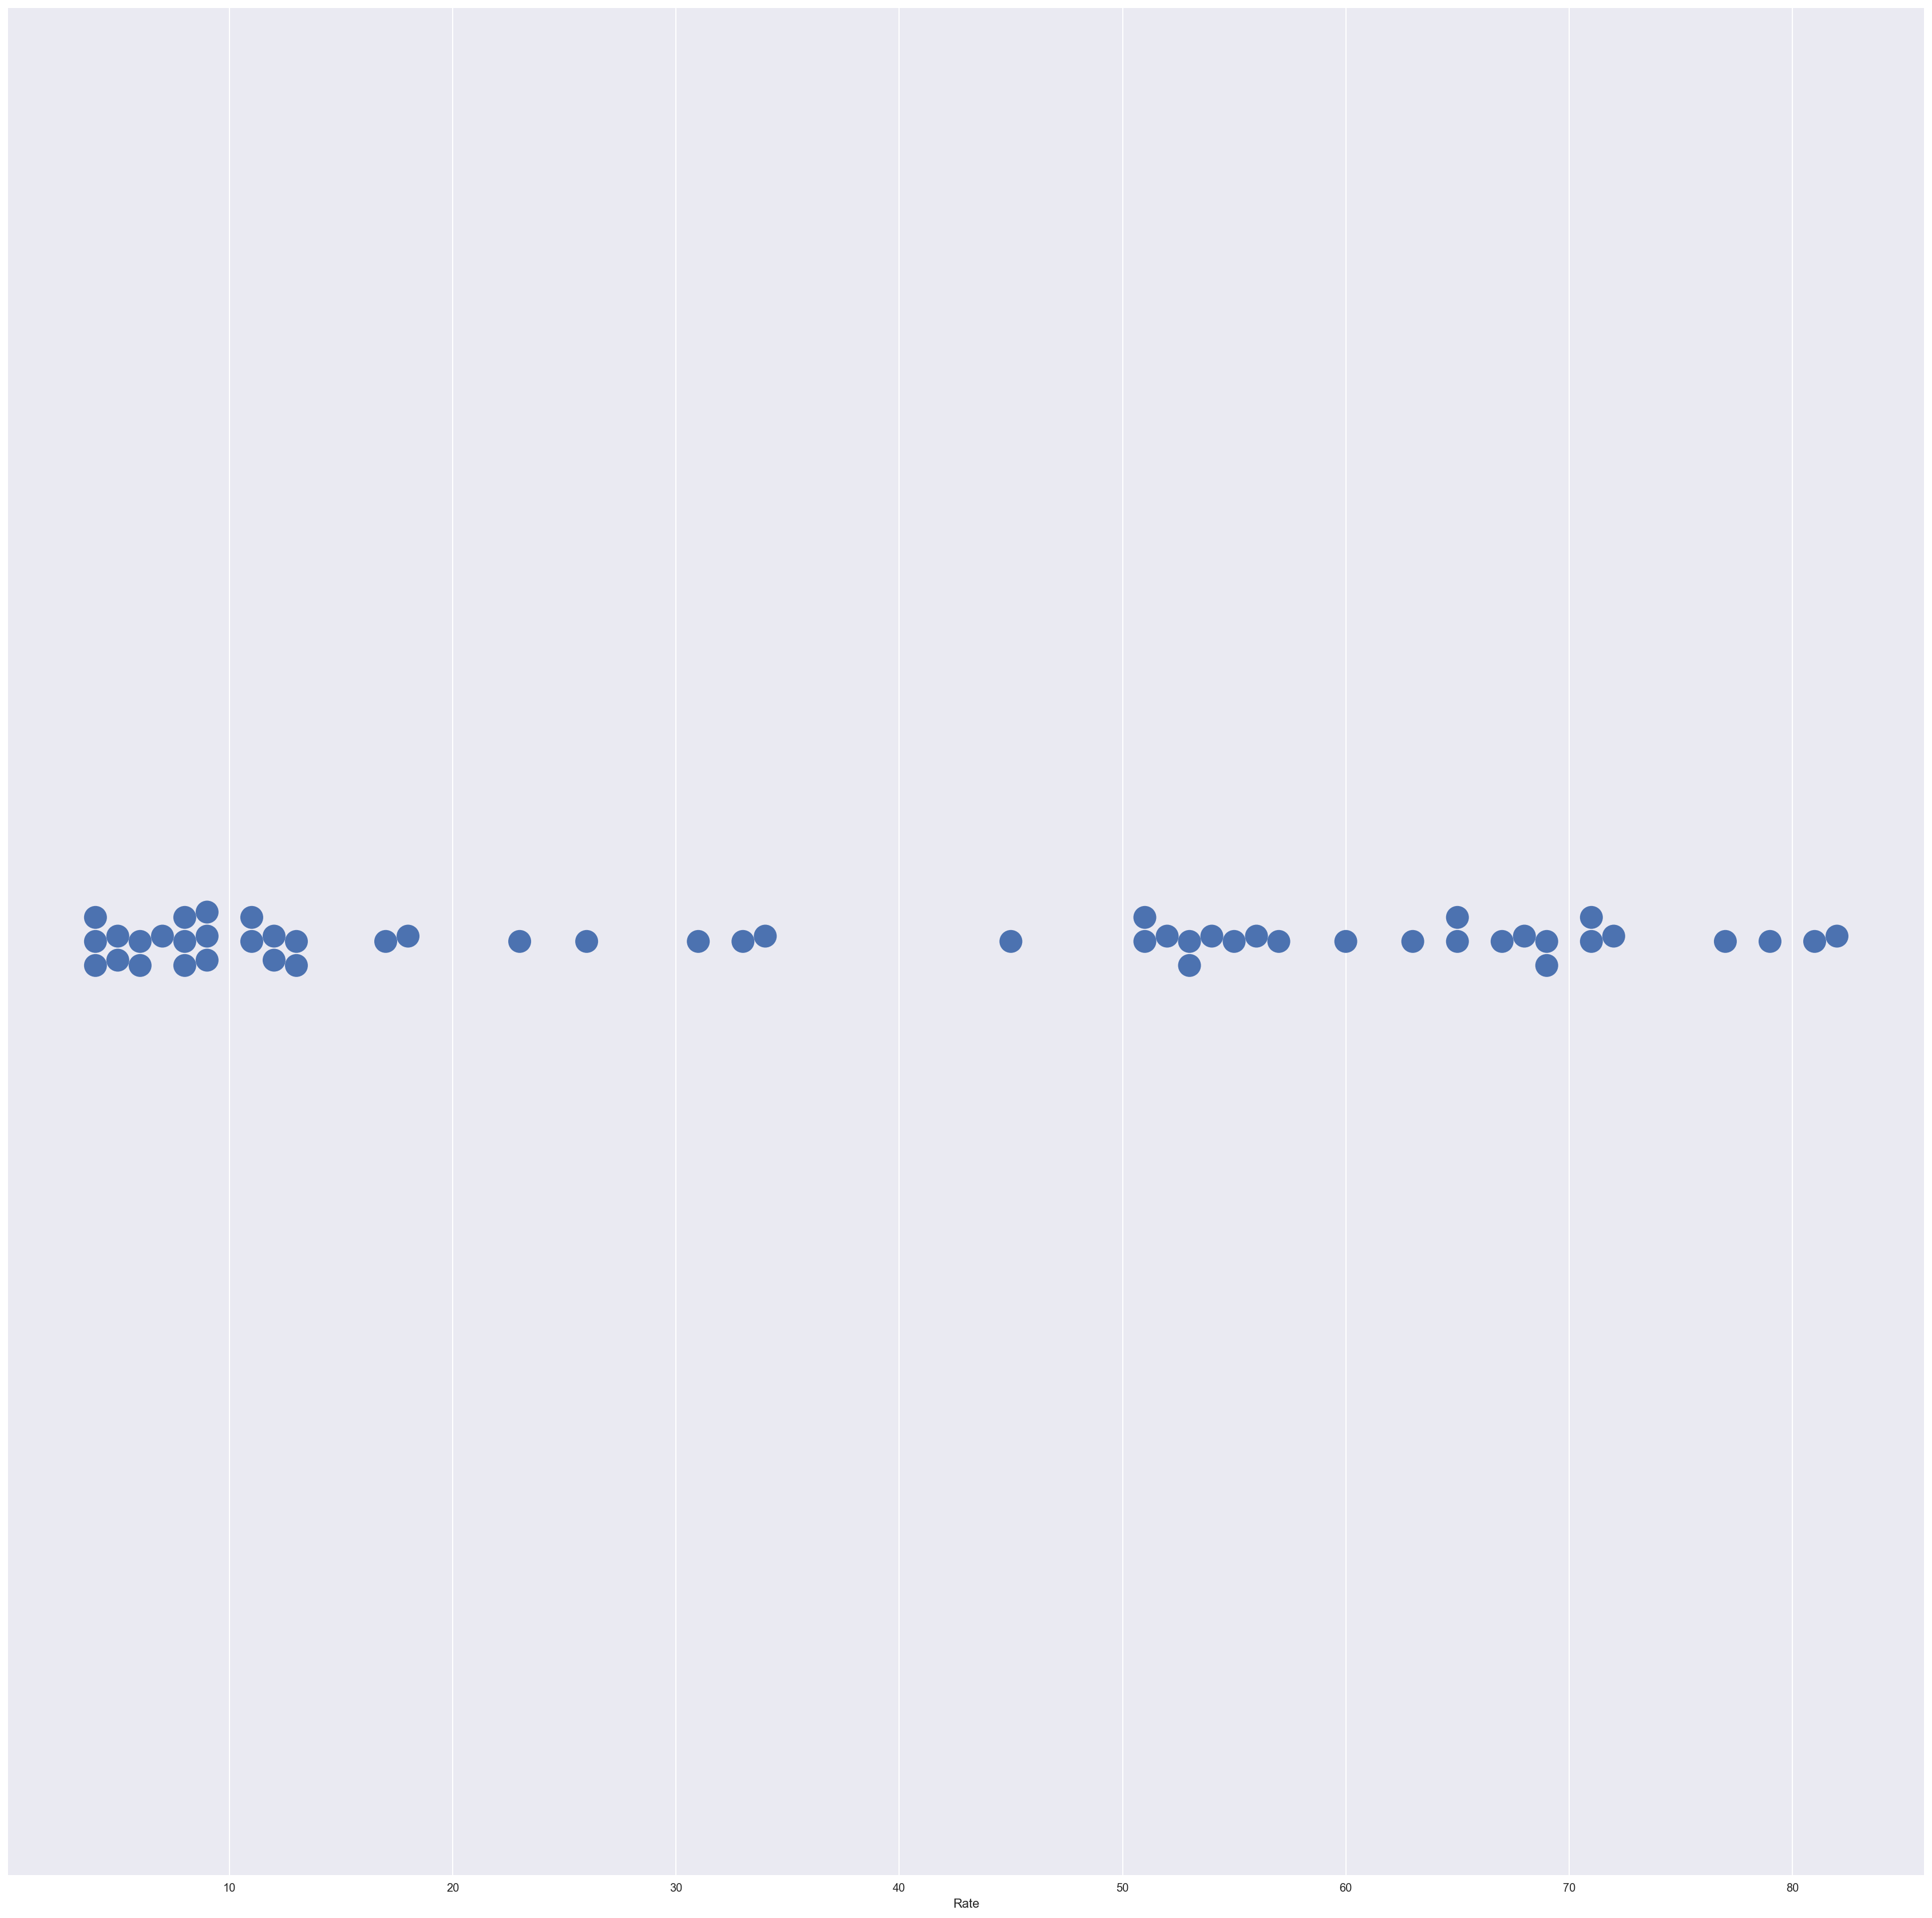

In [89]:
sns.swarmplot(satdf['Rate'].sort_values(ascending=True),size=20)

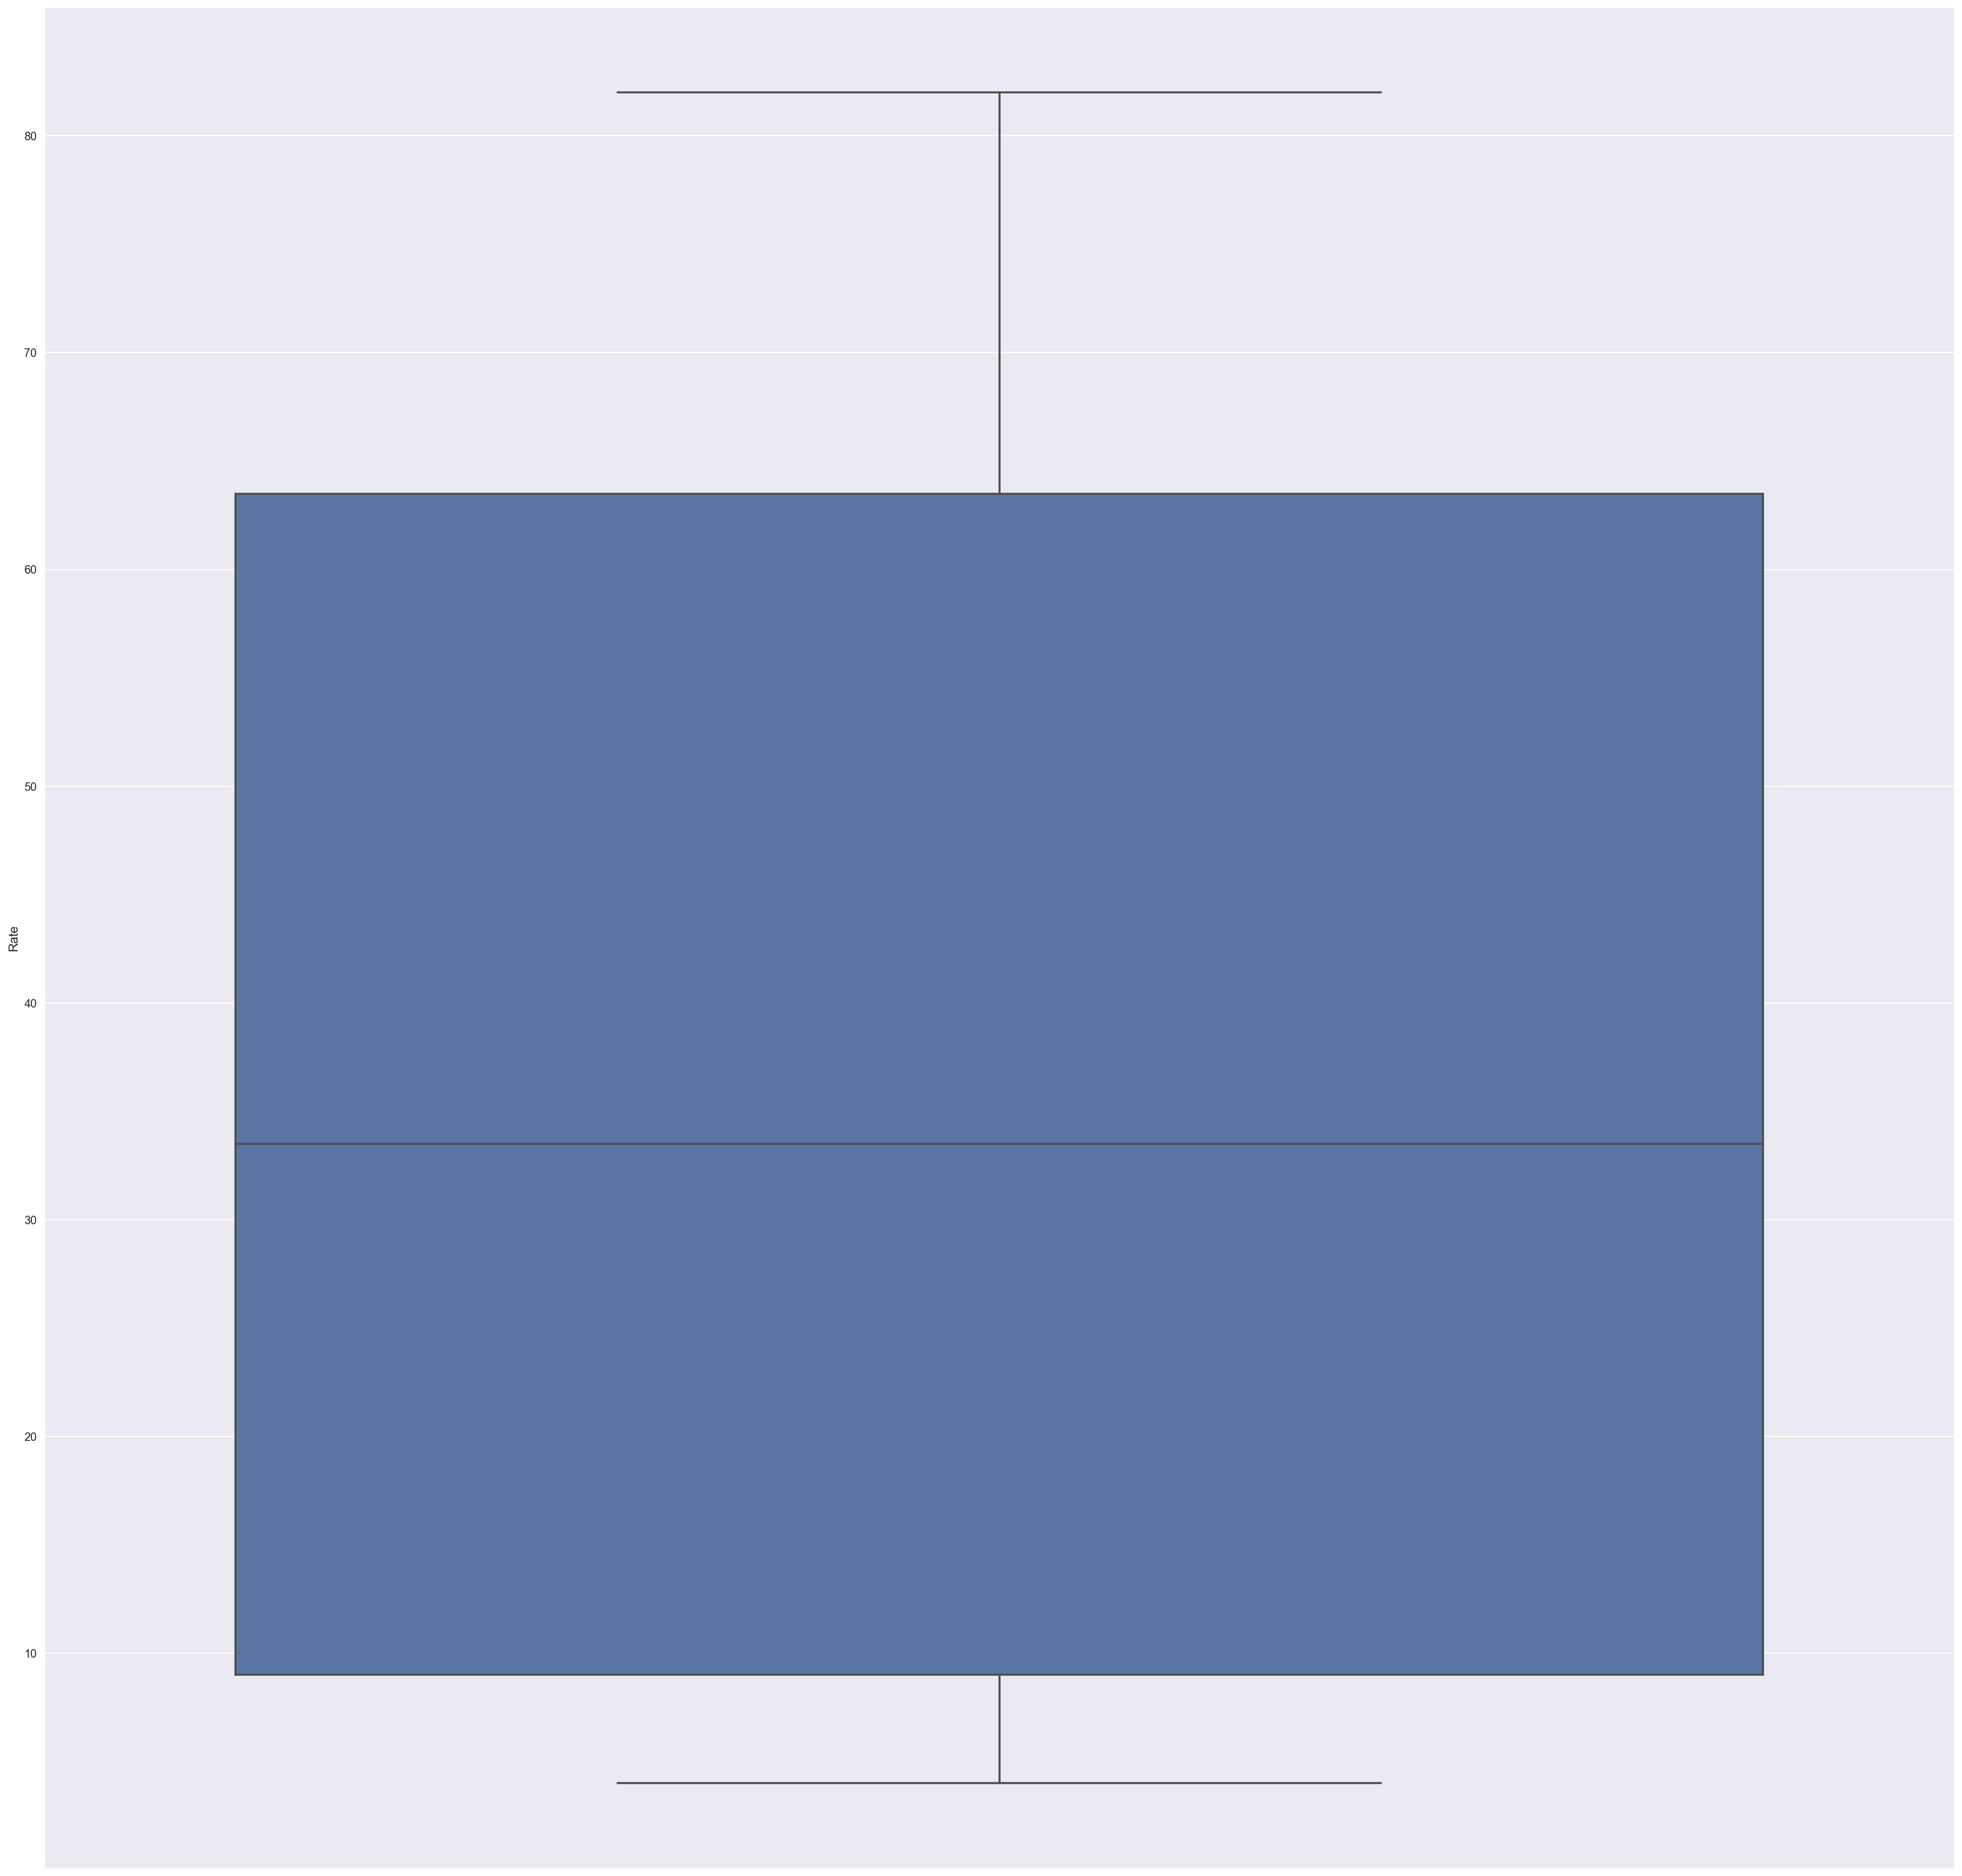

In [90]:
sns.boxplot(y=satdf['Rate'])

### numerically retrieving outliers

In [91]:
ratemean = np.mean(satdf['Rate'])
ratemedian = np.median(satdf['Rate'])
ratestd = np.std(satdf['Rate'])

### If there's an outlier i'll get a 1
    crude mthod

In [92]:
print (satdf['Rate']>= ratemean + ratestd*1.5 ).sum()
print (satdf['Rate']<= ratemean - ratestd*1.5 ).sum()

3
0


### Try a upperbound and lowerbound of std 2, but we'll bootstrap the sample and take the min std
#### Instead of mean, we use median

In [93]:
def upperbound(data,std):
    median = np.median(data)
    
    return median + (std*2)

In [94]:
def lowerbound(data, std):
    median = np.median(data)
    
    return median - (std*2)

### Bootstrapping the sample

In [95]:
def bootstrap(data):
    new =[]
    length = len(data)
    for i in range(length):
        randomchoice = np.random.randint(0,length)
        new.append(data[randomchoice])
    return new

#### Many bootstraps to get possible outlier upper bound and lower bound

In [96]:
def manybootstraps(data,func,size):
    output =[]
    for i in range(size):
        output.append(func(bootstrap(data)))
    return output

### Get possible distribution for upper/lower bound of outliers

In [97]:
stdestimate= manybootstraps(satdf['Rate'],np.std,10000)

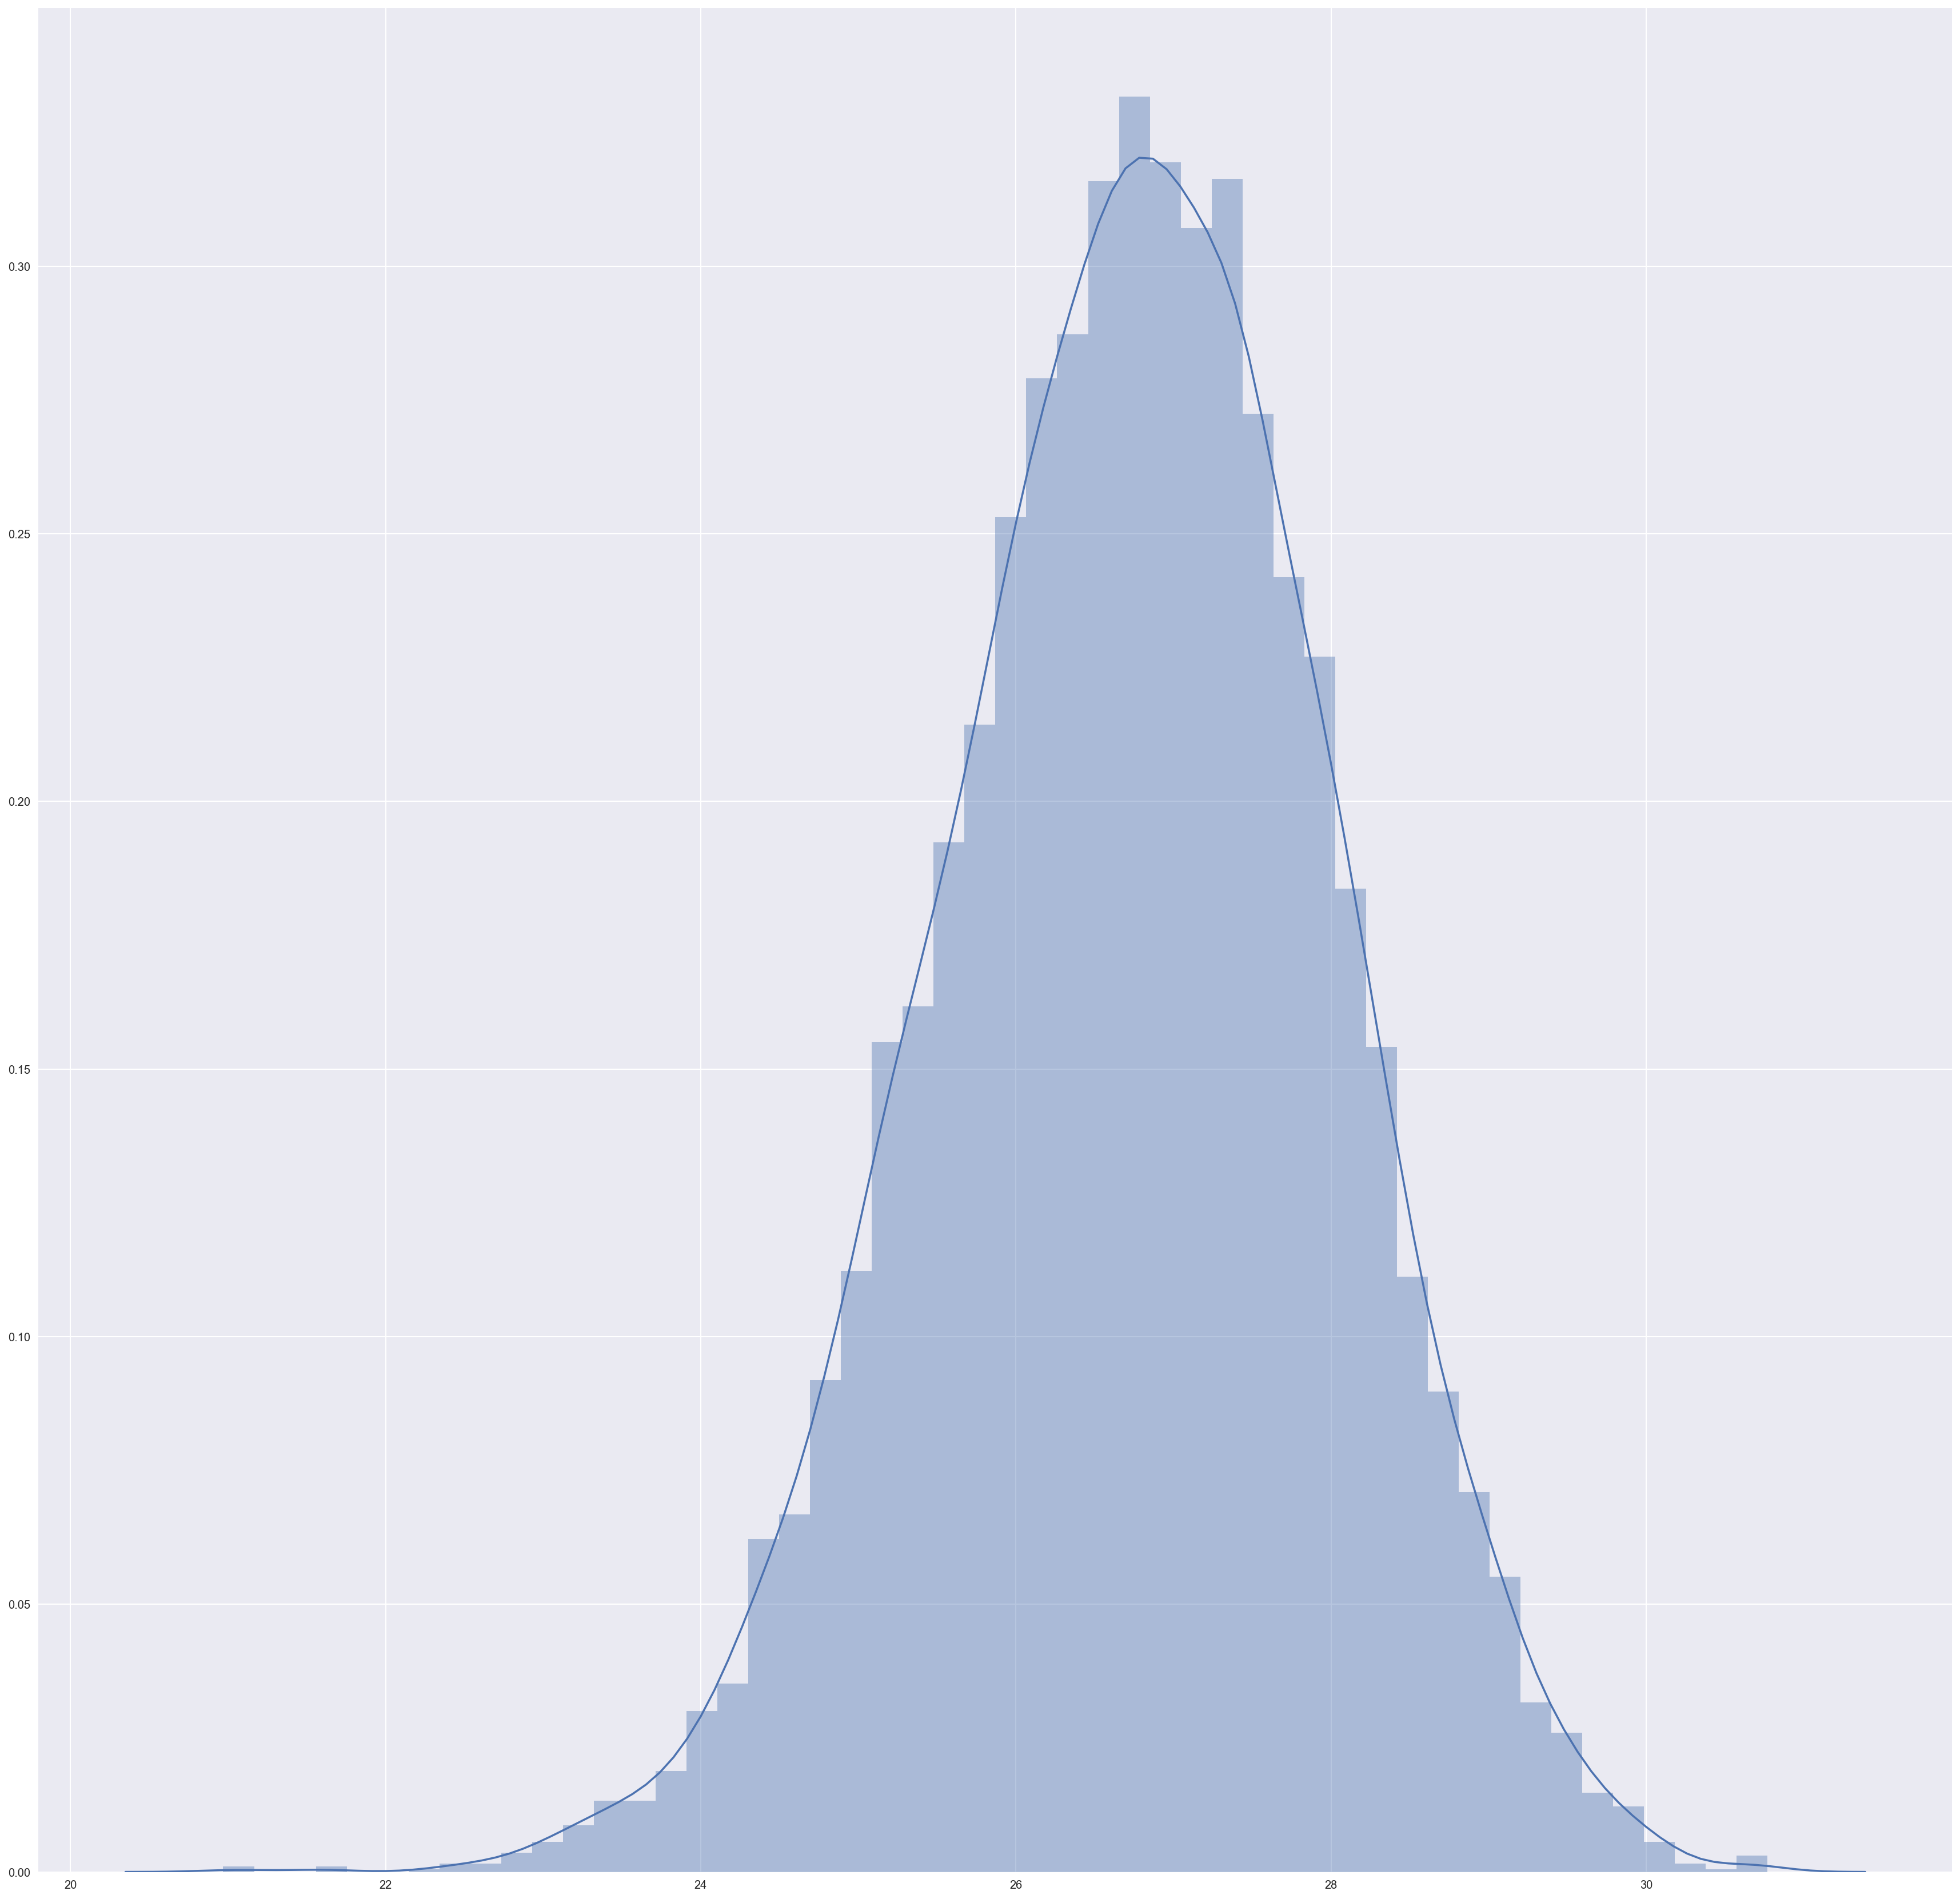

In [98]:
sns.distplot(stdestimate)

In [99]:
print np.min(stdestimate)
print ratestd

20.9696526285
27.0379964945


In [100]:
topoutlier=(satdf['Rate'] >= upperbound(satdf['Rate'],np.min(stdestimate)))
bottomoutlier = (satdf['Rate'] <= lowerbound(satdf['Rate'],np.min(stdestimate)))
print topoutlier.sum(),bottomoutlier.sum()

4 0


### Outliers

In [101]:
satdf['Rate'].loc[topoutlier]

0    82
1    81
2    79
3    77
Name: Rate, dtype: int64

In [102]:
cleaned = satdf['Rate'].drop(topoutlier)

In [103]:
ratemean = np.mean(satdf['Rate'])
ratemedian = np.median(satdf['Rate'])
ratestd = np.std(satdf['Rate'])

newratemean = np.mean(cleaned)
newratemedian = np.median(cleaned)
newratestd = np.std(cleaned)

print "With Outliers", '\n', ratemean, ratemedian,ratestd
print "Without Outliers", '\n', newratemean, newratemedian,newratestd

With Outliers 
37.1538461538 33.5 27.0379964945
Without Outliers 
35.38 32.0 26.0475641855


### Lowers mean, lower median and lower standard deviation.
    Datapoints are tighter, median and mean are lower because the outliers are from the top extreme values

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


# Answer

In [104]:
satdf['Math']=pd.to_numeric(satdf['Math'])
satdf['Verbal']=pd.to_numeric(satdf['Verbal'])

In [105]:
scipy.stats.spearmanr(satdf['Verbal'],satdf['Math'])

SpearmanrResult(correlation=0.90520488479402839, pvalue=3.2352319597775181e-20)

In [106]:
scipy.stats.pearsonr(satdf['Verbal'],satdf['Math'])

(0.899870852544429, 1.1920026733067679e-19)

### Spearman correlation does not assume that the data is normally distributed unlike the pearson correlation. 
    the p value for spearman is lower than the pearson correlation, meaning that it would be harder to reject the null hypothesis

### Calculation of spearman correlation
    Spearnan correlation is done by ranking the value of the numbers in the datasets as they appear. First individually
    per dataset. Then we compare the ranking of the numbers in the first dataset by the ranking of the numbers in the 
    second dataset by subtract one from another. We get the difference.
    The higher the disparity of how the numbers are arranged or vary in ranking between each element in the dataset, the bigger the difference will be. We square each difference per row then sum all the values in the row.
    We then use an equation to normalize this number into a value that goes from -1 to 1

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

# Answer

In [107]:
percentiles = [scipy.stats.percentileofscore(satdf2['Rate'],element) for element in satdf2['Rate'] ]
satdf2['Rate_Percentiles']=percentiles

In [108]:
satdf2[['Rate_Percentiles','Rate']]

Rate_Percentiles  Rate
0         100.000000    82
1          98.076923    81
2          96.153846    79
3          94.230769    77
4          92.307692    72
5          89.423077    71
6          89.423077    71
7          85.576923    69
8          85.576923    69
9          82.692308    68
10         80.769231    67
11         77.884615    65
12         77.884615    65
13         75.000000    63
14         73.076923    60
15         71.153846    57
16         69.230769    56
17         67.307692    55
18         65.384615    54
19         62.500000    53
20         62.500000    53
21         59.615385    52
22         56.730769    51
23         56.730769    51
24         51.923077    34
25         50.000000    33
26         48.076923    31
27         46.153846    26
28         44.230769    23
29         42.307692    18
30         40.384615    17
31         37.500000    13
32         37.500000    13
33         33.653846    12
34         33.653846    12
35         29.807692    11
36         29.807692    11
37         25.000000     9
38         25.000000     9
39         25.000000     9
40         19.230769     8
41         19.230769     8
42         19.230769     8
43         15.384615     7
44         12.500000     6
45         12.500000     6
46          8.653846     5
47          8.653846     5
48          3.846154     4
49          3.846154     4
50          3.846154     4
51         53.846154    45

### California

In [109]:
satdf2.loc [ satdf2['State'] =='CA', 'Rate_Percentiles']

23    56.730769
Name: Rate_Percentiles, dtype: float64

### Linked to spearman correlation in that it provides the rankings for this dataset, just as how the spearman correlation works by ranking row by row relative to the total

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

# Answer

Percentile scoring can be used to see sudden jumps in value

(array([ 2.,  1.,  1.,  1.,  1.,  0.,  2.,  0.,  1.,  1.,  1.,  0.,  2.,
         0.,  4.]),
 array([  1.1       ,   3.29333333,   5.48666667,   7.68      ,
          9.87333333,  12.06666667,  14.26      ,  16.45333333,
         18.64666667,  20.84      ,  23.03333333,  25.22666667,
         27.42      ,  29.61333333,  31.80666667,  34.        ]),
 <a list of 15 Patch objects>)

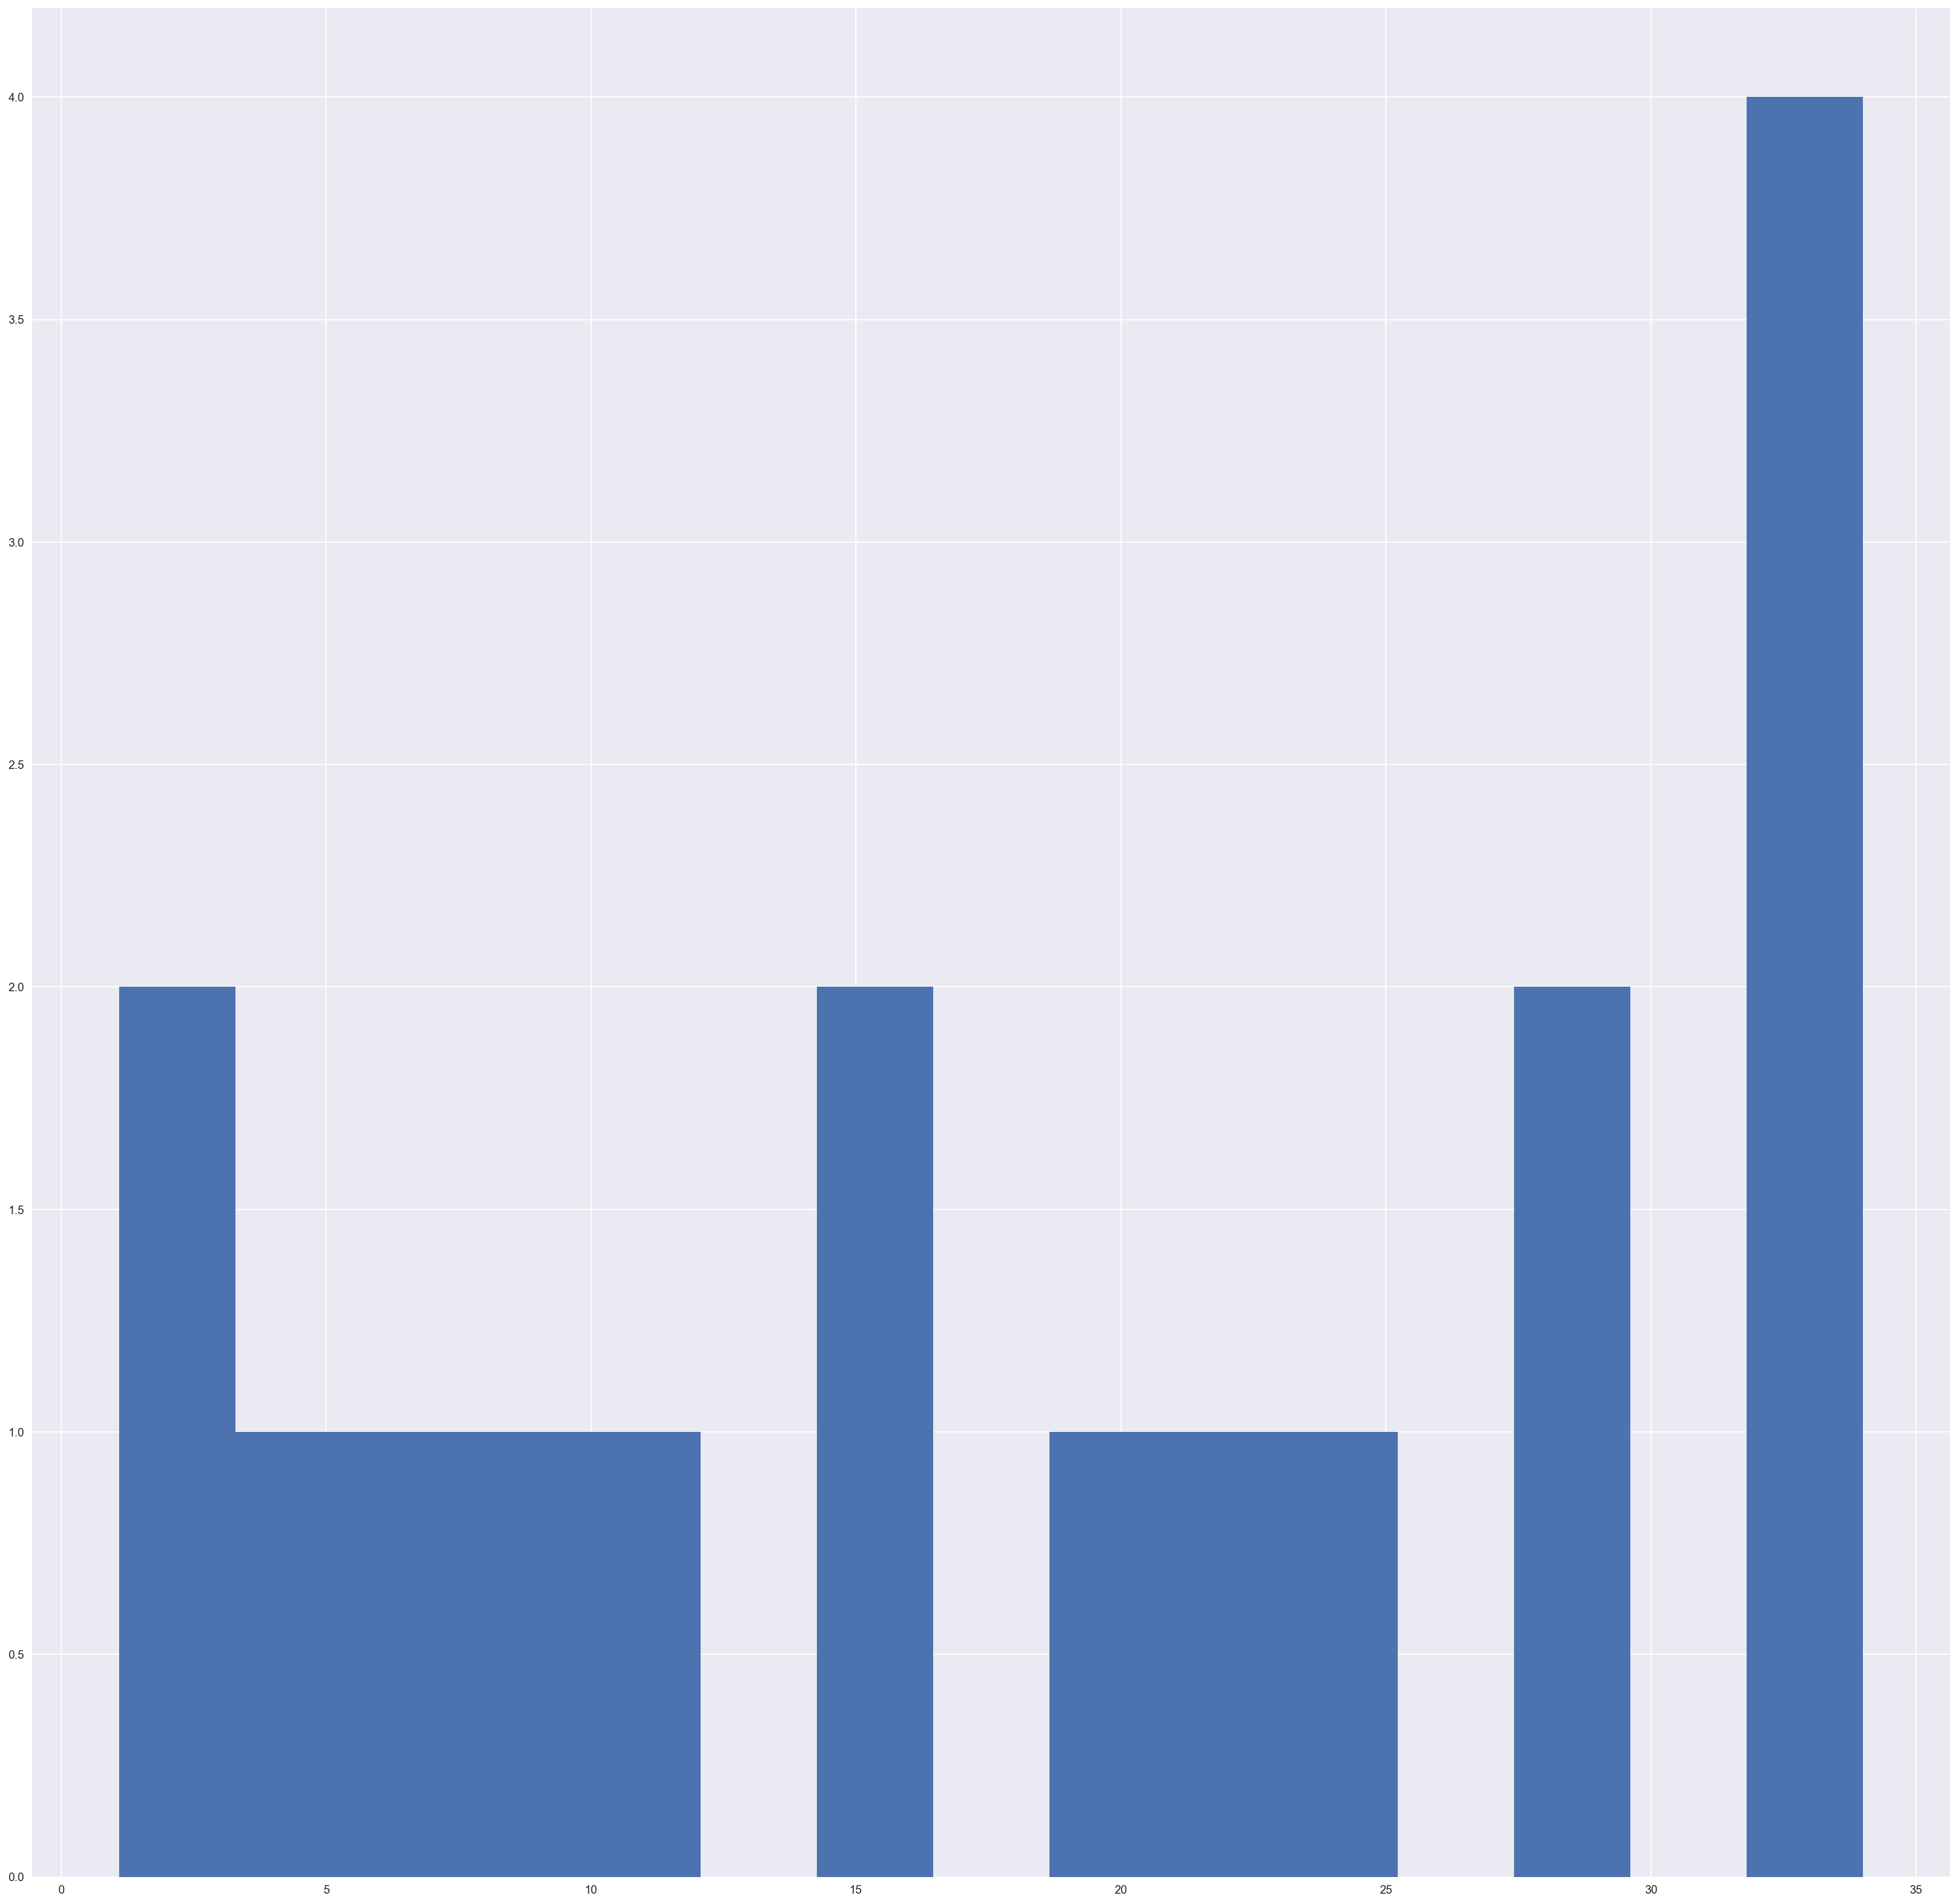

In [110]:
plt.hist(drugdf['marijuana-use'],bins=15)

In [111]:
marijuanapercentile = [scipy.stats.percentileofscore(drugdf['marijuana-use'],element) for element in drugdf['marijuana-use'] ]

(array([ 2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  2.]),
 array([   5.88235294,   12.15686275,   18.43137255,   24.70588235,
          30.98039216,   37.25490196,   43.52941176,   49.80392157,
          56.07843137,   62.35294118,   68.62745098,   74.90196078,
          81.17647059,   87.45098039,   93.7254902 ,  100.        ]),
 <a list of 15 Patch objects>)

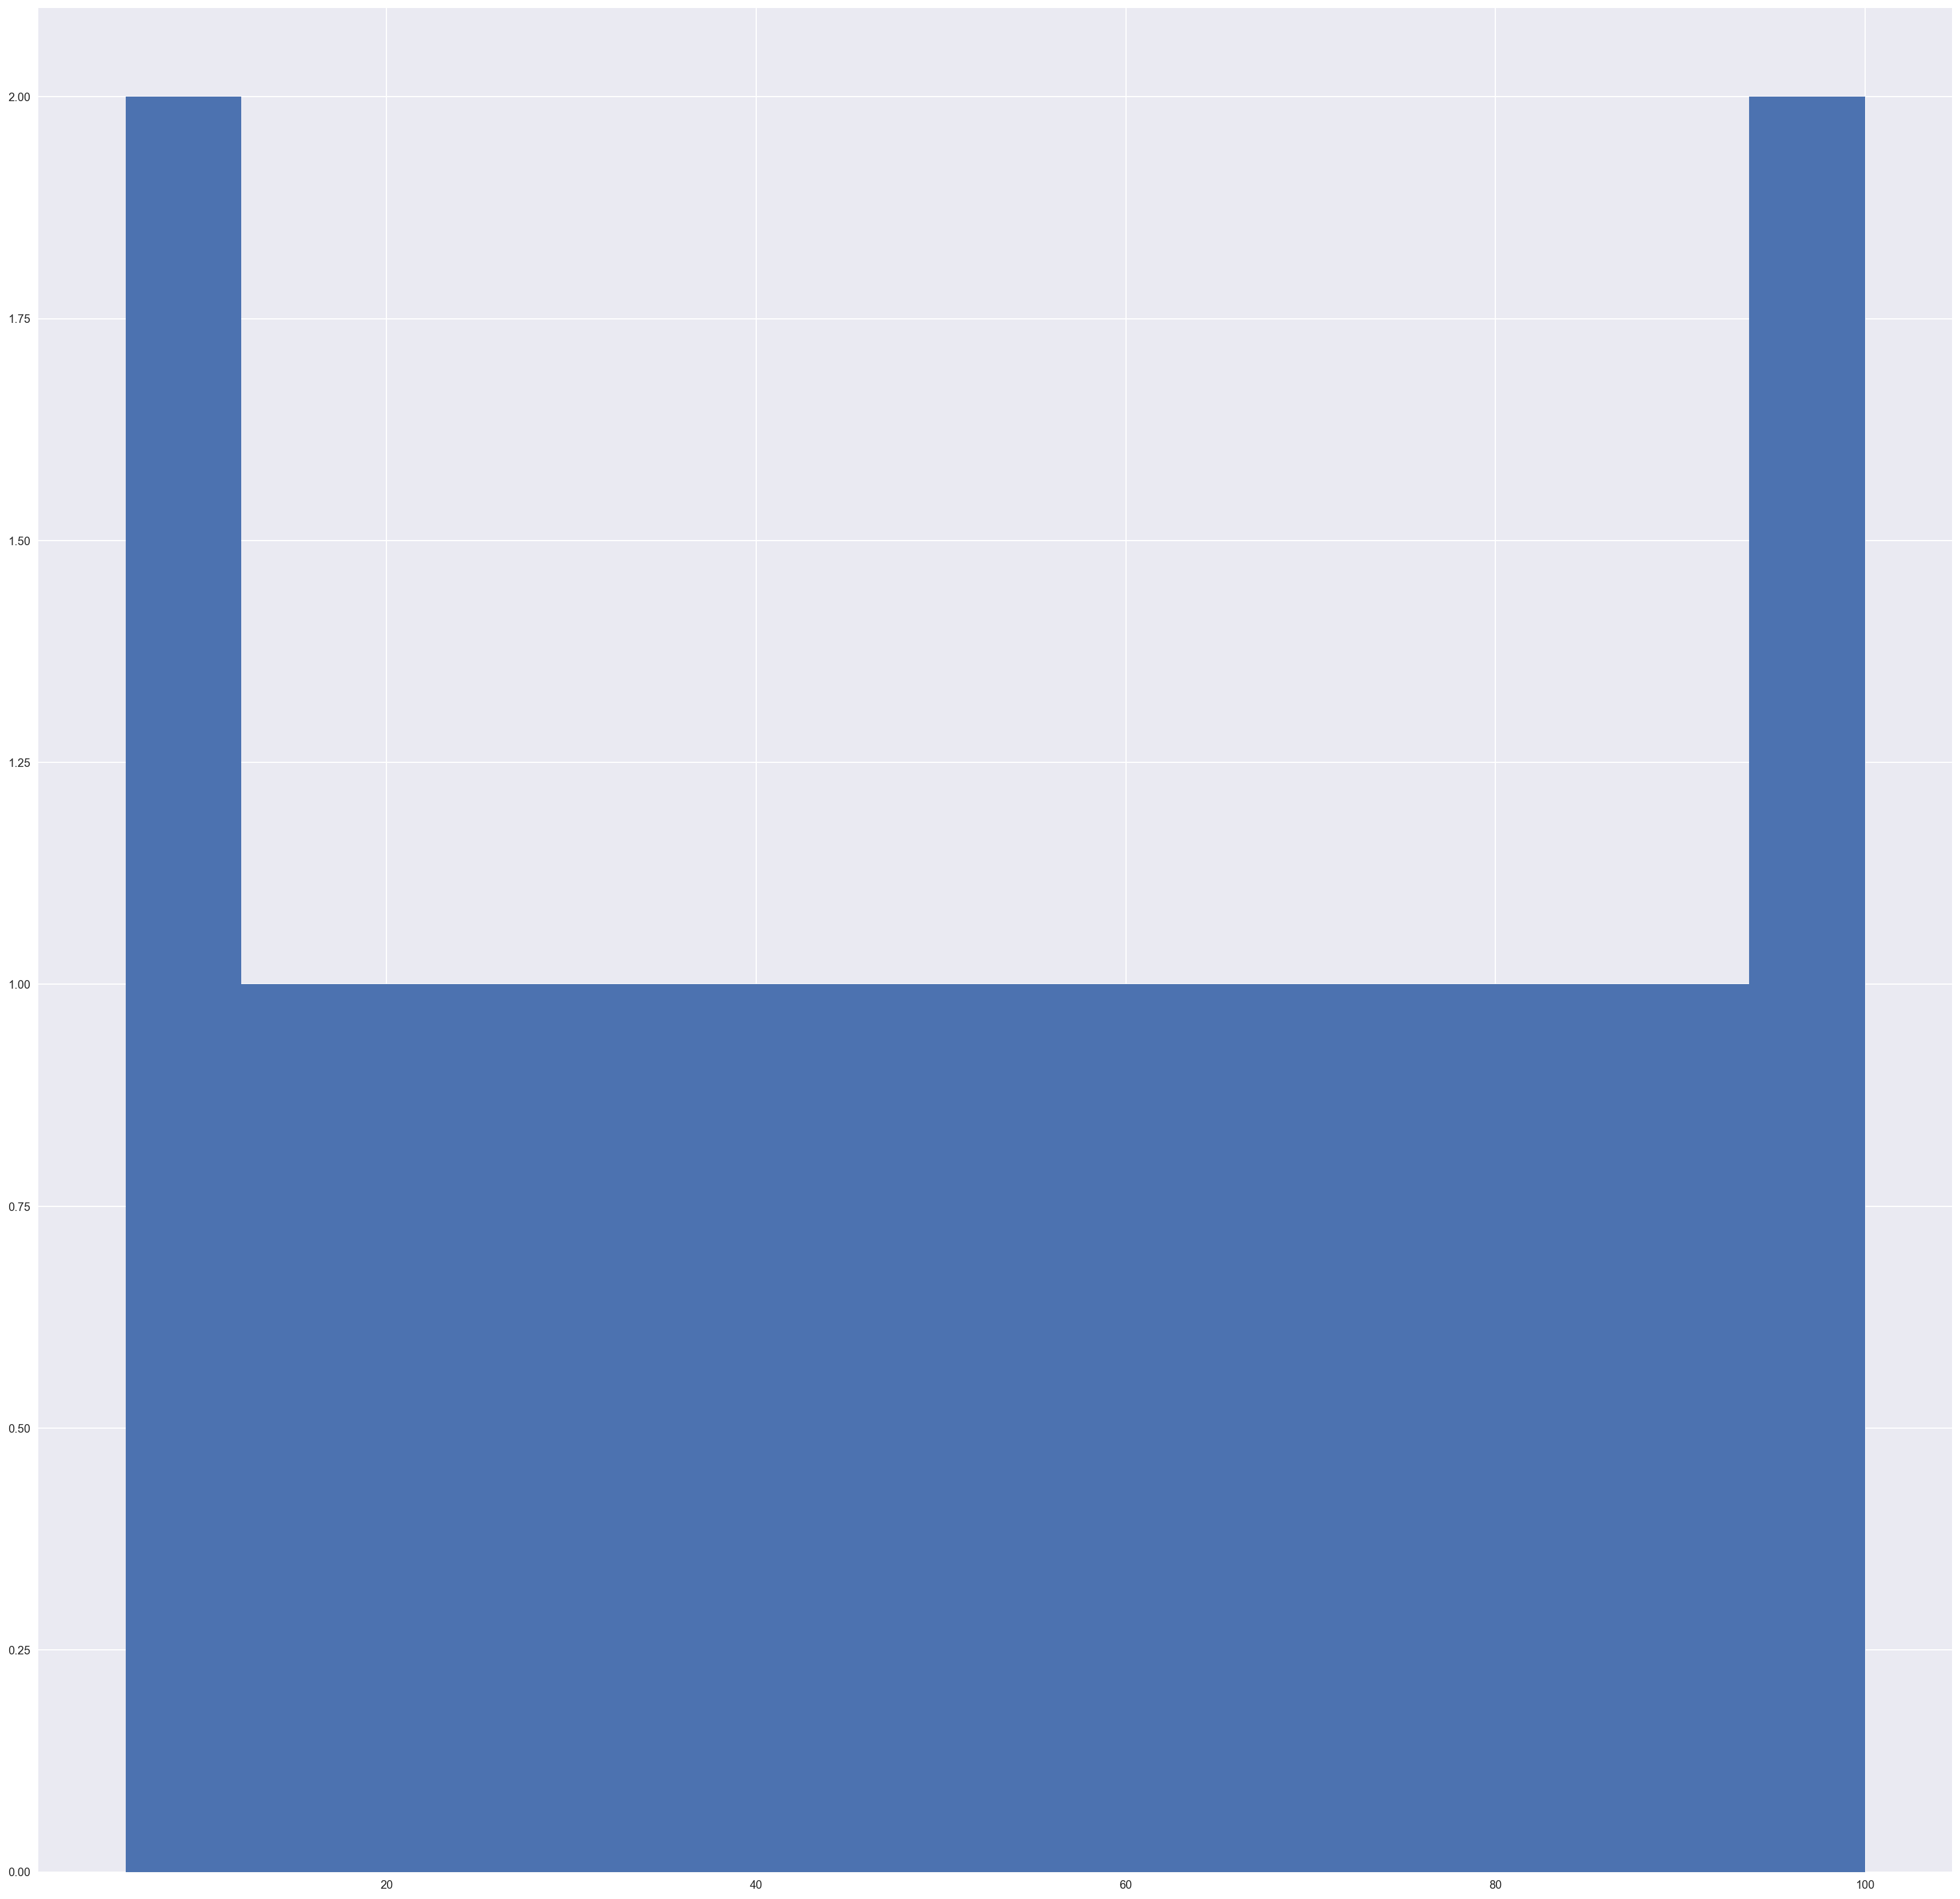

In [116]:
plt.hist(marijuanapercentile,bins=15)

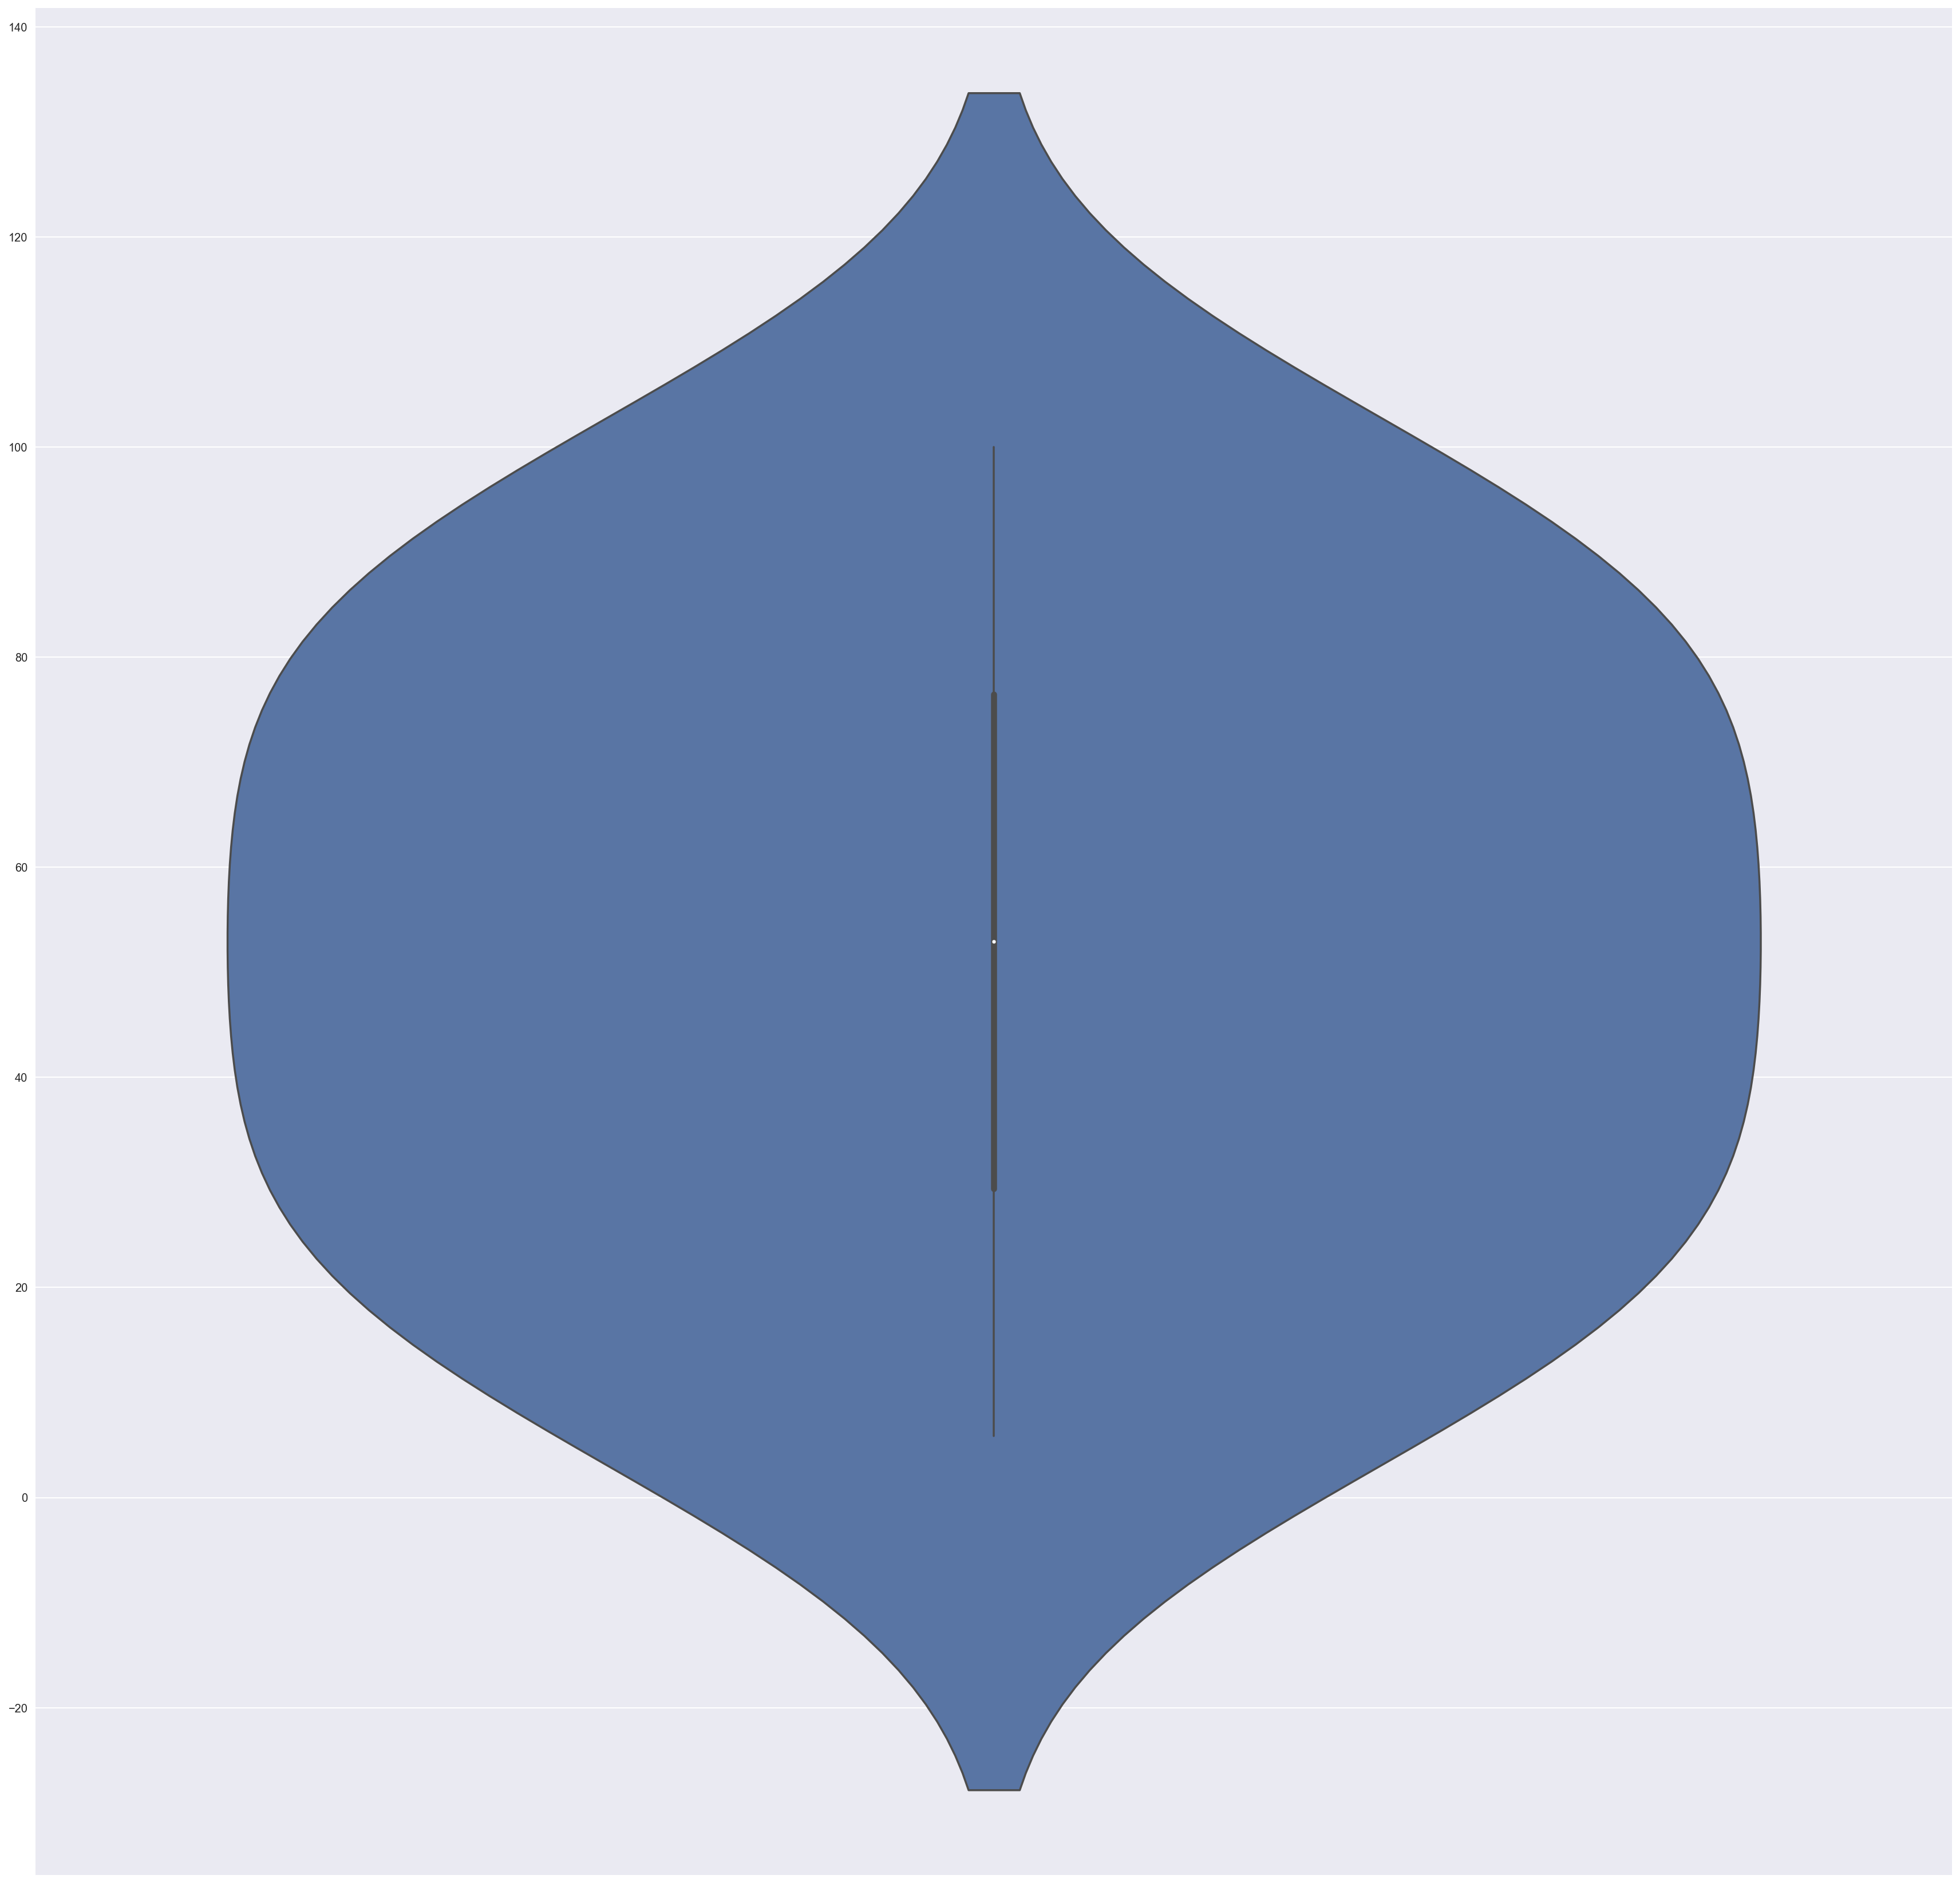

In [113]:
sns.violinplot(y=marijuanapercentile)

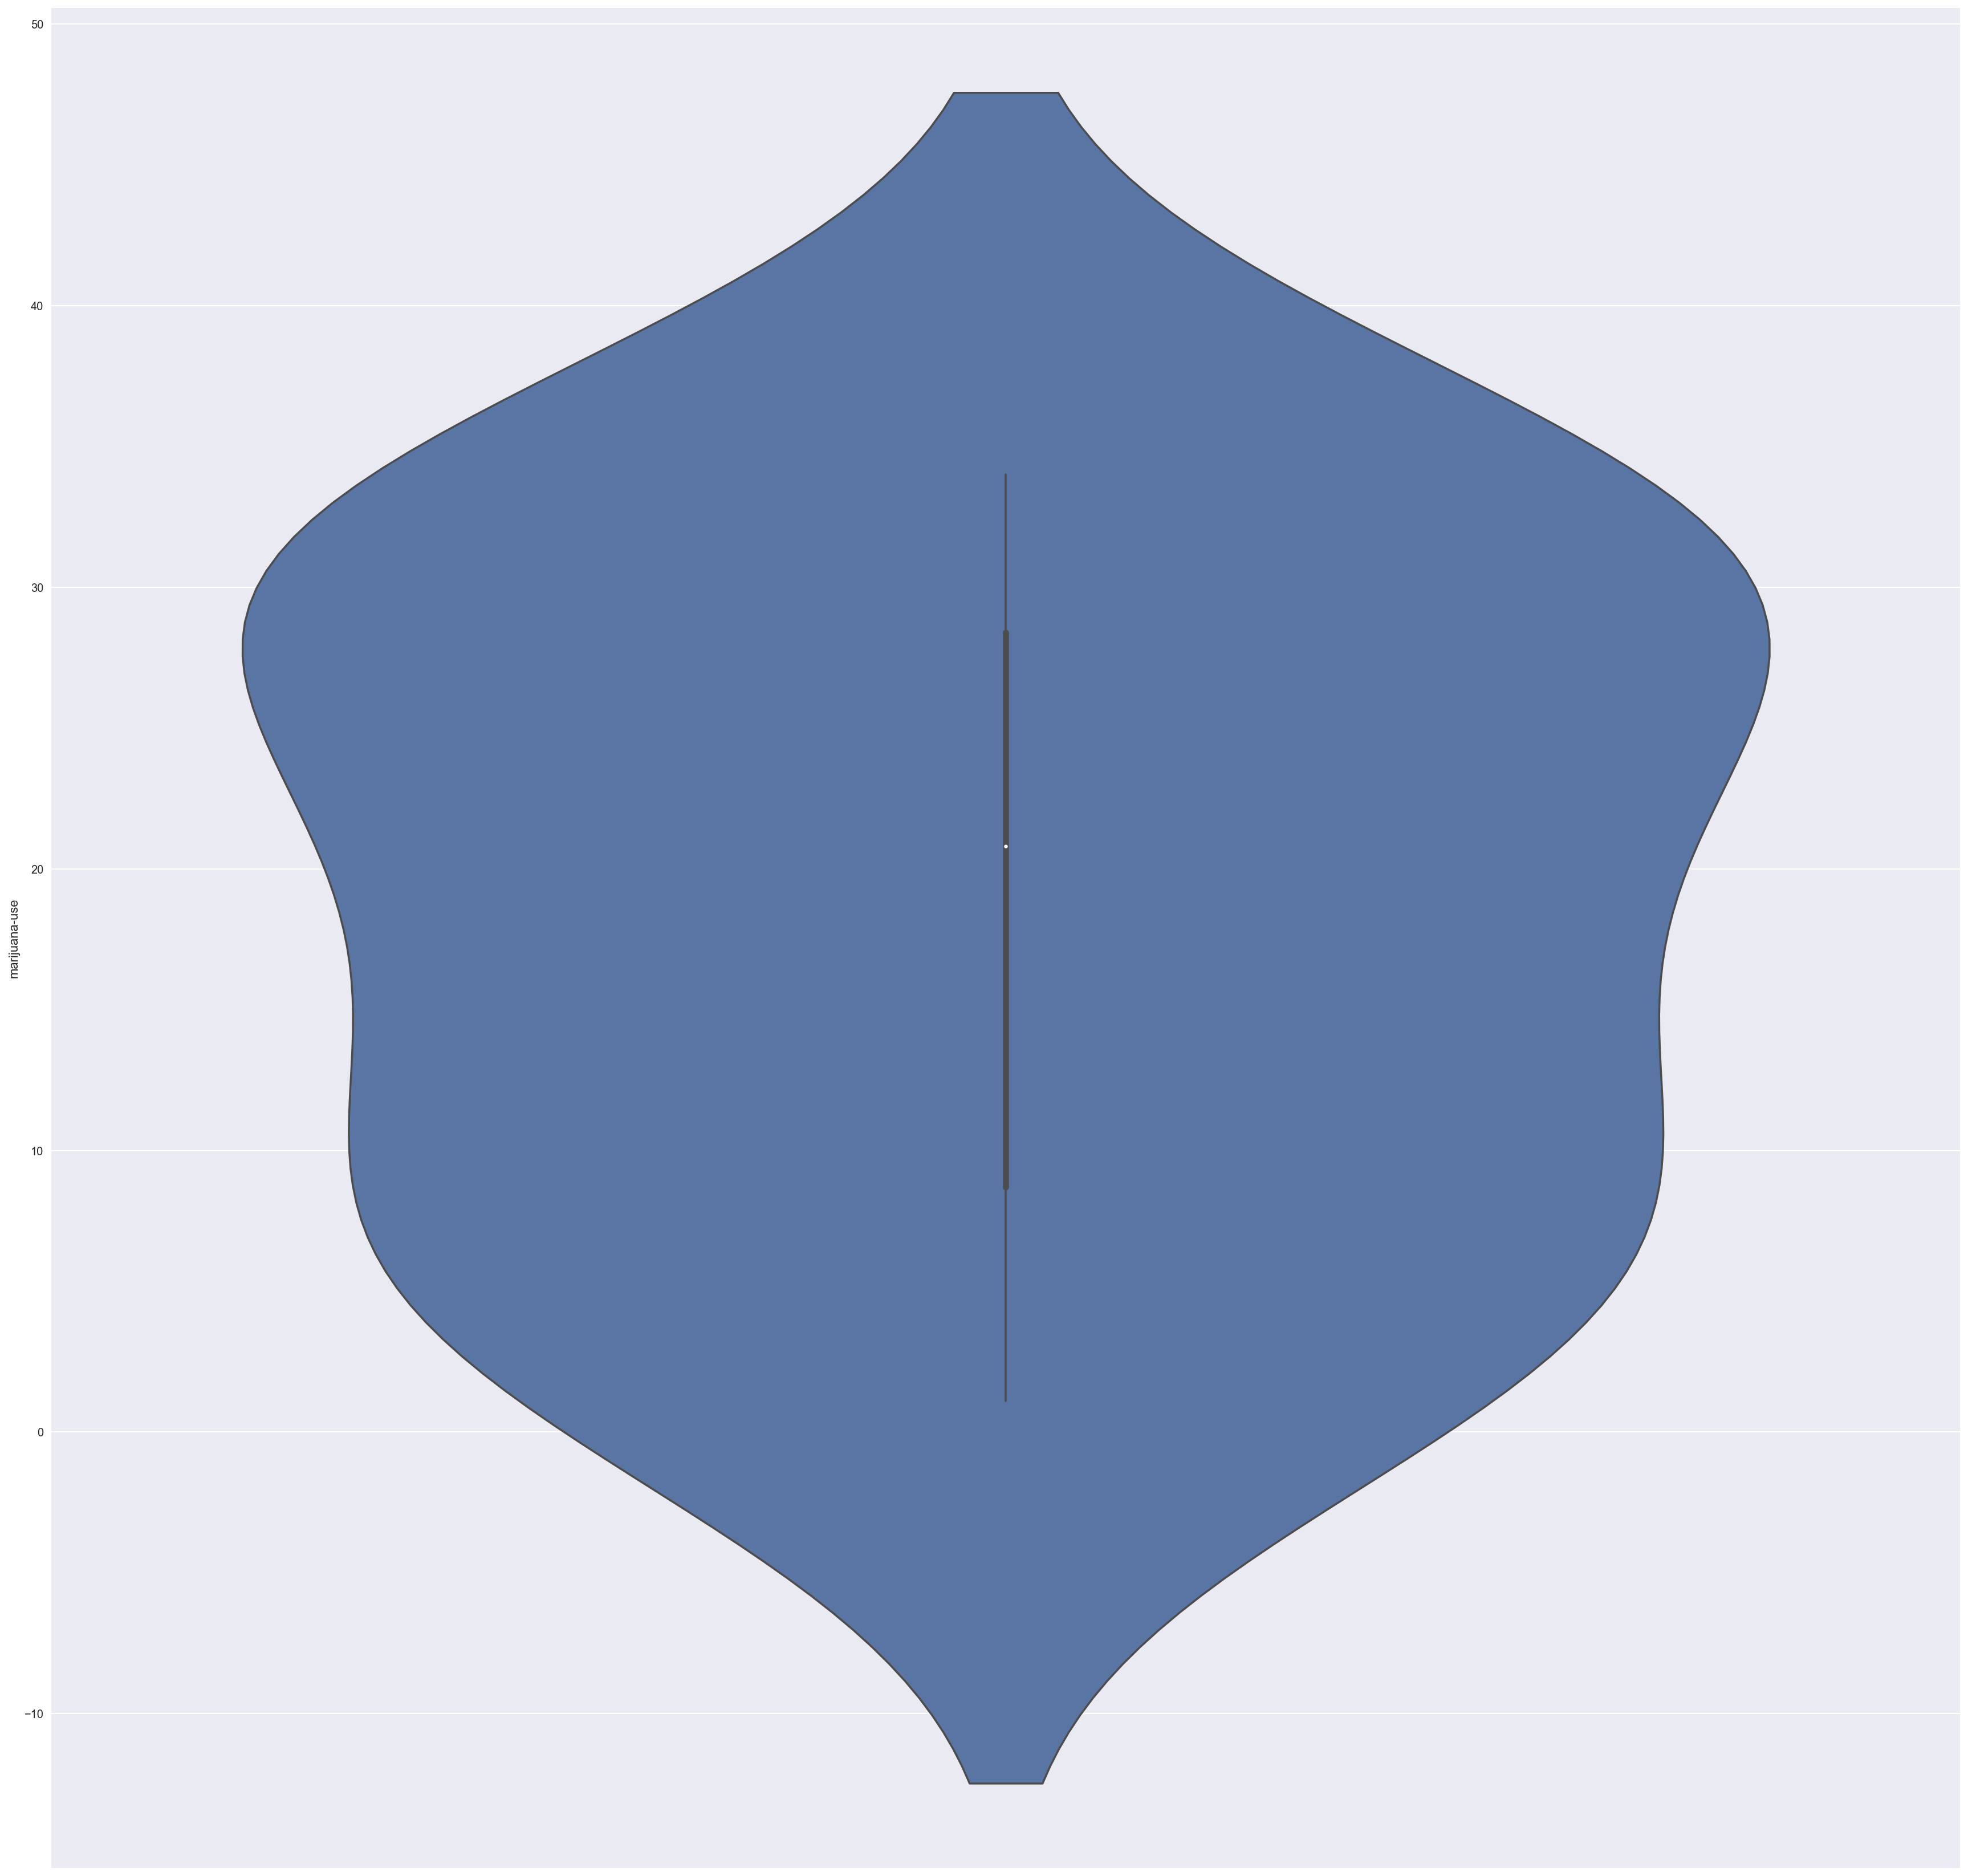

In [114]:
sns.violinplot(y=drugdf['marijuana-use'])

## Very smooth gradients, can see sudden peaks clearly, more pronounced